# Desiases Model 

### libraries

In [1]:
# Standard library importscode --uninstall-extension ms-toolsai.jupyter
import os
import sys

os.environ['OMP_NUM_THREADS'] = '8'
os.environ['MKL_NUM_THREADS'] = '8'
os.environ['OPENBLAS_NUM_THREADS'] = '8'

# Third-party scientific computing
import numpy as np
import pandas as pd
import openpyxl as xsl

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import missingno as msno

# Scikit-learn components
from sklearn import (
    decomposition,
    ensemble,
    feature_selection,
    impute,
    linear_model,
    manifold,
    metrics,
    model_selection,
    neighbors,
    pipeline,
    preprocessing,
)

# Scikit-learn specific imports
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import (
    GradientBoostingClassifier,
    RandomForestClassifier,
)
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import (
    KNNImputer,
    SimpleImputer,
)
from sklearn.linear_model import (
    ElasticNet,
    LinearRegression,
    LogisticRegression,
    Ridge,
)
from sklearn.manifold import TSNE
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    f1_score,
    make_scorer,
    mean_absolute_error,
    mean_squared_error,
    precision_score,
    recall_score,
    roc_auc_score,
    r2_score,
    confusion_matrix,
)
from sklearn.model_selection import (
    GridSearchCV,
    ShuffleSplit,
    StratifiedKFold,
    train_test_split,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    LabelEncoder,
    OneHotEncoder,
    StandardScaler,
)

import catboost
from catboost import CatBoostClassifier, Pool


# Other ML libraries
import lightgbm as lgb
import optuna
import shap

# from umap import UMAP

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter

# Synthetic data
from sklearn.datasets import make_classification


from tqdm import tqdm
import warnings

warnings.filterwarnings("ignore")

/nfs/home/emarenina/miniconda3/envs/ml_notebook/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load Data

In [2]:
data_test = pd.read_excel("test_data.xlsx")
data_train = pd.read_excel("training_data.xlsx")

In [3]:
data_train["disease"].unique()

array(['D68.8', 'D47.1', 'D47.2', 'D69.6', 'D69.5', 'C91.1', nan, 'C90.0',
       'D61.3', 'C92.4', 'D56.1', 'D46.4', 'D68.5', 'D68.9', 'C83.2',
       'C85.7', 'C91.4', 'C38.1', 'C84.0', 'C92.1', 'C88.0', 'C92.0',
       'D75.1', 'D51.0', 'C81.1', 'D69.3', 'D61.9', 'C84.6', 'D47.3',
       'D47.5', 'C82.0', 'D68.2', 'D46.9', 'D50.8', 'D68.4', 'C83.9',
       'C94.6', 'C83.3', 'D66', 'D47.4', 'C81.0', 'D50.0', 'D75.2',
       'D72.9', 'D45', 'C96.7', 'C93.0', 'D59.1', 'D75.9', 'C82.1',
       'C83.7', 'healthy', 'D64.9', 'D50.9', 'D46.6', 'C91.0', 'D68.0',
       'D69.1', 'D46.7', 'D73.9', 'C86.5', 'D36.0', 'D48.9', 'D72.8',
       'C84.5', 'D67', 'D25.0', 'C83.8', 'C84.2', 'C94.7', 'C90.2',
       'C82.3', 'C96.2', 'D51.9', 'C94.1', 'C90.3', 'C83.1', 'D17.9',
       'D75.0', 'C41.4', 'C92.5', 'C84.8', 'C95.9', 'C85.9', 'D46.1',
       'C92.7', 'D61.8', 'D46.2', 'D61.0', 'D72.1', 'C83.0', 'C34.1',
       'C85.1', 'D25.1', 'C91.6', 'D51.8', 'D77', 'D58.0', 'D46.5',
       'D60.0', 'C86.

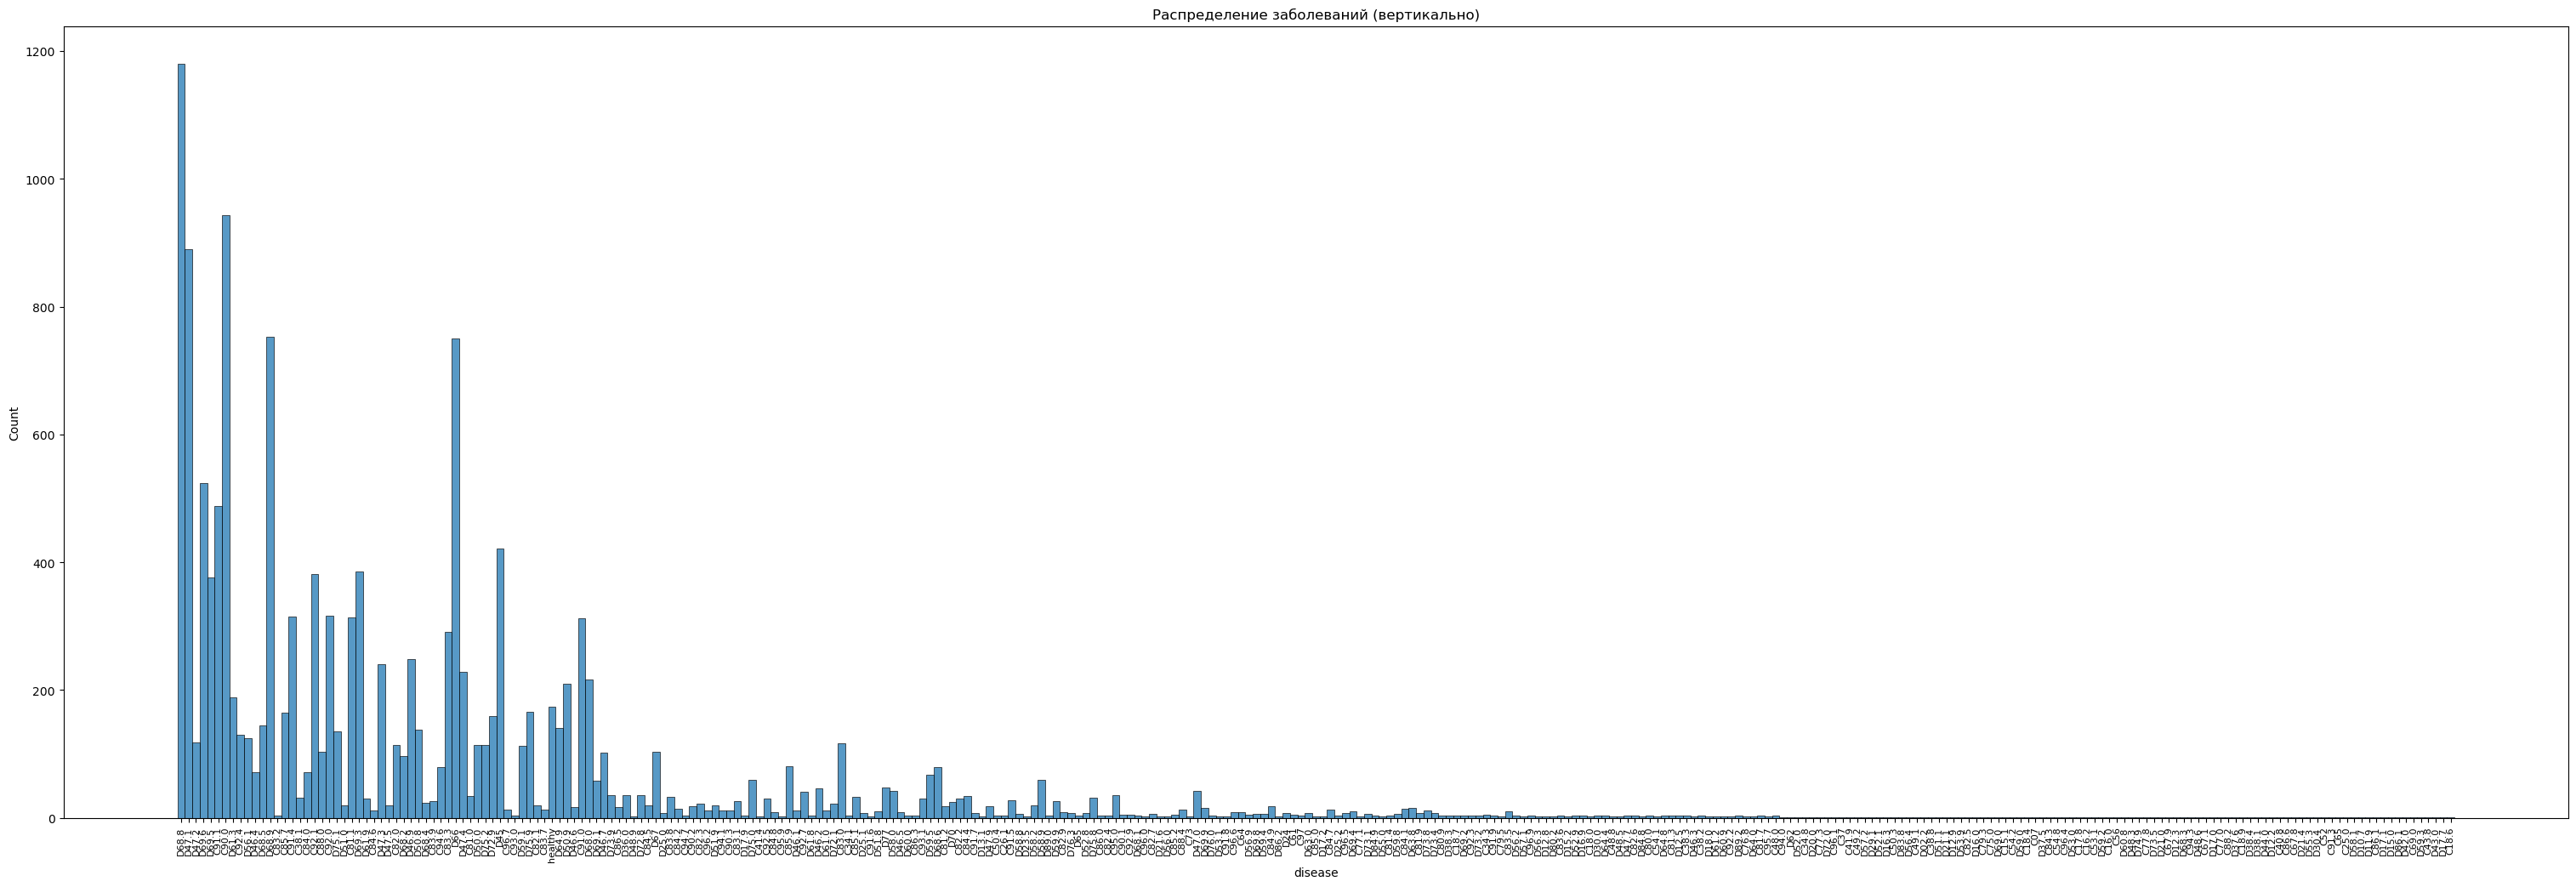

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Увеличиваем размер графика
plt.figure(figsize=(60, 20))

# Вариант 1: Вертикальная гистограмма с поворотом подписей
plt.subplot(2, 2, 1)
sns.histplot(data=data_train, x="disease")
plt.xticks(rotation=90, fontsize=8)
plt.title("Распределение заболеваний (вертикально)")
plt.tight_layout()

plt.show()

In [5]:
data_train["disease"].unique()

array(['D68.8', 'D47.1', 'D47.2', 'D69.6', 'D69.5', 'C91.1', nan, 'C90.0',
       'D61.3', 'C92.4', 'D56.1', 'D46.4', 'D68.5', 'D68.9', 'C83.2',
       'C85.7', 'C91.4', 'C38.1', 'C84.0', 'C92.1', 'C88.0', 'C92.0',
       'D75.1', 'D51.0', 'C81.1', 'D69.3', 'D61.9', 'C84.6', 'D47.3',
       'D47.5', 'C82.0', 'D68.2', 'D46.9', 'D50.8', 'D68.4', 'C83.9',
       'C94.6', 'C83.3', 'D66', 'D47.4', 'C81.0', 'D50.0', 'D75.2',
       'D72.9', 'D45', 'C96.7', 'C93.0', 'D59.1', 'D75.9', 'C82.1',
       'C83.7', 'healthy', 'D64.9', 'D50.9', 'D46.6', 'C91.0', 'D68.0',
       'D69.1', 'D46.7', 'D73.9', 'C86.5', 'D36.0', 'D48.9', 'D72.8',
       'C84.5', 'D67', 'D25.0', 'C83.8', 'C84.2', 'C94.7', 'C90.2',
       'C82.3', 'C96.2', 'D51.9', 'C94.1', 'C90.3', 'C83.1', 'D17.9',
       'D75.0', 'C41.4', 'C92.5', 'C84.8', 'C95.9', 'C85.9', 'D46.1',
       'C92.7', 'D61.8', 'D46.2', 'D61.0', 'D72.1', 'C83.0', 'C34.1',
       'C85.1', 'D25.1', 'C91.6', 'D51.8', 'D77', 'D58.0', 'D46.5',
       'D60.0', 'C86.

In [6]:
import pickle
with open("folds_indices.pkl", "rb") as f:
    folds_indices = pickle.load(f)

In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16751 entries, 0 to 16750
Data columns (total 62 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Unnamed: 0                                     16751 non-null  int64  
 1   client_id                                      16751 non-null  int64  
 2   gender                                         16751 non-null  object 
 3   age                                            16751 non-null  int64  
 4   Атипичные_мононуклеары                         10128 non-null  float64
 5   Базофилы_кл                                    14099 non-null  float64
 6   Гематокрит                                     16415 non-null  float64
 7   Гемоглобин                                     16412 non-null  float64
 8   Контрольная_сумма                              10203 non-null  float64
 9   Лейкоциты                                      164

## Preparing data

- We leave the most frequently encountered groups
- There are С D I M K 
- Drop M E R Z and other small group
- Our set ["D", "C", "I", "K", "N", "H"]


# Summary of ICD-10 Codes from Hematological Perspective

## D - Diseases of the Blood and Blood-forming Organs
- **General chapter** for hematological conditions
- Includes anemias, coagulation disorders, and other blood diseases
- **Range**: D50-D89

## C - Malignant Neoplasms
- Hematological malignancies:
  - **Leukemias**
  - **Lymphomas** 
  - **Myeloma**
- **Specific codes**: C81-C96 (malignant neoplasms of lymphoid, hematopoietic tissues)

## I - Diseases of the Circulatory System
- Hematologically relevant conditions:
  - **Embolism**
  - **Arterial thrombosis**
- Relates to coagulation disorders and their complications

## K - Diseases of the Digestive System
- Hematological connections:
  - **GI bleeding** leading to anemia
  - **Specific code**: K92.2 (gastrointestinal hemorrhage)

## N - Diseases of the Genitourinary System  
- Hematological associations:
  - **Anemia in chronic kidney disease**
  - **Specific code**: N18 (chronic kidney disease)

## H - MayBe Health

## Как фильтруем?

- посмотрим на распределение диагнозов по семействам 

In [8]:
data_train.shape

(16751, 62)

In [9]:
import numpy as np
from collections import Counter

# to find classes that have < 5 samples in *any* training split.
print("\nStep 1: Identifying 'small' classes (train samples < 100 in any fold)...")
classes_to_remove = set()

for fold_name, (train_idx, val_idx) in folds_indices.items():
    y_train_labels = data_train.iloc[train_idx]['disease']
    train_counts = y_train_labels.value_counts()
    
    # Find classes with < 5 samples *in this fold's training set*
    small_classes_in_fold = train_counts[train_counts < 100].index
    
    if small_classes_in_fold.any():
        print(f"  > Fold '{fold_name}' has small classes: {list(small_classes_in_fold)}")
        classes_to_remove.update(small_classes_in_fold)

print(f"✔️ Classes to remove globally: {classes_to_remove}")

print("\nStep 2: Creating the final, clean dataframe...")

# Get indices of all rows that are NaN
nan_indices = data_train[data_train['disease'].isna()].index

# Get indices of all rows that belong to a "small class"
small_class_indices = data_train[data_train['disease'].isin(classes_to_remove)].index

# Combine them into a single list of all indices to drop
all_indices_to_remove = nan_indices.union(small_class_indices)
print(f"  > Removing {len(nan_indices)} NaN rows.")
print(f"  > Removing {len(small_class_indices)} rows from small classes.")

# Create the final, clean dataframe by dropping all "bad" rows
data_final = data_train.drop(all_indices_to_remove)
print(f"  > Original data shape: {data_train.shape}")
print(f"  > Final clean data shape: {data_final.shape}")

print("\nStep 3: Building the index map...")

# We need to map the *original* indices to the *new* 0-N indices
# in 'data_final'.
# 1. Reset the index of data_final, but *keep* the original index as a column
data_final = data_final.reset_index(names='original_index')

# 2. Create the mapping:
#    key = original_index, value = new_index (0, 1, 2...)
original_to_new_index_map = pd.Series(
    data_final.index, 
    index=data_final['original_index']
)
print(f"✔️ Map created. Example: Original index {original_to_new_index_map.index[0]} is now new index {original_to_new_index_map.iloc[0]}")

print("\nStep 4: Generating new, clean fold indices...")
new_folds_indices = {}

for fold_name, (train_idx_orig, val_idx_orig) in folds_indices.items():

    new_train_idx = original_to_new_index_map.reindex(train_idx_orig)
    new_val_idx = original_to_new_index_map.reindex(val_idx_orig)
    
    clean_train_idx = new_train_idx.dropna().astype(int).values
    clean_val_idx = new_val_idx.dropna().astype(int).values
    
    new_folds_indices[fold_name] = [clean_train_idx, clean_val_idx]
    
    print(f"  > Fold '{fold_name}':")
    print(f"    - Original train: {len(train_idx_orig)} -> Cleaned train: {len(clean_train_idx)}")
    print(f"    - Original val:   {len(val_idx_orig)} -> Cleaned val:   {len(clean_val_idx)}")

print("\n✔️ New fold indices dictionary is ready.")


print("\nStep 5: Saving new artifacts...")

X_disease = data_final.drop(columns=['family', 'client_id', 'diagnosis','letter','chapter','Unnamed: 0','disease','original_index'])
y_disease = data_final['disease']

data_final.to_csv("./data_final_disease_clean.csv", index=False)
print("  > Saved './data_final_disease_clean.csv'")

with open("./folds_indices_disease_clean.pkl", "wb") as f:
    pickle.dump(new_folds_indices, f)
print("  > Saved './folds_indices_disease_clean.pkl'")

print("\n--- Preprocessing Complete! ---")
print("You can now use 'data_final_disease_clean.csv' and 'folds_indices_disease_clean.pkl' in your training script.")

print("\nStep 5: Processing TEST data...")

print("  > Cleaning test data...")

test_nan_indices = data_test[data_test['disease'].isna()].index
test_small_class_indices = data_test[data_test['disease'].isin(classes_to_remove)].index

test_indices_to_remove = test_nan_indices.union(test_small_class_indices)

data_test_final = data_test.drop(test_indices_to_remove)
print(f"  > Original test data shape: {data_test.shape}")
print(f"  > Final clean test data shape: {data_test_final.shape}")

target_column = "disease"
y_test_disease = data_test_final[target_column]
X_test_disease = data_test_final.drop(
    columns=[target_column, "diagnosis", "client_id", "disease", "chapter", "letter", "Unnamed: 0"]
)

X_test_df_disease = pd.DataFrame(X_test_disease)
y_test_df_disease = pd.DataFrame(y_test_disease)

print(f"  > X_test_df_disease shape: {X_test_df_disease.shape}")
print(f"  > y_test_df_disease shape: {y_test_df_disease.shape}")
print(f"  > Test classes distribution:\n{y_test_df_disease['disease'].value_counts()}")

print("\nStep 6: Saving new artifacts...")

data_test_final.to_csv("./data_test_disease_final_clean.csv", index=False)  

print("  > Saved './data_test_disease_final_clean.csv'")


print("\n--- Preprocessing Complete! ---")
print("You can now use:")
print("  - 'data_final_clean.csv' for training")
print("  - 'data_test_final_clean.csv' for testing") 
print("  - 'folds_indices_clean.pkl' for cross-validation")


Step 1: Identifying 'small' classes (train samples < 100 in any fold)...
  > Fold 'fold_0' has small classes: ['C83.0', 'D47.2', 'D59.1', 'C82.0', 'D75.2', 'D50.0', 'D67', 'C88.0', 'D46.7', 'D68.2', 'D68.6', 'C85.9', 'C94.6', 'D46.4', 'C84.0', 'D59.5', 'D58.9', 'D75.0', 'D69.1', 'D77', 'D46.2', 'D58.0', 'C92.7', 'D47.0', 'C95.0', 'D73.9', 'D72.8', 'D36.0', 'C85.1', 'C84.4', 'C83.8', 'C81.0', 'D75.8', 'C38.1', 'D61.9', 'C82.2', 'C93.1', 'C92.5', 'C91.5', 'D59.9', 'C83.9', 'C83.1', 'D70', 'D68.4', 'C82.3', 'D72.1', 'C82.1', 'D58.2', 'D47.5', 'D51.9', 'D51.0', 'C84.5', 'C84.9', 'C86.5', 'D47.9', 'C81.2', 'D46.6', 'C90.2', 'D63.8', 'D69.9', 'C84.1', 'C84.2', 'C88.4', 'C96.7', 'C96.2', 'D61.0', 'C83.7', 'C84.6', 'C84.7', 'C94.1', 'C90.3', 'D46.1', 'D73.8', 'D51.8', 'D46.5', 'D69.4', 'C83.5', 'D73.4', 'C96.6', 'C82.9', 'C64', 'C96.5', 'D76.3', 'C84.8', 'C81.9', 'D24', 'D52.8', 'D63.0', 'D25.0', 'D25.1', 'C91.7', 'D59.8', 'D73.1', 'D69.8', 'D59.4', 'D58.8', 'C90.1', 'C61', 'D56.9', 'C82.7', 

=== АНАЛИЗ РАСПРЕДЕЛЕНИЯ БОЛЕЗНЕЙ ПО СЕМЕЙСТВАМ ===
Всего болезней в данных: 0        D68.8
1        D47.1
2        D47.2
3        D69.6
4        D69.5
         ...  
16746      NaN
16747      NaN
16748    D17.7
16749    C18.6
16750      NaN
Name: disease, Length: 16751, dtype: object
Всего семейств в данных: 0        D68
1        D47
2        D47
3        D69
4        D69
        ... 
16746    NaN
16747    NaN
16748    D17
16749    C18
16750    NaN
Name: family, Length: 16751, dtype: object

Болезней, связанных с семействами: 308

=== РАСПРЕДЕЛЕНИЕ ПО СЕМЕЙСТВАМ ===
Количество  болезней по семействам:
family
D68    2499
D47    1559
D69    1379
C91    1159
C90     977
C92     908
D66     750
C83     522
D46     507
D75     505
D50     462
D45     422
C81     383
C85     285
D61     236
Name: disease, dtype: int64


Text(0, 0.5, 'Количество болезней')

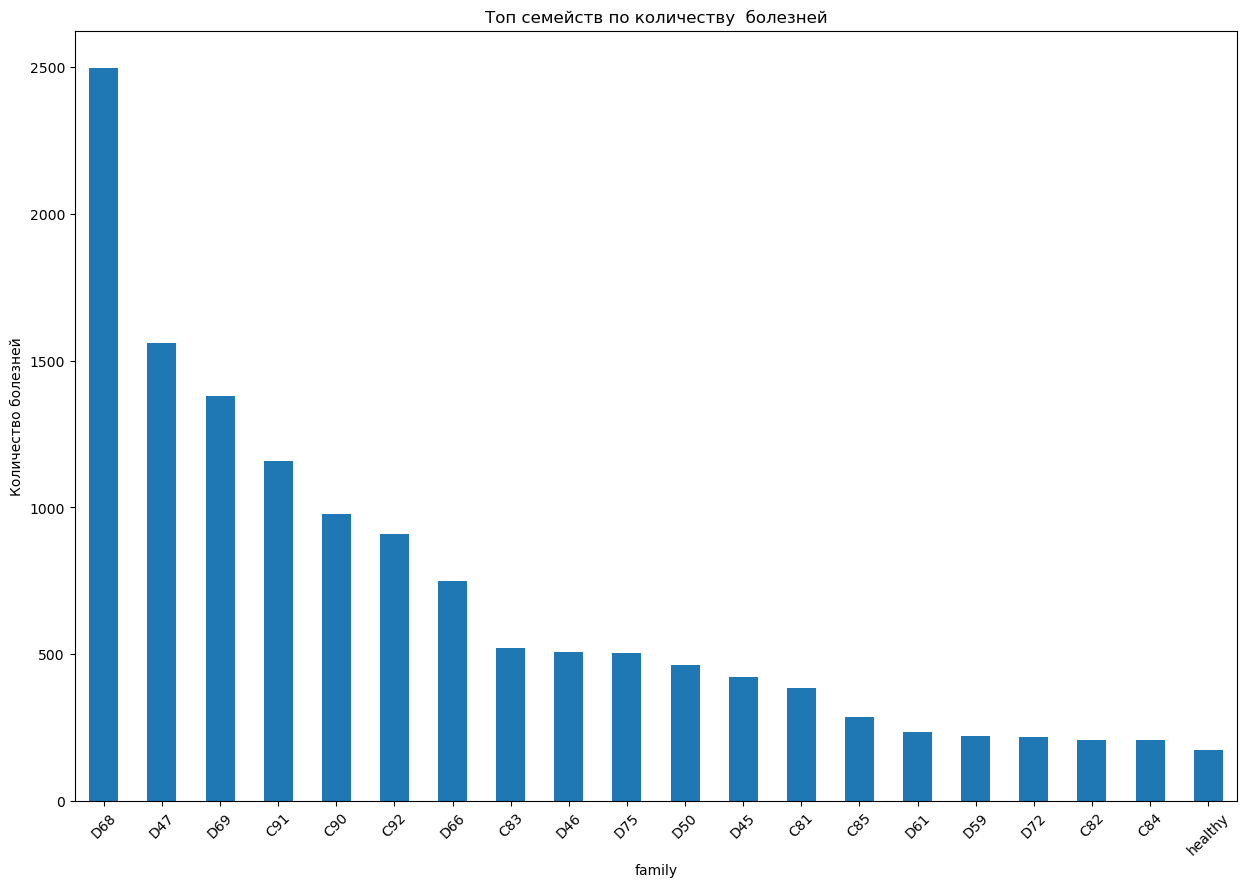

In [10]:
# Анализ распределения болезней по семействам
print("=== АНАЛИЗ РАСПРЕДЕЛЕНИЯ БОЛЕЗНЕЙ ПО СЕМЕЙСТВАМ ===")

print(f"Всего болезней в данных: {data_train['disease']}")
print(f"Всего семейств в данных: {data_train['family']}")

diseases_with_family = data_train[data_train['family'].notna()]['disease'].unique()
print(f"\nБолезней, связанных с семействами: {len(diseases_with_family)}")


print(f"\n=== РАСПРЕДЕЛЕНИЕ ПО СЕМЕЙСТВАМ ===")
family_disease_counts = data_train.groupby('family')['disease'].count().sort_values(ascending=False)

print("Количество  болезней по семействам:")
print(family_disease_counts.head(15))  


plt.figure(figsize=(15, 10))

family_disease_counts.head(20).plot(kind='bar')
plt.title('Топ семейств по количеству  болезней')
plt.xticks(rotation=45)
plt.ylabel('Количество болезней')




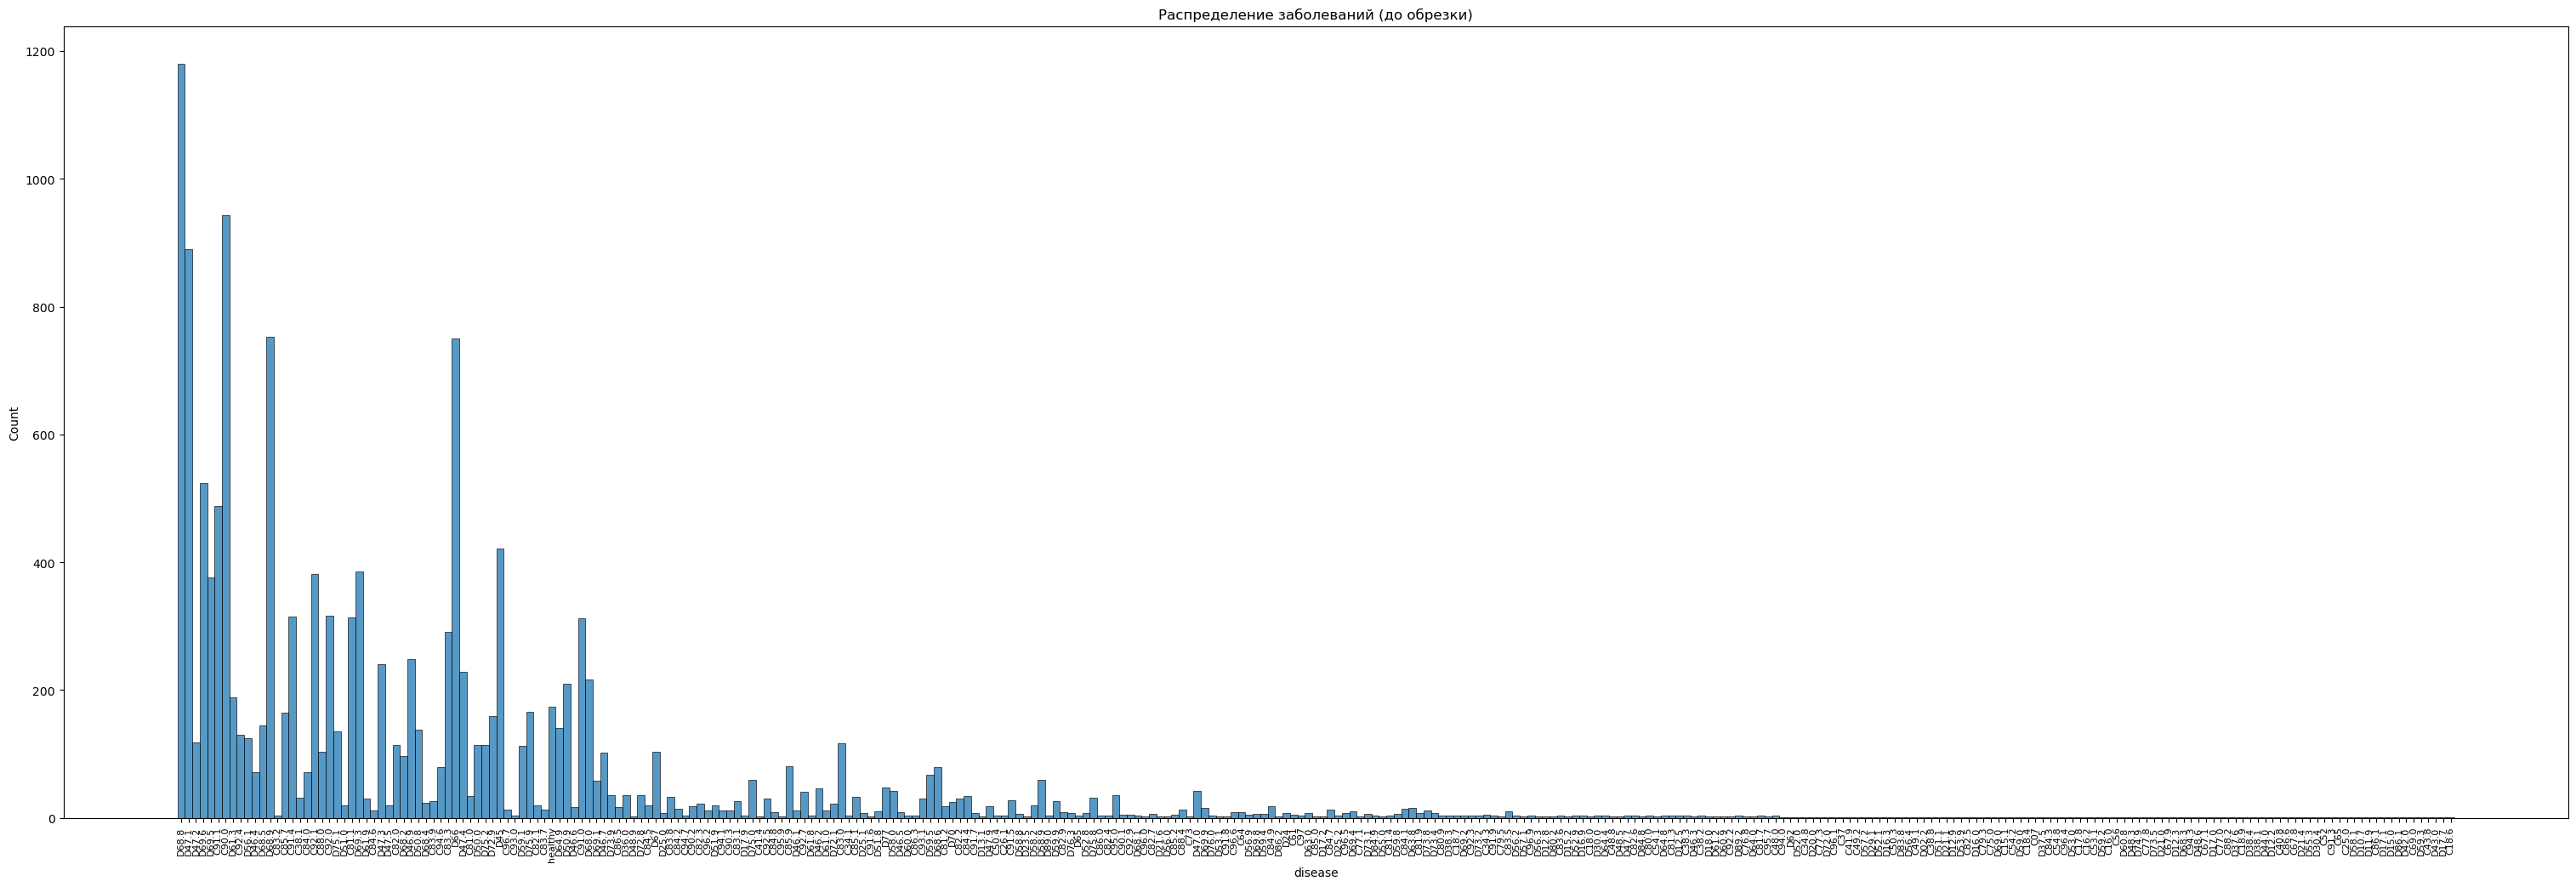

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


plt.figure(figsize=(60, 20))

plt.subplot(2, 2, 1)
sns.histplot(data=data_train, x="disease")
plt.xticks(rotation=90, fontsize=8)
plt.title("Распределение заболеваний (до обрезки)")
plt.tight_layout()

plt.show()

## После обрезки 

=== АНАЛИЗ РАСПРЕДЕЛЕНИЯ БОЛЕЗНЕЙ ПО СЕМЕЙСТВАМ после филтрования===
Всего болезней в данных: 0        D68.8
1        D47.1
2        D69.6
3        D69.5
4        C91.1
         ...  
11447    D68.8
11448      D66
11449    D68.9
11450    D46.9
11451    C91.1
Name: disease, Length: 11452, dtype: object
Всего семейств в данных: 0        D68
1        D47
2        D69
3        D69
4        C91
        ... 
11447    D68
11448    D66
11449    D68
11450    D46
11451    C91
Name: family, Length: 11452, dtype: object

Болезней, связанных с семействами: 32

=== РАСПРЕДЕЛЕНИЕ ПО СЕМЕЙСТВАМ после филтрования===
Количество уникальных болезней по семействам после филтрования:
family
D68        2295
D47        1359
D69        1286
C91        1115
C90         943
C92         827
D66         750
D45         422
D50         348
C81         314
D75         301
C83         291
D46         249
D61         189
healthy     174
Name: disease, dtype: int64


Text(0, 0.5, 'Количество после филтрования')

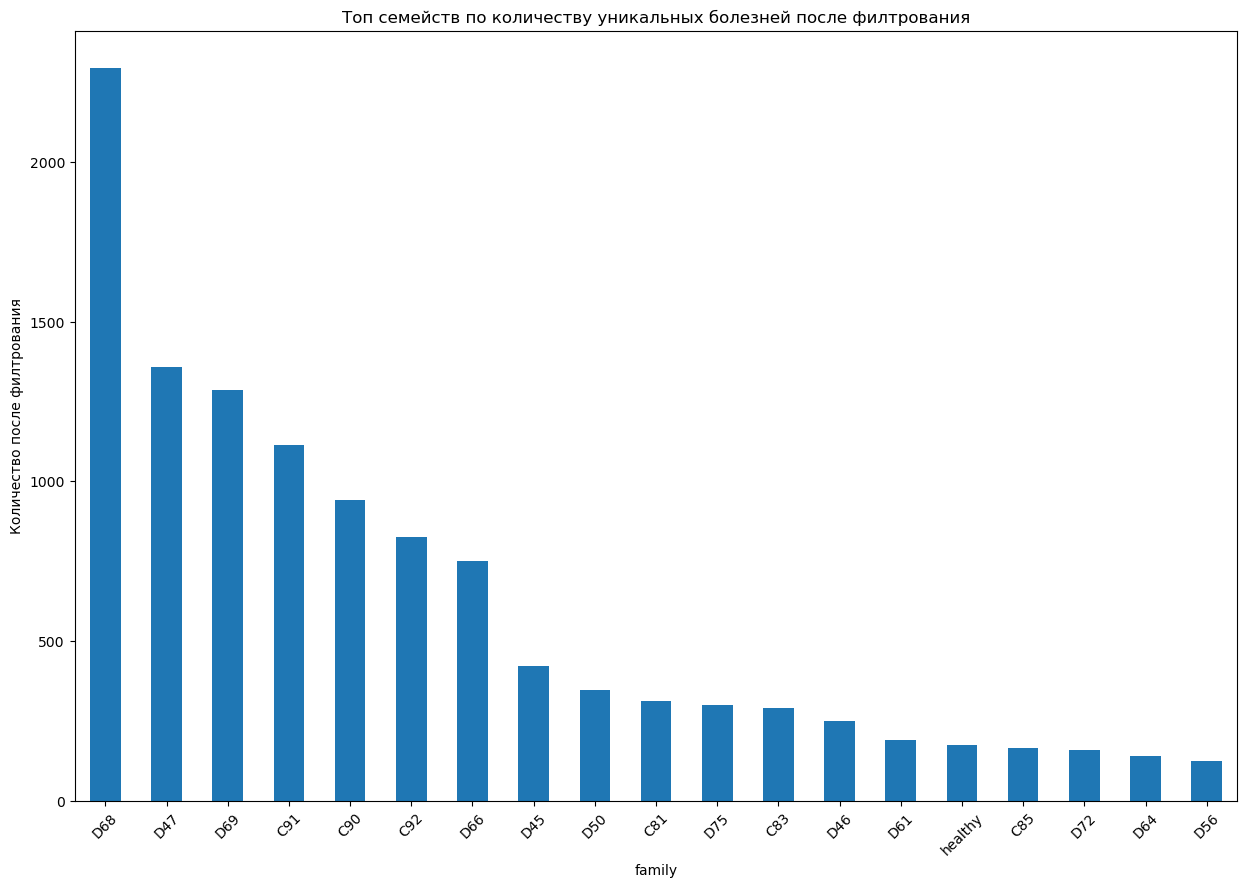

In [12]:
print("=== АНАЛИЗ РАСПРЕДЕЛЕНИЯ БОЛЕЗНЕЙ ПО СЕМЕЙСТВАМ после филтрования===")

print(f"Всего болезней в данных: {data_final['disease']}")
print(f"Всего семейств в данных: {data_final['family']}")

diseases_with_family = data_final[data_final['family'].notna()]['disease'].unique()
print(f"\nБолезней, связанных с семействами: {len(diseases_with_family)}")


print(f"\n=== РАСПРЕДЕЛЕНИЕ ПО СЕМЕЙСТВАМ после филтрования===")
family_disease_counts_filter = data_final.groupby('family')['disease'].count().sort_values(ascending=False)

print("Количество уникальных болезней по семействам после филтрования:")
print(family_disease_counts_filter.head(15))  

plt.figure(figsize=(15, 10))

family_disease_counts_filter.head(20).plot(kind='bar')
plt.title('Топ семейств по количеству уникальных болезней после филтрования')
plt.xticks(rotation=45)
plt.ylabel('Количество после филтрования')



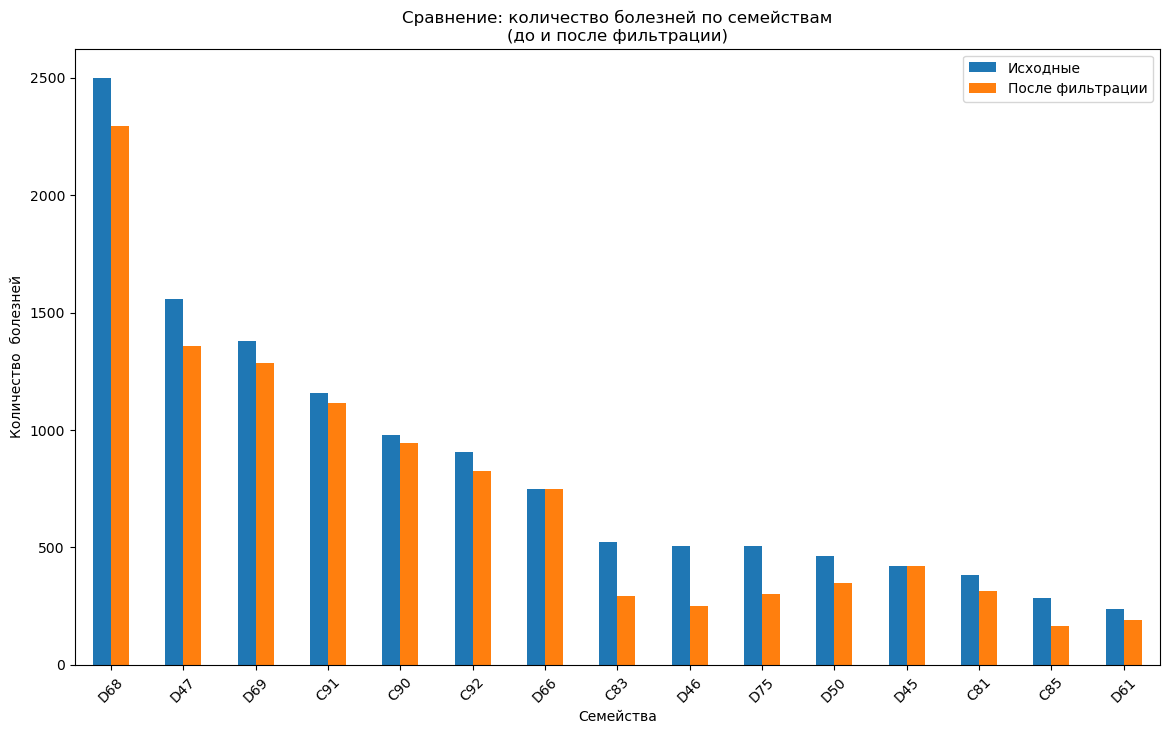

In [13]:

comparison_df = pd.DataFrame({
    'Исходные': family_disease_counts.head(15),
    'После фильтрации': family_disease_counts_filter.reindex(family_disease_counts.head(15).index).fillna(0)
})

comparison_df.plot(kind='bar', figsize=(14, 8))
plt.title('Сравнение: количество болезней по семействам\n(до и после фильтрации)')
plt.xlabel('Семейства')
plt.ylabel('Количество  болезней')
plt.xticks(rotation=45)
plt.legend()


- достаточно презентативно - поэтому оставляем фильтрацию

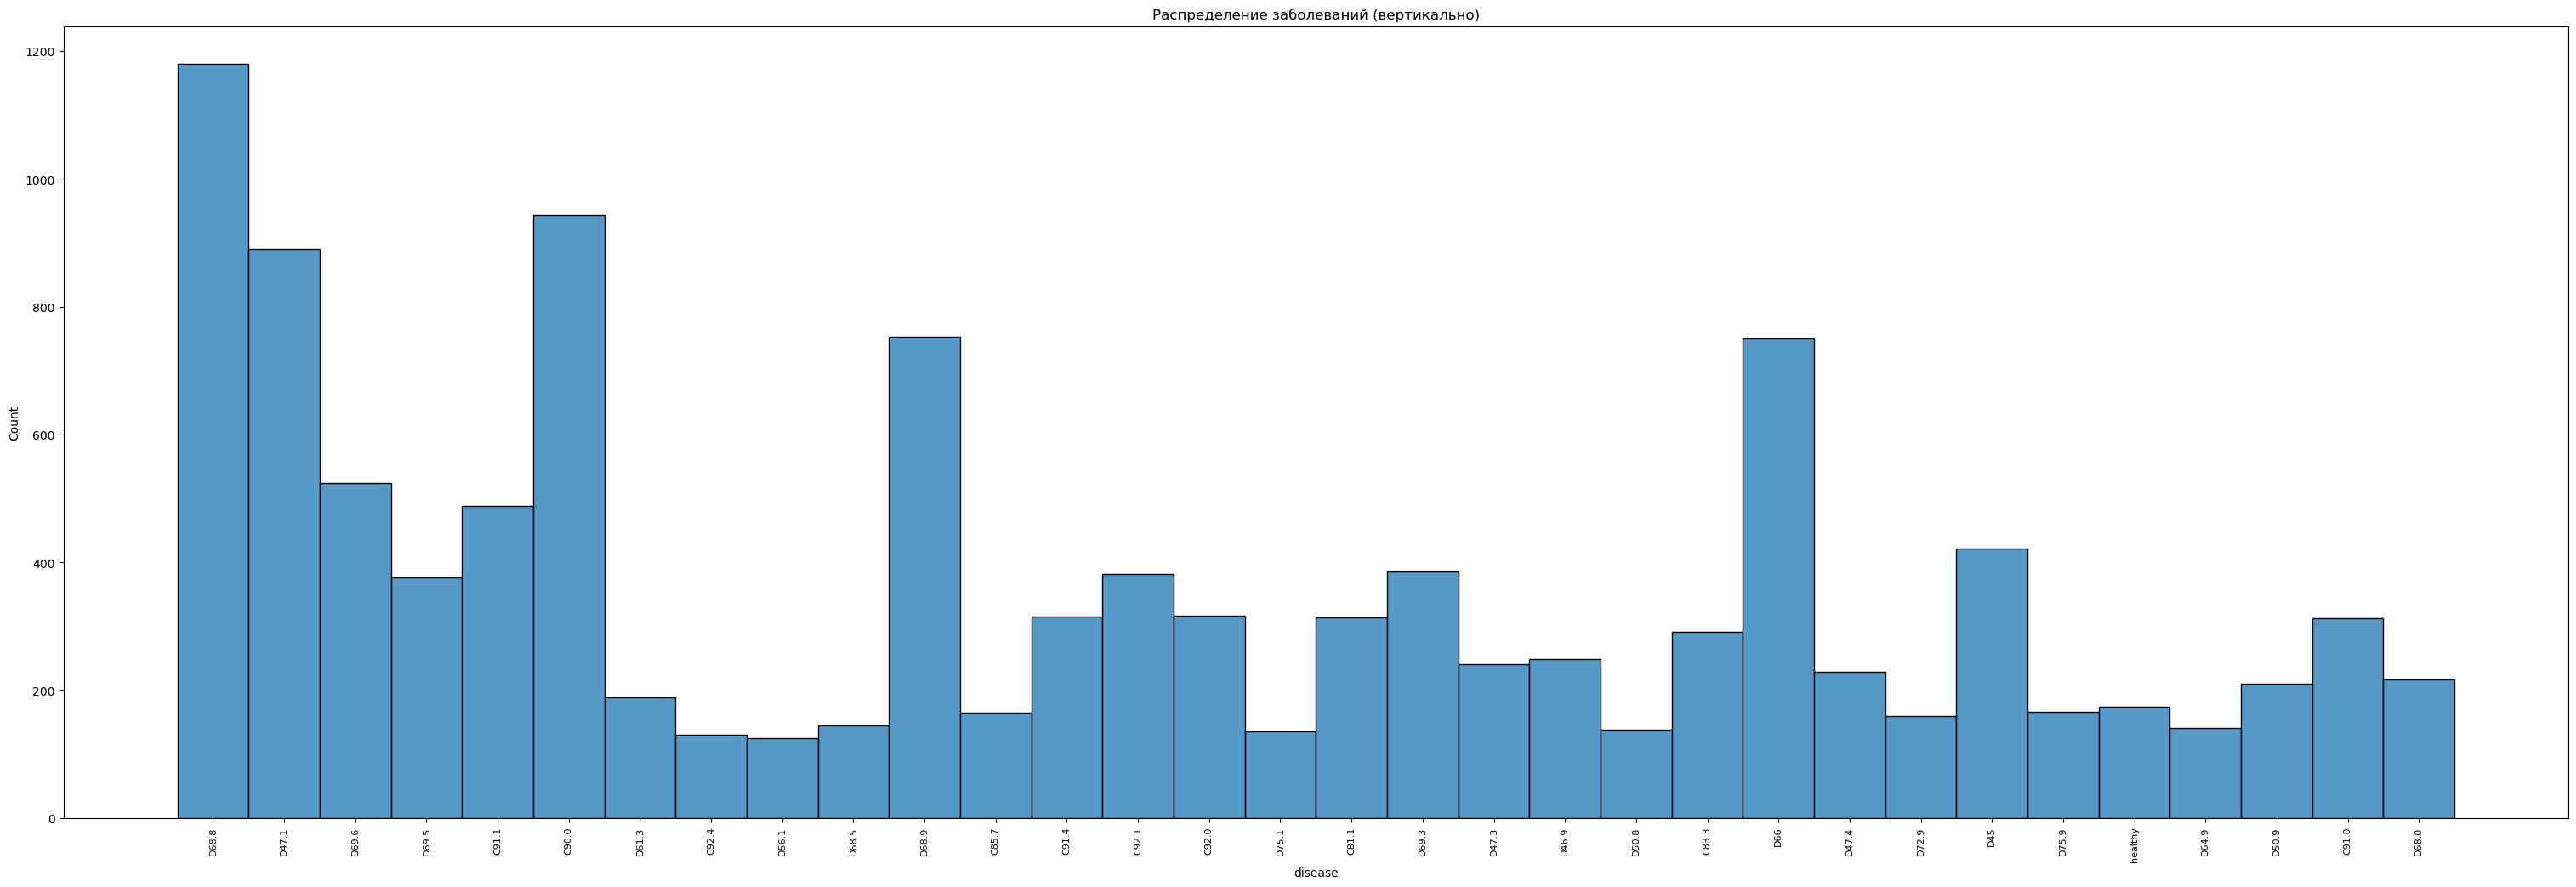

In [14]:


plt.figure(figsize=(60, 20))

plt.subplot(2, 2, 1)
sns.histplot(data=data_final, x="disease")
plt.xticks(rotation=90, fontsize=8)
plt.title("Распределение заболеваний (вертикально)")
plt.tight_layout()

plt.show()

In [15]:
import pickle
with open("./folds_indices_disease_clean.pkl", "rb") as f:
    folds_indices = pickle.load(f)
folds_indices

{'fold_0': [array([    1,     2,     4, ..., 11449, 11450, 11451], shape=(9161,)),
  array([    0,     3,     7, ..., 11441, 11443, 11444], shape=(2291,))],
 'fold_1': [array([    0,     1,     2, ..., 11447, 11448, 11449], shape=(9164,)),
  array([    4,     5,     6, ..., 11440, 11450, 11451], shape=(2288,))],
 'fold_2': [array([    0,     1,     2, ..., 11449, 11450, 11451], shape=(9162,)),
  array([    8,    14,    20, ..., 11437, 11446, 11448], shape=(2290,))],
 'fold_3': [array([    0,     1,     3, ..., 11449, 11450, 11451], shape=(9162,)),
  array([    2,    10,    15, ..., 11425, 11427, 11435], shape=(2290,))],
 'fold_4': [array([    0,     2,     3, ..., 11448, 11450, 11451], shape=(9159,)),
  array([    1,    12,    13, ..., 11445, 11447, 11449], shape=(2293,))]}

In [16]:
X_train_disease_df = pd.DataFrame(X_disease)
y_train_disease_df = pd.DataFrame(y_disease)


In [17]:
data_final["disease"].nunique()

32

In [18]:
data_train["disease"].nunique()

307

# Logger

In [19]:
import loguru
import logging
import sys
from datetime import datetime


def setup_logging(log_level=logging.INFO, log_file=None):

    formatter = logging.Formatter(
        "%(asctime)s - %(name)s - %(levelname)s - %(message)s",
        datefmt="%Y-%m-%d %H:%M:%S",
    )

    logger = logging.getLogger("MLLetter")
    logger.setLevel(log_level)

    logger.handlers.clear()

    # without terminal processing

    return logger


logger = setup_logging(log_level=logging.INFO)

# Functions before training

In [20]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from typing import Tuple, Dict, List, Optional, Union, Any


def impute_train(
    X_train_balanced: pd.DataFrame, X_val: pd.DataFrame
) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Impute missing values using KNN imputer for numeric features.

    Args:
        X_train_balanced: Training features after balancing
        X_val: Validation features

    Returns:
        Tuple of imputed training and validation data
    """

    numeric_features = [col for col in X_train_balanced.columns if col != "gender"]

    X_train_imputed = X_train_balanced.copy()
    X_val_imputed = X_val.copy()

    num_imputer = KNNImputer(n_neighbors=5, weights="uniform")

    X_train_imputed[numeric_features] = num_imputer.fit_transform(
        X_train_imputed[numeric_features]
    )
    X_val_imputed[numeric_features] = num_imputer.transform(
        X_val_imputed[numeric_features]
    )

    print("balanced_complete")

    return X_train_imputed, X_val_imputed


def balanced_train(
    X_train: pd.DataFrame, y_train: pd.DataFrame, 
    bias: int = 0, 
) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Balance training data using combination of under and over sampling.

    Args:
        X_train: Training features
        y_train: Training target (DataFrame or Series)

    Returns:
        Tuple of balanced features and target
    """

    if isinstance(y_train, pd.DataFrame):
        if y_train.shape[1] == 1:
            y_train_series = y_train.iloc[:, 0]
        else:
            raise ValueError(f"y_train DataFrame should have 1 column, got {y_train.shape[1]}")
    else:
        y_train_series = y_train
    
    class_distribution = y_train_series.value_counts()
    target_samples = int(np.median(class_distribution.values) + bias)


    y_train_values = np.array(y_train_series).flatten()

    undersample_classes = {
        cls: target_samples
        for cls in np.unique(y_train_values)
        if (y_train_values == cls).sum() > target_samples
    }

    oversample_classes = {
        cls: target_samples
        for cls in np.unique(y_train_values)
        if (y_train_values == cls).sum() < target_samples
    }

    if undersample_classes:
        model_under = RandomUnderSampler(
            sampling_strategy=undersample_classes, random_state=42
        )
        X_temp, y_temp = model_under.fit_resample(X_train, y_train_values)
        if not isinstance(X_temp, pd.DataFrame):
            X_temp = pd.DataFrame(X_temp, columns=X_train.columns)
    else:
        X_temp, y_temp = X_train.copy(), y_train_values

    if oversample_classes:
        model_over = RandomOverSampler(
            sampling_strategy=oversample_classes, random_state=42
        )
        X_balanced, y_balanced = model_over.fit_resample(X_temp, y_temp)
        if not isinstance(X_balanced, pd.DataFrame):
            X_balanced = pd.DataFrame(X_balanced, columns=X_train.columns)
        if isinstance(y_train, pd.DataFrame):
            y_balanced = pd.DataFrame(y_balanced, columns=y_train.columns)
        else:
            y_balanced = pd.DataFrame(y_balanced)
    else:
        X_balanced = X_temp.copy()
        if isinstance(y_train, pd.DataFrame):
            y_balanced = pd.DataFrame(y_temp, columns=y_train.columns)
        else:
            y_balanced = pd.DataFrame(y_temp)

    return X_balanced, y_balanced

def add_noise_to_data(X, noise_ratio=0.05, random_state=42):
    """
    Normal noise for num feature
    
    Args:
        X: DataFrame 
        noise_ratio
        random_state
    """

    np.random.seed(random_state)
    X_noised = X.copy()

    numeric_cols = X.select_dtypes(include=[np.number]).columns

    for col in numeric_cols:
        col_std = X[col].std()
        if col_std > 0:
            noise_std = col_std * noise_ratio
            noise = np.random.normal(0, noise_std, size=len(X))
            X_noised[col] = X[col] + noise
    
    return X_noised


def preprocessing_data_for_training(
    X_train: pd.DataFrame,
    y_train: pd.Series,
    X_val: pd.DataFrame,
    y_val: pd.Series,
    use_onehot: bool = True,
    bias : int = 0, 
    noise: bool = False, 
    is_balanced: bool = True
) -> Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame, LabelEncoder]:
    """
    Preprocessing pipeline for training data.

    Args:
        X_train: Training features
        y_train: Training target
        X_val: Validation features
        y_val: Validation target
        use_onehot: Whether to use one-hot encoding for categorical features

    Returns:
        Tuple of (X_train_balanced, y_train_balanced, X_val_processed,
                 y_val_encoded, label_encoder)
    """

    logger.info("START PREPROCESSING")

    try:

        X_train_processed = (
            X_train.drop("client_id", axis=1).copy()
            if "client_id" in X_train.columns
            else X_train.copy()
        )

        cols_to_convert = [col for col in X_train_processed.columns if col != "gender"]
        X_train_processed[cols_to_convert] = X_train_processed[cols_to_convert].apply(
            pd.to_numeric, errors="coerce"
        )

        X_val_processed = (
            X_val.drop("client_id", axis=1).copy()
            if "client_id" in X_val.columns
            else X_val.copy()
        )
        X_val_processed[cols_to_convert] = X_val_processed[cols_to_convert].apply(
            pd.to_numeric, errors="coerce"
        )

        if X_val is not None:
            X_val_processed = (
                X_val.drop("client_id", axis=1).copy()
                if "client_id" in X_val.columns
                else X_val.copy()
            )
            X_val_processed[cols_to_convert] = X_val_processed[cols_to_convert].apply(
                pd.to_numeric, errors="coerce"
            )
        else:
            X_val_processed = None

        if use_onehot:

            if "gender" in X_train_processed.columns.tolist():

                X_train_processed = pd.get_dummies(
                    X_train_processed, columns=["gender"], drop_first=True
                )
                X_val_processed = pd.get_dummies(
                    X_val_processed, columns=["gender"], drop_first=True
                )
                logger.info(f"One-Hot Encoding  - gender.")

            X_train_processed, X_val_processed = X_train_processed.align(
                X_val_processed, join="left", axis=1, fill_value=0
            )

        label_encoder = LabelEncoder()
        y_train_encoded = pd.DataFrame(label_encoder.fit_transform(y_train))
        y_val_encoded = pd.DataFrame(label_encoder.transform(y_val))

        if is_balanced:

            X_train_balanced, y_train_balanced = balanced_train(
                X_train_processed, y_train_encoded, bias
            )

        else: 
            X_train_balanced, y_train_balanced = X_train_processed, y_train_encoded

        if noise:
            X_train_balanced = pd.DataFrame(add_noise_to_data(X_train_balanced, noise_ratio=0.2, random_state=42))

        return (
            X_train_balanced,
            y_train_balanced,
            X_val_processed,
            y_val_encoded,
            label_encoder,
        )

    except Exception as e:
        logger.error(f"❌ Error with data preprocessing: {str(e)}", exc_info=True)
        raise

# Function after training

In [21]:
from sklearn.metrics import top_k_accuracy_score


def calculate_metrics(
    y_val: Union[pd.Series, np.ndarray],
    y_pred: Union[pd.Series, np.ndarray],
    y_proba: Optional[Union[pd.Series, np.ndarray]] = None,
    k_list: Optional[List[int]] = None,
) -> Dict[str, float]:
    """
    Calculate classification metrics.

    Args:
        y_val: True labels
        y_pred: Predicted labels
        y_proba: Predicted probabilities (for AUC and top-k accuracy)
        k_list: List of k values for top-k accuracy

    Returns:
        Dictionary with metric names and values
    """

    y_val = np.array(y_val).flatten()
    y_pred = np.array(y_pred).flatten()

    results = {
        "Accuracy": accuracy_score(y_val, y_pred),
        "F1-micro": f1_score(y_val, y_pred, average="micro"),
        "F1-macro": f1_score(y_val, y_pred, average="macro"),
        "Precision-micro": precision_score(y_val, y_pred, average="micro"),
        "Precision-macro": precision_score(y_val, y_pred, average="macro"),
        "Recall-micro": recall_score(y_val, y_pred, average="micro"),
        "Recall-macro": recall_score(y_val, y_pred, average="macro"),
    }

    if y_proba is not None:
        try:
            results["AUC-ROC"] = roc_auc_score(y_val, y_proba, multi_class="ovr")
        except Exception as e:
            print(f"AUC-ROC calculation failed: {e}")
            results["AUC-ROC"] = None
    else:
        results["AUC-ROC"] = None

    if y_proba is not None:
        for k in k_list:
            top_k = top_k_accuracy_score(y_val, y_proba, k=k)
            results[f"top_{k}_accuracy"] = top_k

    return results


# Calculate confusion matrix
def draw_confusion_matrix(
    y_val: List[Union[pd.Series, np.ndarray]],
    y_pred: List[Union[pd.Series, np.ndarray]],
    classes: Union[List[str], np.ndarray],
    n_splits: int,
    name_model: str,
    bias, 
    noise
) -> None:
    """
    Draw confusion matrices for multiple folds.

    Args:
        y_val: List of true labels for each fold
        y_pred: List of predicted labels for each fold
        classes: List of class names
        n_splits: Number of folds (subplots)
        name_model: Model name for title
    """

    fig, axs = plt.subplots(ncols=n_splits, figsize=(40, 10))
    
    all_fold_matrices = []

    for fold_idx, (ax, y_val_fold, y_pred_fold) in enumerate(zip(axs, y_val, y_pred)):
        conf_matrix = confusion_matrix(y_val_fold, y_pred_fold)
        all_fold_matrices.append(conf_matrix)

        conf_matrix_normalized = (
            conf_matrix.astype("float") / conf_matrix.sum(axis=1)[:, np.newaxis]
        )
        conf_matrix_normalized = np.round(conf_matrix_normalized, 2)

        class_counts = conf_matrix.sum(axis=1)

        y_ticklabels = []
        for i, class_name in enumerate(classes):
            y_ticklabels.append(f"{class_name}\n({class_counts[i]})")

        sns.heatmap(
            conf_matrix_normalized,
            vmax=1.0,
            annot=True,
            fmt=".2f",
            cmap="Blues",
            cbar=True,
            linewidths=0.5,
            linecolor="black",
            xticklabels=classes,
            yticklabels=y_ticklabels,
            ax=ax,
        )

        ax.set_title(f"Fold {fold_idx + 1}")
        ax.set_xlabel("Predicted Label")
        if fold_idx == 0:
            ax.set_ylabel("True Label")

    fig.suptitle(f"Confusion Matrix for {name_model} with Bias {bias} in balanced in {noise}", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

    if all_fold_matrices: 
        sum_cm = np.sum(all_fold_matrices, axis=0)
        
        sum_cm_normalized = sum_cm.astype("float") / sum_cm.sum(axis=1)[:, np.newaxis]
        sum_cm_normalized = np.round(sum_cm_normalized, 2)
        
        plt.figure(figsize=(12, 10))
        
        class_counts_total = sum_cm.sum(axis=1)
        y_ticklabels_total = []
        for i, class_name in enumerate(classes):
            y_ticklabels_total.append(f"{class_name}\n(total: {class_counts_total[i]})")
        
        sns.heatmap(
            sum_cm_normalized,
            annot=True,
            fmt=".2f",
            cmap="Blues",
            xticklabels=classes,
            yticklabels=y_ticklabels_total,
            cbar_kws={'label': 'Normalized Ratio'}
        )
        
        plt.title(f'Overall Confusion Matrix for {name_model}\n(Bias: {bias}, Noise: {noise})', fontsize=14, pad=20)
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        

        for i in range(len(classes)):
            for j in range(len(classes)):
                plt.text(j + 0.5, i + 0.3, f'({sum_cm[i, j]})', 
                        ha='center', va='center', fontsize=9, color='red')
        
        plt.tight_layout()
        plt.show()
        
   
        plt.figure(figsize=(12, 10))
        sns.heatmap(
            sum_cm, 
            annot=True, 
            fmt='d', 
            cmap='Blues', 
            xticklabels=classes, 
            yticklabels=classes,
            cbar_kws={'label': 'Count'}
        )
        plt.title(f'Absolute Confusion Matrix for {name_model}\n(Bias: {bias}, Noise: {noise})', fontsize=14, pad=20)
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.tight_layout()
        plt.show()
        
        print(f"\n=== OVERALL METRICS for {name_model} ===")
        print(f"Total samples: {np.sum(sum_cm)}")
        
        overall_accuracy = np.trace(sum_cm) / np.sum(sum_cm)
        print(f"Overall Accuracy: {overall_accuracy:.4f}")
        
        from sklearn.metrics import classification_report
        
        all_y_true = np.concatenate(y_val)
        all_y_pred = np.concatenate(y_pred)
        
        print("\nDetailed Classification Report:")
        print(classification_report(all_y_true, all_y_pred, target_names=classes))

# Decorator for validation

In [22]:
import hashlib
import pandas as pd
from functools import wraps


def data_integrity_check(func):
    """Decorator for checking the integrity of input data"""

    @wraps(func)
    def wrapper(X, y, *args, **kwargs):
        original_hashes = {
            "X_hash": get_data_hash(X),
            "y_hash": get_data_hash(y),
            "X_shape": X.shape if hasattr(X, "shape") else len(X),
            "y_shape": y.shape if hasattr(y, "shape") else len(y),
        }

        result = func(X, y, *args, **kwargs)

        current_hashes = {
            "X_hash": get_data_hash(X),
            "y_hash": get_data_hash(y),
            "X_shape": X.shape if hasattr(X, "shape") else len(X),
            "y_shape": y.shape if hasattr(y, "shape") else len(y),
        }

        if original_hashes != current_hashes:
            raise ValueError("The integrity of the input data is broken!")
        else:
            print(f"{func.__name__} not change")
        return result

    return wrapper


def get_data_hash(data):
    if isinstance(data, pd.DataFrame) or isinstance(data, pd.Series):
        return hashlib.md5(pd.util.hash_pandas_object(data).values).hexdigest()
    elif isinstance(data, np.ndarray):
        return hashlib.md5(data.tobytes()).hexdigest()
    else:
        return hashlib.md5(str(data).encode()).hexdigest()

# Cross-validation

In [23]:
from model_configs import MODEL_CONFIGS
import xgboost as xgb
from scipy.special import softmax  

@data_integrity_check
def models_cross_validation(
    X: pd.DataFrame,
    y: pd.Series,
    models: Dict[str, Any],
    folds_indices: str,
    cat_features: List[str] = None,
    n_splits: int = 5,
    is_imputation: bool = True,
    params: Optional[Dict[str, Any]] = None,
    bias: int = 0, 
    noise: bool = False, 
    draw_matrix: bool = False,
    is_balanced: bool = True
) -> Tuple[
    Dict[str, List[Any]], pd.DataFrame, Dict[int, Dict[str, Any]], List[Dict[str, Any]]
]:
    """
    Perform cross-validation for multiple models with XGBoost native API support.
    """

    cv = StratifiedKFold(n_splits=n_splits, random_state=42, shuffle=True)

    results = []
    model_list = {}
    cv_splits_dict = {}
    shap_data_list = []

    for name, model_class in models.items():

        if params:
            config = params
        elif name not in MODEL_CONFIGS:
            print(f"Model_config not found for {name}, use default params")
            config = {
                "params": {"random_state": 42},
                "needs_cat_features": False,
                "use_onehot": True,
                "needs_imputation": True,
                "use_eval_set": False,
                "use_native_api": False,  
            }
        else:
            config = MODEL_CONFIGS[name]

        fold_models = []
        y_val_list = []
        y_pred_list = []
        model_classes = None

        for fold_idx in tqdm(range(n_splits), desc=f"{name} Cross-Validation"):

            fold_key = f"fold_{fold_idx}"
            
            if fold_key not in folds_indices:
                print(f"Warning: Fold {fold_key} not found in folds_indices")
                continue
                
            fold_data = folds_indices[f"fold_{fold_idx}"]  
            train_idx = fold_data[0]  
            val_idx = fold_data[1]  
            
            if hasattr(train_idx, 'tolist'):
                train_idx_list = [int(x) for x in train_idx.tolist()]
            elif isinstance(train_idx, (list, tuple)):
                train_idx_list = [int(x) for x in train_idx]
            else:
                train_idx_list = [int(train_idx)]
                
            if hasattr(val_idx, 'tolist'):
                val_idx_list = [int(x) for x in val_idx.tolist()]
            elif isinstance(val_idx, (list, tuple)):
                val_idx_list = [int(x) for x in val_idx]
            else:
                val_idx_list = [int(val_idx)]

            cv_splits_dict.setdefault(
                fold_idx,
                {
                    "train_idx": train_idx_list,
                    "val_idx": val_idx_list,
                    "train_size": len(train_idx_list),
                    "val_size": len(val_idx_list),
                },
            )

            X_train, y_train = X.iloc[train_idx_list], y.iloc[train_idx_list]
            X_val, y_val = X.iloc[val_idx_list], y.iloc[val_idx_list]

            X_train_imp, X_val_imp = X_train, X_val

            (
                X_train_balanced,
                y_train_balanced,
                X_val_preprocessed,
                y_val_preprocessed,
                label_encoder,
            ) = preprocessing_data_for_training(
                X_train_imp, y_train, X_val_imp, y_val, 
                use_onehot=config["use_onehot"], bias=bias, noise=noise, is_balanced=is_balanced
            )

            X_train_final, X_val_final = X_train_balanced, X_val_preprocessed

            model_params = config["params"].copy()  if "params" in config else {}

            use_native_api = config.get("use_native_api", False)
            
            if use_native_api and name == "XGBoost":
                X_train_native = X_train_final.copy()
                X_val_native = X_val_final.copy()
                
                for col in X_train_native.select_dtypes(include=['object']).columns:
                    X_train_native[col] = X_train_native[col].astype('category')
                    X_val_native[col] = X_val_native[col].astype('category')

                dtrain = xgb.DMatrix(
                    X_train_native,  
                    label=y_train_balanced, 
                    enable_categorical=True
                )
                dval = xgb.DMatrix(
                    X_val_native, 
                    label=y_val_preprocessed, 
                    enable_categorical=True
                )
                
                num_boost_round = model_params.pop("n_estimators", 1000)
                early_stopping_rounds = model_params.pop("early_stopping_rounds", 20)
                

                focal_loss_instance = config.get("focal_loss_instance")
                if focal_loss_instance:
                    model_instance = xgb.train(
                        model_params,
                        dtrain,
                        num_boost_round=num_boost_round,
                        evals=[(dval, 'validation')],
                        early_stopping_rounds=early_stopping_rounds,
                        obj=focal_loss_instance.focal_loss_objective,
                        custom_metric=focal_loss_instance.compute_loss_value,  
                        verbose_eval=False
                    )
                else:
                    model_instance = xgb.train(
                        model_params,
                        dtrain,
                        num_boost_round=num_boost_round,
                        evals=[(dval, 'validation')],
                        early_stopping_rounds=early_stopping_rounds,
                        verbose_eval=False
                    )

                y_pred_raw = model_instance.predict(dval)
                n_samples = len(y_val_preprocessed)
                n_classes = model_params.get("num_class", len(np.unique(y_train_balanced)))

                if len(y_pred_raw) == n_samples * n_classes:
                    y_pred_matrix = y_pred_raw.reshape(n_samples, n_classes)
                    y_proba = softmax(y_pred_matrix, axis=1) 
                    y_pred = np.argmax(y_proba, axis=1)
                else:
                    y_pred = np.round(y_pred_raw).astype(int)
                    y_proba = None
                    
                y_pred = y_pred.astype(int)
                                
            else:
                # For catboost
                if config["needs_cat_features"]:
                    model_params["cat_features"] = cat_features

                model_instance = model_class(**model_params)

                if config["use_eval_set"]:
                    if name == "CatBoost":
                        train_data = Pool(
                            X_train_final, y_train_balanced, cat_features=cat_features
                        )
                        val_data = Pool(
                            X_val_final, y_val_preprocessed, cat_features=cat_features
                        )
                        model_instance.fit(train_data, eval_set=val_data, verbose=False)
                    else:
                        model_instance.fit(
                            X_train_final,
                            y_train_balanced,
                            eval_set=[(X_val_final, y_val_preprocessed)],
                            verbose=False,
                        )
                else:
                    model_instance.fit(X_train_final, y_train_balanced)

                y_pred = model_instance.predict(X_val_final)
                y_proba = (
                    model_instance.predict_proba(X_val_final)
                    if hasattr(model_instance, "predict_proba")
                    else None
                )

            if model_classes is None:
                model_classes = label_encoder.classes_

            if not hasattr(model_instance, "classes_") or model_instance.classes_ is None:
                model_instance.classes_ = model_classes

            y_val_list.append(y_val_preprocessed)
            y_pred_list.append(y_pred)

            metrics = calculate_metrics(
                y_val_preprocessed, y_pred, y_proba, k_list=[2, 3, 5]
            )
            metrics["model"] = name
            metrics["fold"] = fold_idx + 1
            results.append(metrics)

            fold_models.append(model_instance)

            if config.get("shap", False):
                try:
                    if use_native_api and name == "XGBoost":
                        explainer = shap.TreeExplainer(model_instance)
                        shap_values = explainer.shap_values(X_val_final)
                    else:
                        explainer = shap.TreeExplainer(model_instance)
                        shap_values = explainer.shap_values(X_val_final)

                    shap_data = {
                        "model_name": name,
                        "fold": fold_idx,
                        "shap_values": shap_values,
                        "X_val": X_val_final,
                        "feature_names": X_val_final.columns.tolist(),
                        "label_encoder": label_encoder,
                        "classes": model_classes,
                    }
                    shap_data_list.append(shap_data)
                except Exception as e:
                    print(f"SHAP failed for {name} fold {fold_idx}: {e}")

        model_list[name] = fold_models
        if draw_matrix:
            draw_confusion_matrix(y_val_list, y_pred_list, model_classes, n_splits, name, bias, noise)

    return model_list, pd.DataFrame(results), cv_splits_dict, shap_data_list

## Training

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


# models = {
#     "LogisticRegression": LogisticRegression,
#     "RandomForest": RandomForestClassifier,
#     "SVM": SVC,
#     "CatBoost": CatBoostClassifier,
#     "XGBoost": XGBClassifier,
#     "LightGBM": LGBMClassifier,
# }

# models = {
#     "CatBoost": CatBoostClassifier,
#     "XGBoost": XGBClassifier,
#     "LightGBM": LGBMClassifier,
# }

# models = {
#     "CatBoost": CatBoostClassifier,
#     "XGBoost": XGBClassifier,
# }

models = {
    "CatBoost": CatBoostClassifier,
}

# models = {
#     "XGBoost": XGBClassifier,
# }

In [25]:
def analyze_bias_results(result_balanced):

    metrics_summary = []
    
    for bias, (trained_models, results, cv_dict, shap_data_list) in result_balanced.items():

        avg_metrics = results.groupby('model').mean(numeric_only=True).reset_index()
        avg_metrics['bias'] = bias

        metrics_summary.append(avg_metrics)

    all_metrics = pd.concat(metrics_summary, ignore_index=True)
    
    return all_metrics

def plot_bias_impact(metrics_df):

    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    metric = 'F1-macro'

    for model in metrics_df['model'].unique():
        model_data = metrics_df[metrics_df['model'] == model]
        model_data = model_data.sort_values("bias")
        ax.plot(model_data['bias'], model_data[metric], 
                    marker='o', linewidth=2, markersize=8, label=model)
        
        for idx, row in model_data.iterrows():
            ax.annotate(f'{row[metric]:.3f}', 
                            (row['bias'], row[metric]),
                            textcoords="offset points",
                            xytext=(0,10), ha='center', fontsize=8)
        
    ax.set_xlabel('Bias')
    ax.set_ylabel(metric)
    ax.set_title(f'{metric} Bias')
    ax.legend()
    ax.grid(True, alpha=0.3)
                
                
    plt.tight_layout()
    plt.show()
        

In [26]:
y_train_disease_df

disease
0       D68.8
1       D47.1
2       D69.6
3       D69.5
4       C91.1
...       ...
11447   D68.8
11448     D66
11449   D68.9
11450   D46.9
11451   C91.1

[11452 rows x 1 columns]

 # Best bias  

In [27]:
list(range(-1000, 1000, 500))

[-1000, -500, 0, 500]

In [28]:
bias_list = list(range(-200 , 1000, 200))
result_balanced = {}


for bias in bias_list:
    trained_models_disease, results_disease, cv_dict_disease, shap_data_list_disease = models_cross_validation(
    X=X_train_disease_df, y=y_train_disease_df, models=models, folds_indices=folds_indices, n_splits=5, bias=bias, noise=True, draw_matrix=False)
    result_balanced[bias] = (trained_models_disease, results_disease, cv_dict_disease, shap_data_list_disease)


CatBoost Cross-Validation:   0%|          | 0/5 [00:00<?, ?it/s]

CatBoost Cross-Validation: 100%|██████████| 5/5 [00:56<00:00, 11.24s/it]


models_cross_validation not change


CatBoost Cross-Validation: 100%|██████████| 5/5 [01:06<00:00, 13.26s/it]


models_cross_validation not change


CatBoost Cross-Validation: 100%|██████████| 5/5 [01:24<00:00, 16.91s/it]


models_cross_validation not change


CatBoost Cross-Validation: 100%|██████████| 5/5 [01:41<00:00, 20.24s/it]


models_cross_validation not change


CatBoost Cross-Validation: 100%|██████████| 5/5 [01:41<00:00, 20.31s/it]


models_cross_validation not change


CatBoost Cross-Validation: 100%|██████████| 5/5 [01:45<00:00, 21.00s/it]

models_cross_validation not change


In [29]:
y_train_disease_df.nunique()

disease    32
dtype: int64

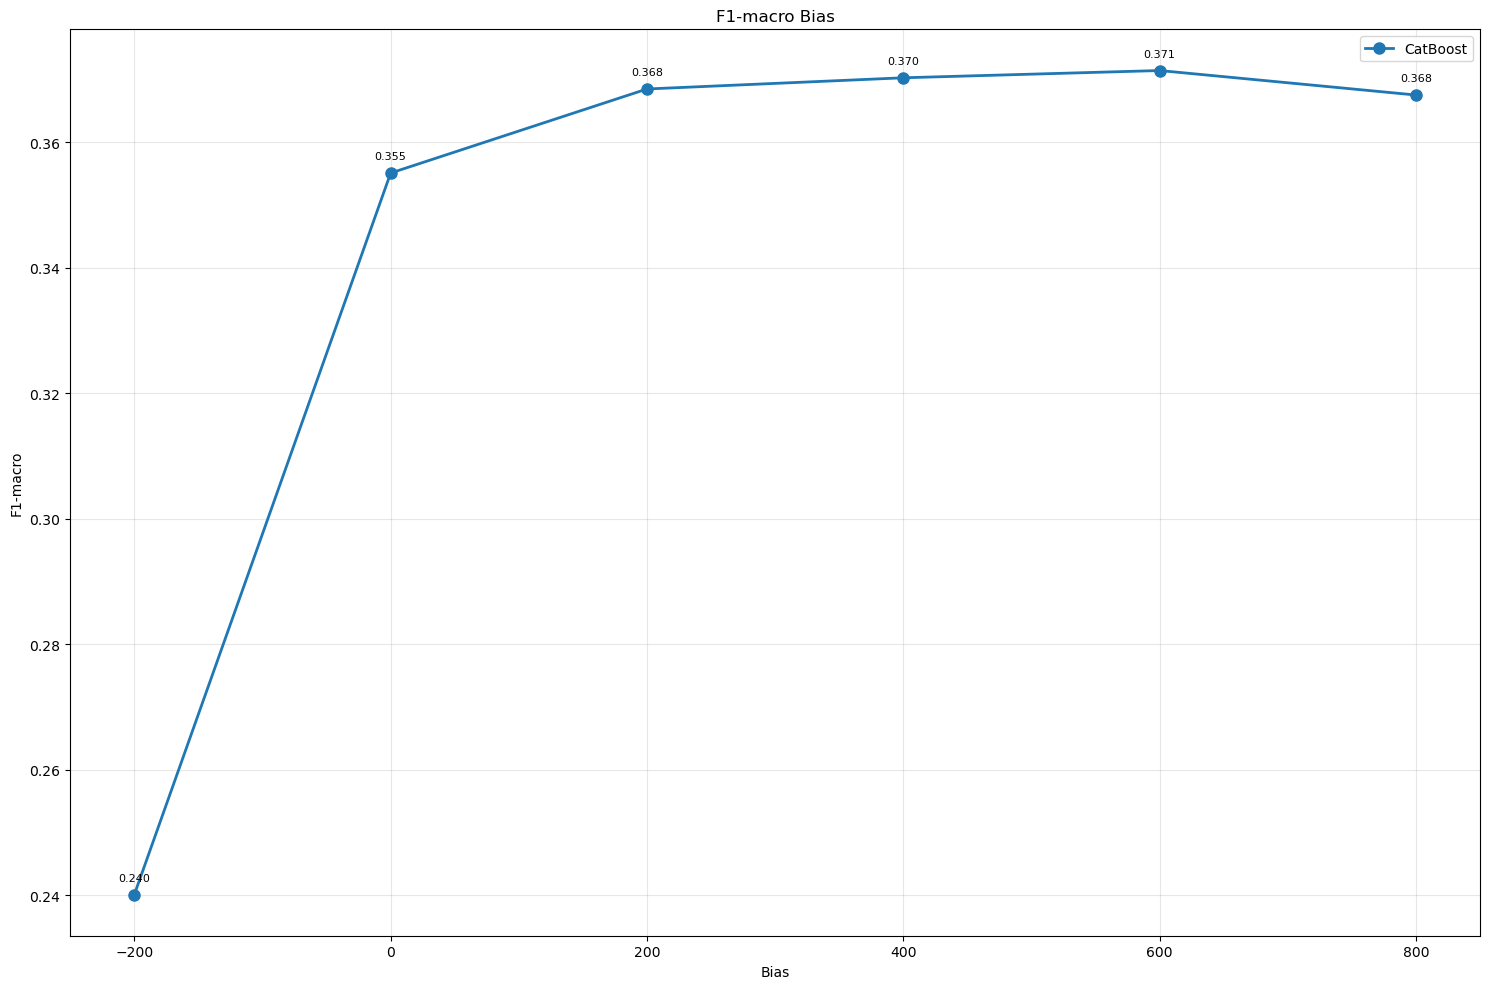

In [30]:
metrics_df = analyze_bias_results(result_balanced)
plot_bias_impact(metrics_df)


In [31]:
metrics_df[metrics_df["F1-macro"] == metrics_df["F1-macro"].max()]

model  Accuracy  F1-micro  F1-macro  Precision-micro  Precision-macro  \
4  CatBoost  0.402199  0.402199  0.371436         0.402199         0.368734   

   Recall-micro  Recall-macro   AUC-ROC  top_2_accuracy  top_3_accuracy  \
4      0.402199      0.403274  0.910325        0.590374        0.697866   

   top_5_accuracy  fold  bias  
4         0.80335   3.0   600

# With Noise 

CatBoost Cross-Validation:   0%|          | 0/5 [00:00<?, ?it/s]

CatBoost Cross-Validation: 100%|██████████| 5/5 [01:40<00:00, 20.01s/it]


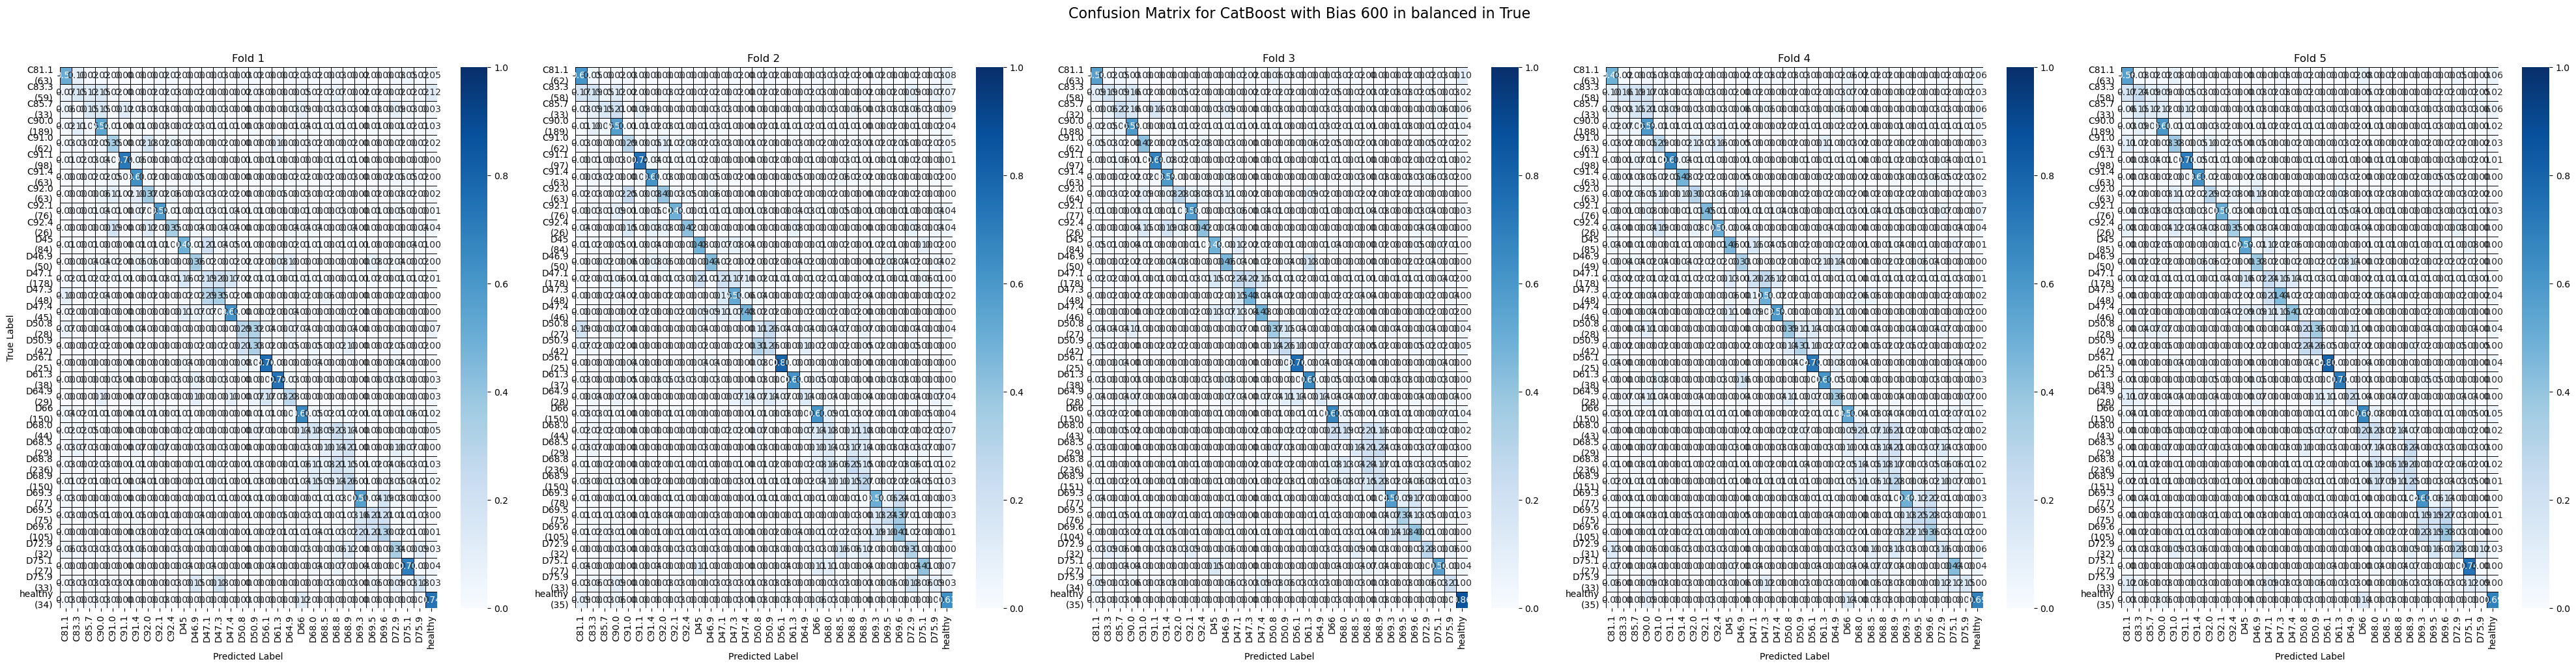

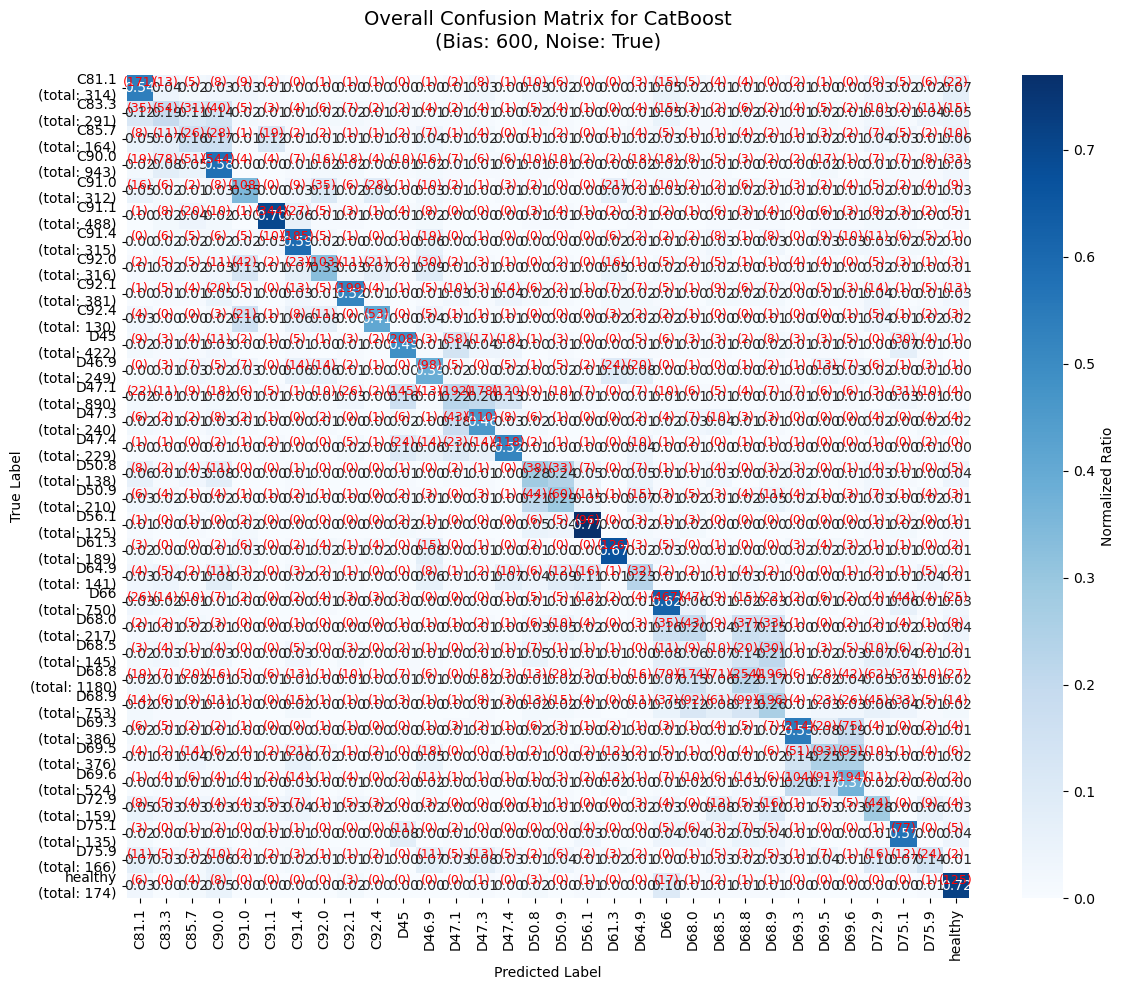

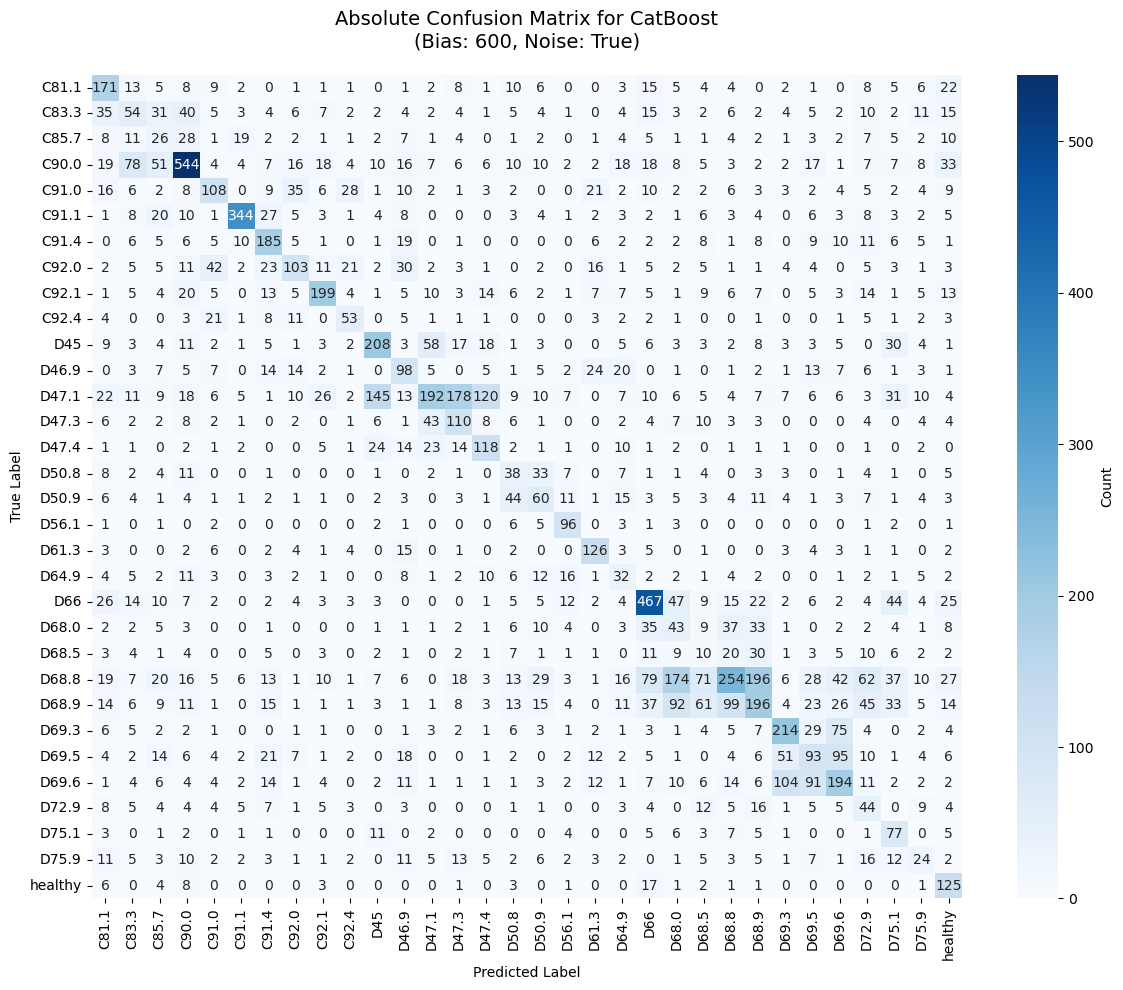


=== OVERALL METRICS for CatBoost ===
Total samples: 11452
Overall Accuracy: 0.4022

Detailed Classification Report:
              precision    recall  f1-score   support

       C81.1       0.41      0.54      0.47       314
       C83.3       0.20      0.19      0.19       291
       C85.7       0.10      0.16      0.12       164
       C90.0       0.66      0.58      0.61       943
       C91.0       0.43      0.35      0.38       312
       C91.1       0.83      0.70      0.76       488
       C91.4       0.48      0.59      0.53       315
       C92.0       0.43      0.33      0.37       316
       C92.1       0.63      0.52      0.57       381
       C92.4       0.38      0.41      0.40       130
         D45       0.47      0.49      0.48       422
       D46.9       0.31      0.39      0.35       249
       D47.1       0.53      0.22      0.31       890
       D47.3       0.27      0.46      0.34       240
       D47.4       0.36      0.52      0.43       229
       D50.8      

CatBoost Cross-Validation: 100%|██████████| 5/5 [01:58<00:00, 23.73s/it]


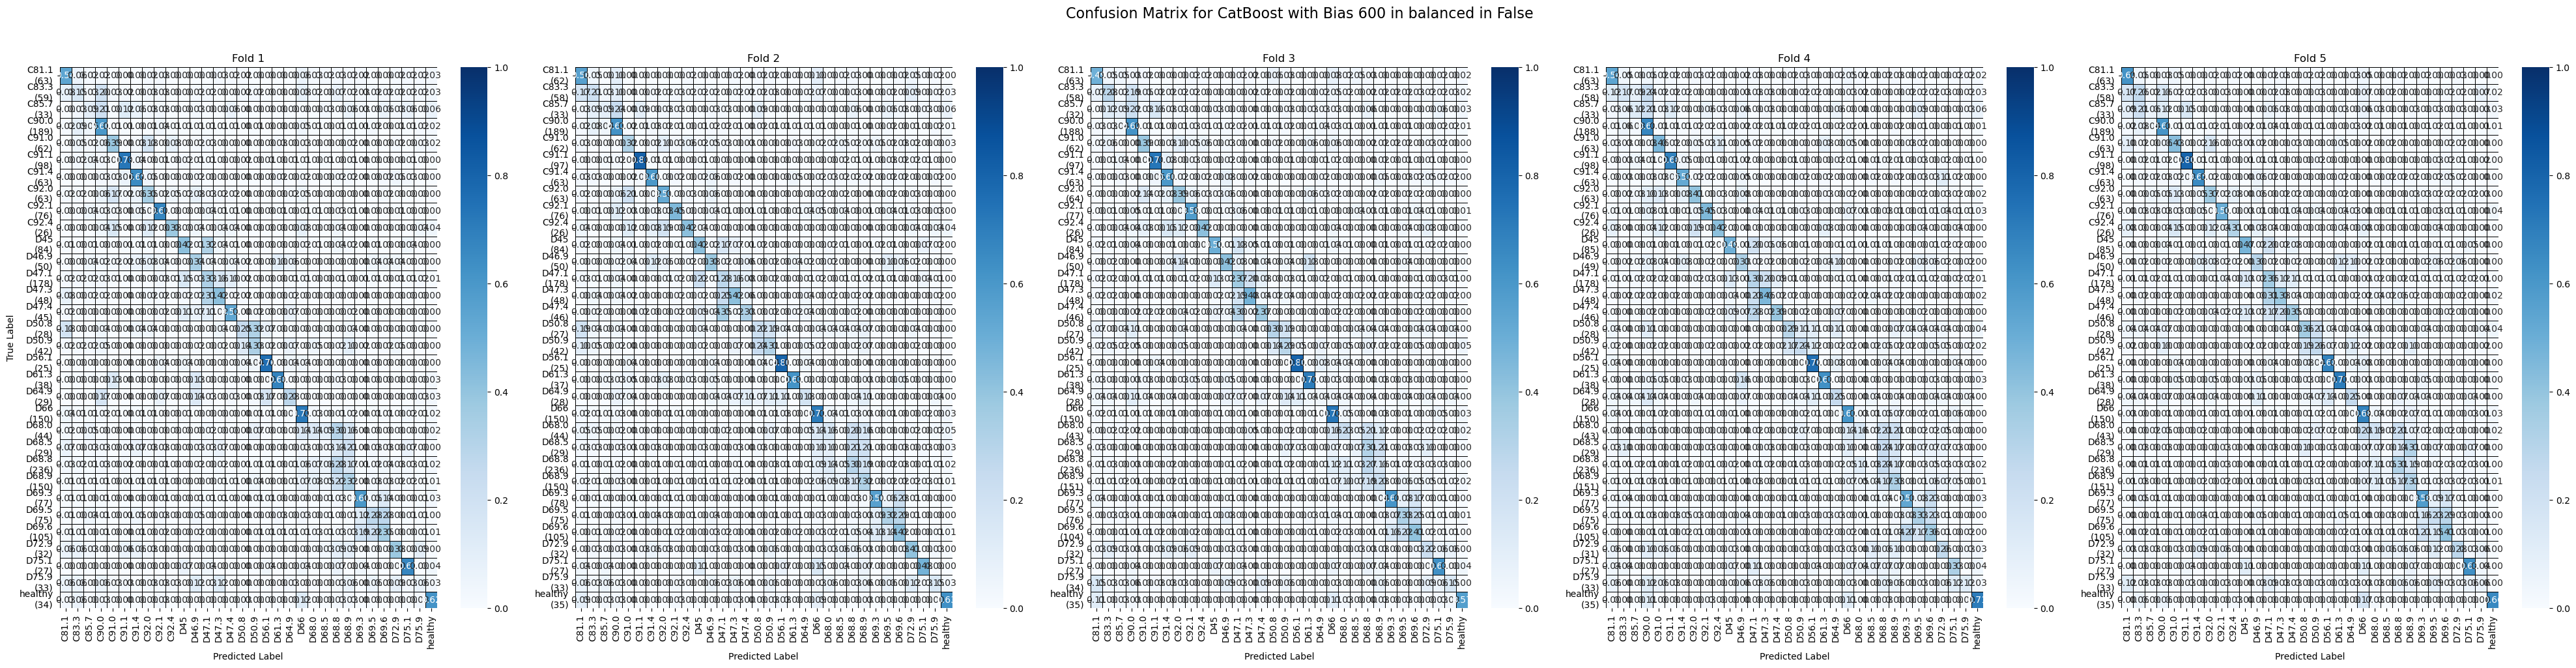

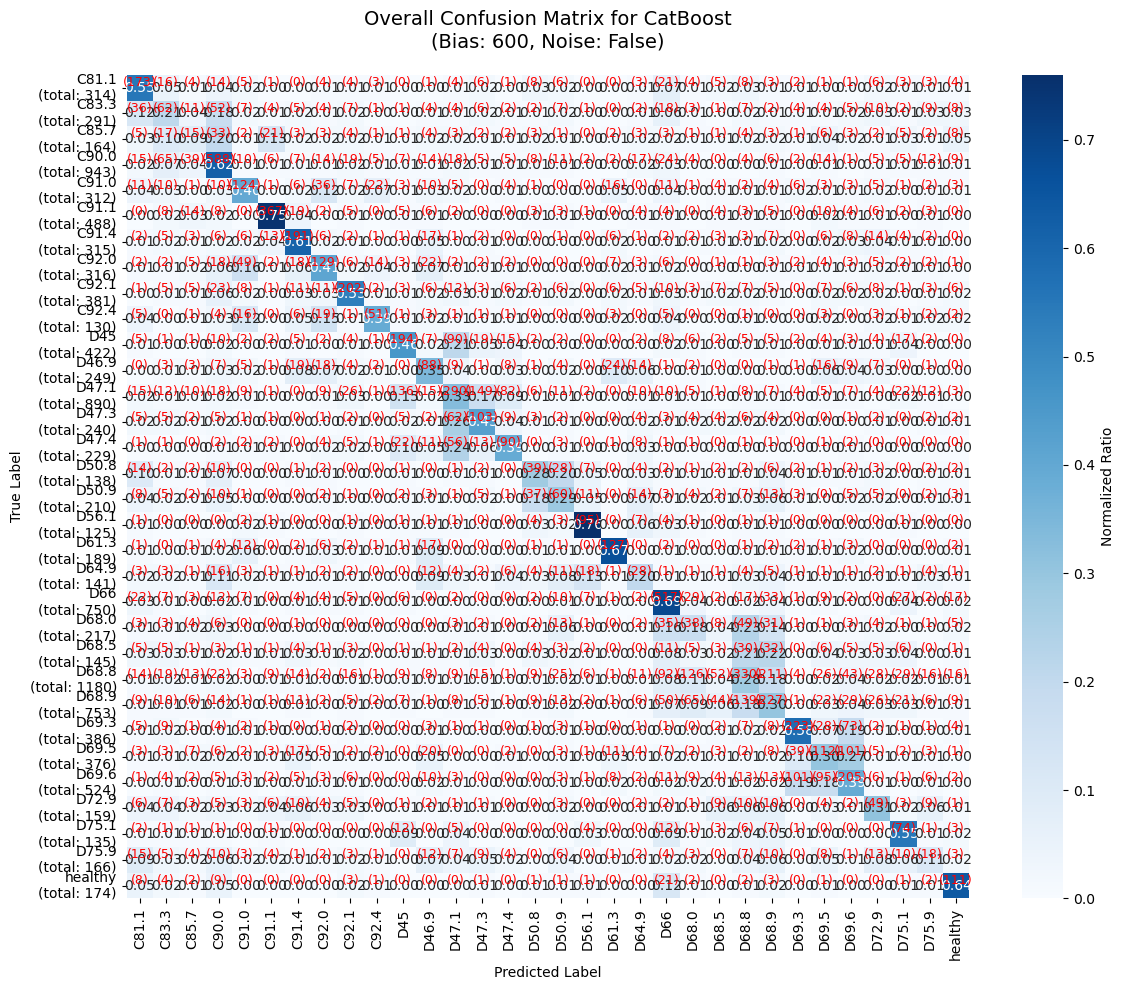

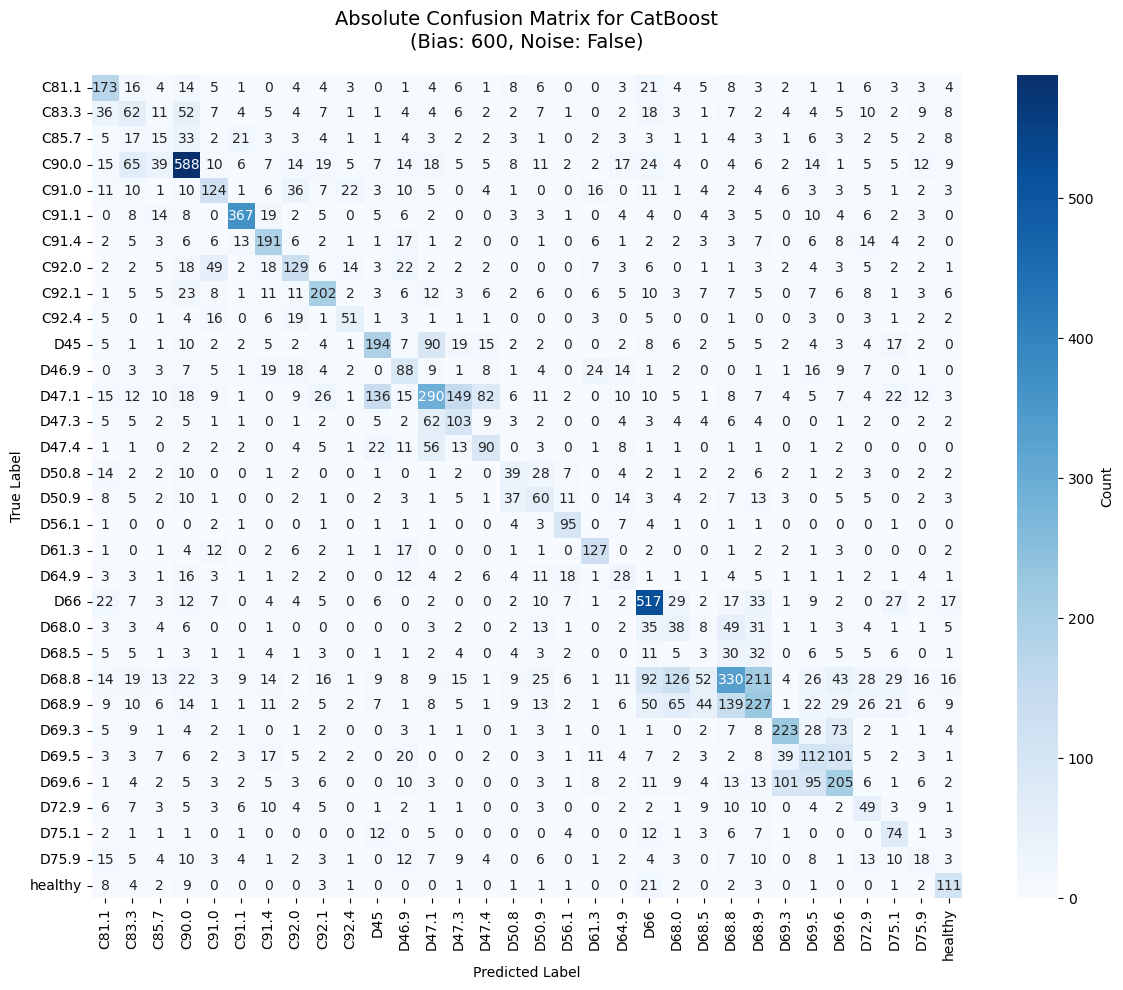


=== OVERALL METRICS for CatBoost ===
Total samples: 11452
Overall Accuracy: 0.4299

Detailed Classification Report:
              precision    recall  f1-score   support

       C81.1       0.44      0.55      0.49       314
       C83.3       0.21      0.21      0.21       291
       C85.7       0.09      0.09      0.09       164
       C90.0       0.63      0.62      0.63       943
       C91.0       0.43      0.40      0.41       312
       C91.1       0.81      0.75      0.78       488
       C91.4       0.53      0.61      0.57       315
       C92.0       0.43      0.41      0.42       316
       C92.1       0.57      0.53      0.55       381
       C92.4       0.45      0.39      0.42       130
         D45       0.46      0.46      0.46       422
       D46.9       0.29      0.35      0.32       249
       D47.1       0.48      0.33      0.39       890
       D47.3       0.29      0.43      0.34       240
       D47.4       0.37      0.39      0.38       229
       D50.8      

In [32]:
trained_models, results, cv_dict, shap_data_list = models_cross_validation(
    X=X_train_disease_df, y=y_train_disease_df, models=models, folds_indices=folds_indices, n_splits=5, bias=600, noise=True, draw_matrix=True
)

trained_models, results, cv_dict, shap_data_list = models_cross_validation(
    X=X_train_disease_df, y=y_train_disease_df, models=models, folds_indices=folds_indices, n_splits=5, bias=600, noise=False, draw_matrix=True
)


In [33]:
for model_name in results["model"].unique():
    df_model = pd.DataFrame(results[results["model"] == model_name])

    print(f"\n{'='*60}")
    print(f"📊 МОДЕЛЬ: {model_name}")
    print(f"Mean Accuracy = {round(df_model['Accuracy'].mean(), 2)}")
    print(f"Mean F1-macro = {round(df_model['F1-macro'].mean(), 2)}")
    print(f"Mean F1-micro = {round(df_model['F1-micro'].mean(), 2)}")
    print(f"Top_2_accuracy = {round(df_model['top_2_accuracy'].mean(), 2)}")
    print(f"Top_3_accuracy = {round(df_model['top_3_accuracy'].mean(), 2)}")
    print(f"Top_5_accuracy = {round(df_model['top_5_accuracy'].mean(), 2)}")
    print(f"{'='*60}")


📊 МОДЕЛЬ: CatBoost
Mean Accuracy = 0.43
Mean F1-macro = 0.39
Mean F1-micro = 0.43
Top_2_accuracy = 0.62
Top_3_accuracy = 0.72
Top_5_accuracy = 0.82


## Loss

- focuses on examples that are difficult to classify
- the implementation allows XGBoost to  work with unbalanced data, focusing on complex and rare disease cases.

Formula:
 - FL(p_t) = -α_t * (1 - p_t)^γ * log(p_t)

In [34]:
# import numpy as np
# import xgboost as xgb
# from scipy.special import softmax

# class FocalLossMultiClass:
#     def __init__(self, alpha=None, gamma=2.0):
#         '''
#         alpha: weight list - ex. [1, 2, 5])
#         gamma: focus param
#         '''
#         self.alpha = alpha 
#         self.gamma = gamma
    
#     def compute_alpha_weights(self, y):
#         """Compute class weights if not provided"""
#         if self.alpha is not None:
#             return np.array(self.alpha)
        
#         class_counts = np.bincount(y)
#         print(class_counts.shape)
#         total_samples = len(y)
#         n_classes = len(class_counts)
#         alpha = total_samples / (n_classes * class_counts)
#         return alpha
    
#     def focal_loss_gradient_hessian(self, y_true, y_pred):
#         """
#         Compute gradient and hessian for focal loss
#         y_true: true labels [n_samples] - FLOAT from XGBoost!
#         y_pred: predicted probabilities [n_samples, n_classes]
#         """
#         n_samples = y_true.shape[0]
#         n_classes = y_pred.shape[1]

#         # CONVERT y_true to integer - FIX
#         y_true_int = y_true.astype(int)
        
#         y_true_onehot = dtrain.reshape(dtrain.shape[0], dtrain.shape[1])

#         probs = softmax(y_pred, axis=1)

#         focal_weights = (1 - probs) ** self.gamma

#         if self.alpha is not None:
#             alpha_weights = np.array(self.alpha)
#             if len(alpha_weights) == n_classes:
#                 # Multiply each example
#                 class_weights = alpha_weights[y_true]
#                 focal_weights = focal_weights * class_weights[:, np.newaxis]
        
#         print(focal_weights)
#         gradient = focal_weights * (probs - y_true_onehot)

#         # Simplified hessian for stability - FIX
#         hessian = focal_weights * probs * (1 - probs)
#         hessian = np.clip(hessian, 1e-6, 1 - 1e-6)

#         return gradient.flatten(), hessian.flatten()
    
#     def get_gradient_hessian(self, y_true, y_pred):
#         """
#         XGBoost compatible interface for gradient and hessian
#         """
#         grad, hess = self.focal_loss_gradient_hessian(y_true, y_pred)
#         return grad.flatten(), hess.flatten()  # FIX: was hess.gradient()
    
#     def focal_loss_objective(self, preds, dtrain):
#         """
#         Objective function for XGBoost
#         CORRECTED: parameters are (preds, dtrain) not (y_true, y_pred)
#         """
#         # Get true labels from dtrain
#         y_true = dtrain
#         n_samples = len(y_true)
        
#         # Determine number of classes from predictions shape
#         n_classes = preds.shape[0] // n_samples
        
#         # Reshape predictions
#         y_pred_reshaped = preds.reshape(n_samples, n_classes)

#         grad, hess = self.get_gradient_hessian(y_true, y_pred_reshaped)
#         return grad, hess
    
#     def compute_loss_value(self, preds, dtrain):
#         """
#         Compute actual focal loss value for monitoring
#         CORRECTED: parameters are (preds, dtrain) not (y_true, y_pred)
#         """
#         # Get true labels from dtrain
#         y_true = dtrain
#         n_samples = len(y_true)
#         n_classes = preds.shape[0] // n_samples
        
#         y_pred_reshaped = preds.reshape(n_samples, n_classes)
#         probs = softmax(y_pred_reshaped, axis=1)

#         # Convert to integer - FIX
#         y_true_int = y_true.astype(int)
#         y_true_onehot = np.eye(n_classes)[y_true_int]

#         ce_loss = -np.log(probs + 1e-15) * y_true_onehot

#         focal_modulation = (1 - probs) ** self.gamma

#         if self.alpha is not None:
#             alpha_weights = np.array(self.alpha)
#             if len(alpha_weights) == n_classes:
#                 class_weights = alpha_weights[y_true_int]
#                 focal_modulation = focal_modulation * class_weights[:, np.newaxis]

#         focal_loss = focal_modulation * ce_loss
#         return 'focal_loss', np.sum(focal_loss) / len(y_true)

## Оптимизация параметров Focal Loss

### Рекомендуемые диапазоны для перебора:

**gamma (фокус на сложных примерах):**
- Диапазон: 0.5 - 5.0
- Рекомендуемые значения для начала: [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
- Чем выше gamma, тем больше фокус на сложных примерах
- Для  дисбаланса (healthy: 174) лучше начать с 1.5-3.0

**alpha_weights (веса классов для дисбаланса):**
- Вариант 1: Автоматический расчет по обратной пропорции
- Вариант 2: Ручная настройка для класса healthy
- Рекомендуемые значения:
  - Без весов: None
  - С весами: [1.0, 1.9, 61.8] для [D, C, healthy] (обратная пропорция)
  - Или: [1.0, 2.0, 10.0] для более сильного акцента на healthy
  - Или: [1.0, 1.5, 5.0] для умеренного акцента


In [35]:
# import numpy as np
# import xgboost as xgb
# from scipy.special import softmax

# class FocalLossMultiClass:
#     def __init__(self, num_class, alpha_weights=None, gamma=1.0):
#         self.num_class = num_class
#         self.alpha_weights = alpha_weights
#         self.gamma = gamma
    
#     def _get_labels(self, data):
#         """Universal data retrieval from different types"""
#         if hasattr(data, 'get_label'):  # DMatrix
#             return data.get_label().astype(int)
#         elif isinstance(data, tuple):   # (X, y) from sklearn API
#             return data[1].astype(int)
#         else:                           # y as numpy array
#             return data.astype(int)
    
#     def focal_loss_objective(self, preds, data):
#         """
#         Focal Loss for multi-class classification: DMatrix or numpy arrays
#         """

#         y_true_int = self._get_labels(data)
#         n_samples = len(y_true_int)
        
#         # Reshape predictions - [n_samples, n_classes]
#         preds_matrix = preds.reshape(n_samples, self.num_class)
#         probs = softmax(preds_matrix, axis=1)
        
#         # one-hot encoded matrix
#         y_true_onehot = np.eye(self.num_class)[y_true_int]
        
#         # Focal weights
#         focal_weights = (1 - probs) ** self.gamma
        
#         # Apply class weights if provided
#         if self.alpha_weights is not None and len(self.alpha_weights) == self.num_class:
#             class_weights = self.alpha_weights[y_true_int]
#             focal_weights = focal_weights * class_weights[:, np.newaxis]
        
#         # Gradient and hessian
#         gradient_2d = focal_weights * (probs - y_true_onehot)
#         hessian_2d = focal_weights * probs * (1 - probs)
#         hessian_2d = np.clip(hessian_2d, 1e-6, 1 - 1e-6)
        
#         return gradient_2d.flatten(), hessian_2d.flatten()
    
#     def compute_loss_value(self, preds, data):
#         """
#         Focal Loss metric
#         """
#         y_true_int = self._get_labels(data)
#         n_samples = len(y_true_int)
        
#         preds_matrix = preds.reshape(n_samples, self.num_class)
#         probs = softmax(preds_matrix, axis=1)
        
#         # Probability of true class
#         pt = probs[np.arange(n_samples), y_true_int]
        
#         # Focal loss
#         focal_loss = -((1 - pt) ** self.gamma) * np.log(np.clip(pt, 1e-7, 1))
        
#         # Apply class weights
#         if self.alpha_weights is not None and len(self.alpha_weights) == self.num_class:
#             class_weights = self.alpha_weights[y_true_int]
#             focal_loss = focal_loss * class_weights
        
#         loss_value = np.mean(focal_loss)
#         return 'focal_loss', loss_value

In [36]:
# для катбуста 

import numpy as np
from scipy.special import softmax
from catboost import Pool

class CatBoostFocalLoss:
    def __init__(self, num_class, alpha_weights=None, gamma=2.0):
        """
        Focal Loss for  CatBoost
        Parameters:
        -----------
        num_class : int
        alpha_weights : np.ndarray or None
            Веса классов, shape (num_class,)
        gamma : float
            Focal loss gamma 
        """
        self.num_class = num_class
        self.alpha_weights = alpha_weights
        self.gamma = gamma
    
    def _prepare_labels(self, y):
        if hasattr(y, 'values'):
            return y.values.astype(int)
        return y.astype(int)
    
    def focal_loss_objective(self, approxes, target, weight):
        """
        Objective for CatBoost - градиент и гессиан
        
        Parameters:
        -----------
        approxes : list of list
        target : list
        weight : list

        
        Returns:
        --------
        gradient : list
        hessian : list
        """
        approxes_array = np.array(approxes).T 
        target_array = np.array(target).astype(int)
        n_samples = len(target_array)
        
        probs = softmax(approxes_array, axis=1)
        
        # One-hot encoding
        y_true_onehot = np.eye(self.num_class)[target_array]
        
        # Focal weights
        focal_weights = (1 - probs) ** self.gamma
        
        if self.alpha_weights is not None and len(self.alpha_weights) == self.num_class:
            class_weights = self.alpha_weights[target_array]
            focal_weights = focal_weights * class_weights[:, np.newaxis]
        
        #∂L/∂z
        gradient_2d = focal_weights * (probs - y_true_onehot)
        
        #∂²L/∂z²
        hessian_2d = focal_weights * probs * (1 - probs)
        hessian_2d = np.clip(hessian_2d, 1e-6, 1 - 1e-6)
  
        gradient_flat = gradient_2d.T.flatten().tolist()
        hessian_flat = hessian_2d.T.flatten().tolist()
        
        return gradient_flat, hessian_flat
    
    def focal_loss_metric(self, approxes, target, weight):
        """
        metrics Focal Loss для CatBoost
        
        Returns:
        --------
        metric_value : float
    
        is_higher_better : bool
        """
        approxes_array = np.array(approxes).T
        target_array = np.array(target).astype(int)
        n_samples = len(target_array)
        
        probs = softmax(approxes_array, axis=1)
        
        pt = probs[np.arange(n_samples), target_array]
        
        focal_loss = -((1 - pt) ** self.gamma) * np.log(np.clip(pt, 1e-7, 1))
        
        if self.alpha_weights is not None and len(self.alpha_weights) == self.num_class:
            class_weights = self.alpha_weights[target_array]
            focal_loss = focal_loss * class_weights
        
        loss_value = np.mean(focal_loss)
        
        return loss_value, False
    

- training with focal loss

In [37]:
models = {
    "CatBoost": CatBoostClassifier,
}

In [38]:
# Focal Loss
# n_classes = len(np.unique(y_train_disease_df))
# focal_loss = FocalLossObjectiveMultiClass(num_class=n_classes, gamma=2.0)

# # XGBoost - Focal Loss
# config_xg = {
#     "XGBoost": {
#         "params": {
#             "max_depth": 6,
#             "learning_rate": 0.1,
#             "random_state": 42,
#             "num_class": n_classes,
#             "n_estimators": 1000,
#             "early_stopping_rounds": 20,
#         },
#         "needs_cat_features": False,
#         "use_onehot": True, 
#         "use_eval_set": False,
#         "needs_imputation": False,
#         "shap": True,
#         "use_native_api": True, 
#         "focal_loss_instance": focal_loss, 
#     }
# }

# params = config_xg["XGBoost"]



# 


In [39]:
from model_configs import MODEL_CONFIGS

gamma_list = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0] 

print(f"📊 Distribution: {y_train_disease_df.value_counts().to_dict()}")
print(f"🔍 Tests: {len(gamma_list)} gamma values")
print("="*70)

all_results = []

n_classes = len(np.unique(y_train_disease_df))
model = {"CatBoost": CatBoostClassifier}

for gamma in gamma_list:
    print(f"\n{'='*70}")
    print(f"🔍 Testing gamma={gamma}")
    print(f"{'='*70}")
    
    focal_loss = CatBoostFocalLoss(
        num_class=n_classes, 
        alpha_weights=None,  # всегда None
        gamma=gamma
    )
    
    # config_xg = {
    #     "XGBoost": {
    #         "params": {
    #             "max_depth": 6,
    #             "learning_rate": 0.1,
    #             "random_state": 42,
    #             "num_class": n_classes,
    #             "n_estimators": 1000,
    #             "early_stopping_rounds": 20,
    #         },
    #         "needs_cat_features": False,
    #         "use_onehot": True, 
    #         "use_eval_set": False,
    #         "needs_imputation": False,
    #         "shap": False,
    #         "use_native_api": True, 
    #         "focal_loss_instance": focal_loss, 
    #     }
    # }
    
    params = MODEL_CONFIGS["CatBoost"]
    
    try:
        trained_models_fl, results_fl, cv_dict_fl, shap_data_list_fl = models_cross_validation(
            X=X_train_disease_df, 
            y=y_train_disease_df, 
            models=model, 
            folds_indices=folds_indices, 
            n_splits=5, 
            params=params, 
            noise=False, 
            draw_matrix=False,  
            is_balanced=False
        )
        
        avg_metrics = results_fl.groupby('model').mean(numeric_only=True).reset_index()
        
        result = {
            'gamma': gamma,
            'F1-macro': avg_metrics['F1-macro'].iloc[0],
            'F1-micro': avg_metrics['F1-micro'].iloc[0],
            'Accuracy': avg_metrics['Accuracy'].iloc[0],
        }
        
        if 'AUC-ROC' in avg_metrics.columns:
            result['AUC-ROC'] = avg_metrics['AUC-ROC'].iloc[0]
        
        all_results.append(result)
        
        print(f"✅ Results:")
        print(f"   F1-macro: {result['F1-macro']:.4f}")
        print(f"   F1-micro: {result['F1-micro']:.4f}")
        print(f"   Accuracy: {result['Accuracy']:.4f}")
        
    except Exception as e:
        print(f"❌ Error: {e}")
        all_results.append({
            'gamma': gamma,
            'F1-macro': None,
            'F1-micro': None,
            'Accuracy': None,
            'error': str(e)
        })
        continue

results_df_focal = pd.DataFrame(all_results)

if len(results_df_focal) > 0 and 'F1-macro' in results_df_focal.columns:
    results_df_focal_clean = results_df_focal.dropna(subset=['F1-macro'])
    
    if len(results_df_focal_clean) > 0:
        best_idx = int(results_df_focal_clean['F1-macro'].idxmax())
        
        best_gamma = float(results_df_focal_clean.loc[best_idx, 'gamma'])
        best_f1_macro = float(results_df_focal_clean.loc[best_idx, 'F1-macro'])
        best_f1_micro = float(results_df_focal_clean.loc[best_idx, 'F1-micro'])
        best_accuracy = float(results_df_focal_clean.loc[best_idx, 'Accuracy'])
        
        print("\n" + "="*70)
        print("🏆 BEST FOCAL LOSS PARAMETERS:")
        print("="*70)
        print(f"gamma: {best_gamma}")
        print(f"\nMetrics:")
        print(f"  F1-macro: {best_f1_macro:.4f}")
        print(f"  F1-micro: {best_f1_micro:.4f}")
        print(f"  Accuracy: {best_accuracy:.4f}")
        
        if 'AUC-ROC' in results_df_focal_clean.columns:
            auc_roc_val = results_df_focal_clean.loc[best_idx, 'AUC-ROC']
            if pd.notna(auc_roc_val):
                print(f"  AUC-ROC: {float(auc_roc_val):.4f}")
        
        print("="*70)
        
        print("\n📊 TOP-5 BEST GAMMA VALUES:")
        print("="*70)
        top5 = results_df_focal_clean.nlargest(5, 'F1-macro')[['gamma', 'F1-macro', 'F1-micro', 'Accuracy']].copy()
        print(top5.to_string(index=False))
        print("="*70)
        
        print(f"\n💡 Use these parameters:")
        print(f"focal_loss = FocalLossMultiClass(num_class={n_classes}, alpha_weights=None, gamma={best_gamma})")
    else:
        print("❌ All gamma values failed with errors")
else:
    print("❌ Failed to collect results")

print(f"\n📁 All results saved in results_df_focal")
print(f"   Total gamma values tested: {len(results_df_focal)}")

📊 Distribution: {('D68.8',): 1180, ('C90.0',): 943, ('D47.1',): 890, ('D68.9',): 753, ('D66',): 750, ('D69.6',): 524, ('C91.1',): 488, ('D45',): 422, ('D69.3',): 386, ('C92.1',): 381, ('D69.5',): 376, ('C92.0',): 316, ('C91.4',): 315, ('C81.1',): 314, ('C91.0',): 312, ('C83.3',): 291, ('D46.9',): 249, ('D47.3',): 240, ('D47.4',): 229, ('D68.0',): 217, ('D50.9',): 210, ('D61.3',): 189, ('healthy',): 174, ('D75.9',): 166, ('C85.7',): 164, ('D72.9',): 159, ('D68.5',): 145, ('D64.9',): 141, ('D50.8',): 138, ('D75.1',): 135, ('C92.4',): 130, ('D56.1',): 125}
🔍 Tests: 6 gamma values

🔍 Testing gamma=0.5


CatBoost Cross-Validation:   0%|          | 0/5 [00:00<?, ?it/s]

CatBoost Cross-Validation: 100%|██████████| 5/5 [01:09<00:00, 13.91s/it]


models_cross_validation not change
✅ Results:
   F1-macro: 0.3801
   F1-micro: 0.4613
   Accuracy: 0.4613

🔍 Testing gamma=1.0


CatBoost Cross-Validation: 100%|██████████| 5/5 [01:10<00:00, 14.08s/it]


models_cross_validation not change
✅ Results:
   F1-macro: 0.3801
   F1-micro: 0.4613
   Accuracy: 0.4613

🔍 Testing gamma=1.5


CatBoost Cross-Validation: 100%|██████████| 5/5 [01:09<00:00, 13.93s/it]


models_cross_validation not change
✅ Results:
   F1-macro: 0.3801
   F1-micro: 0.4613
   Accuracy: 0.4613

🔍 Testing gamma=2.0


CatBoost Cross-Validation: 100%|██████████| 5/5 [01:10<00:00, 14.06s/it]


models_cross_validation not change
✅ Results:
   F1-macro: 0.3801
   F1-micro: 0.4613
   Accuracy: 0.4613

🔍 Testing gamma=2.5


CatBoost Cross-Validation: 100%|██████████| 5/5 [01:12<00:00, 14.41s/it]


models_cross_validation not change
✅ Results:
   F1-macro: 0.3801
   F1-micro: 0.4613
   Accuracy: 0.4613

🔍 Testing gamma=3.0


CatBoost Cross-Validation: 100%|██████████| 5/5 [01:10<00:00, 14.17s/it]

models_cross_validation not change
✅ Results:
   F1-macro: 0.3801
   F1-micro: 0.4613
   Accuracy: 0.4613

🏆 BEST FOCAL LOSS PARAMETERS:
gamma: 0.5

Metrics:
  F1-macro: 0.3801
  F1-micro: 0.4613
  Accuracy: 0.4613
  AUC-ROC: 0.9170

📊 TOP-5 BEST GAMMA VALUES:
 gamma  F1-macro  F1-micro  Accuracy
   0.5  0.380121   0.46132   0.46132
   1.0  0.380121   0.46132   0.46132
   1.5  0.380121   0.46132   0.46132
   2.0  0.380121   0.46132   0.46132
   2.5  0.380121   0.46132   0.46132

💡 Use these parameters:
focal_loss = FocalLossMultiClass(num_class=32, alpha_weights=None, gamma=0.5)

📁 All results saved in results_df_focal
   Total gamma values tested: 6


## Calibration

#### - Calibration Board ( a multinomial Logistic Regression on top of the outputs of the model)
#### - Dirichlet calibration (https://github.com/dirichletcal/dirichlet_python)
#### - Temperature scaling (we take the softmax from the outputs of the model divided by T).
  - T is selected by gradient descent, minimizing LogLoss, for example

## Calibration Estimate 


In [40]:
import psutil
import os

# 1. Доступные ресурсы
print(f"CPU cores: {psutil.cpu_count()}")
print(f"Available memory: {psutil.virtual_memory().available / (1024**3):.2f} GB")
print(f"CPU usage: {psutil.cpu_percent()}%")

# 2. Текущие настройки threading
print(f"OMP_NUM_THREADS: {os.environ.get('OMP_NUM_THREADS', 'not set')}")

CPU cores: 32
Available memory: 112.79 GB
CPU usage: 71.6%
OMP_NUM_THREADS: 8


In [41]:
import xgboost as xgb

print(f"XGBoost version: {xgb.__version__}")
print(f"Build info: {xgb.build_info()}")

# Попытка использовать GPU
try:
    test_model = xgb.XGBClassifier(tree_method='gpu_hist')
    print("GPU поддерживается")
except Exception as e:
    print(f"GPU не поддерживается: {e}")

XGBoost version: 3.1.2
Build info: {'BUILTIN_PREFETCH_PRESENT': True, 'DEBUG': False, 'GCC_VERSION': [14, 3, 0], 'GLIBC_VERSION': [2, 17], 'MM_PREFETCH_PRESENT': True, 'USE_CUDA': False, 'USE_DLOPEN_NCCL': False, 'USE_FEDERATED': False, 'USE_NCCL': False, 'USE_OPENMP': True, 'USE_RMM': False, 'libxgboost': '/nfs/home/emarenina/miniconda3/envs/ml_notebook/lib/libxgboost.so'}
GPU поддерживается


In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss, log_loss
from scipy.optimize import minimize
from sklearn.linear_model import LogisticRegression
import warnings 
from sklearn.preprocessing import LabelEncoder

def expected_calibration_error(y_true, y_proba, n_bins=10):
    """
    Calculate Expected Calibration Error (ECE) with proper input handling
    """

    y_true_encoded = y_true

    
    # Multiclass
    pred_class = np.argmax(y_proba, axis=1)
    confidence = np.max(y_proba, axis=1)
    y_true_binary = (y_true_encoded == pred_class).astype(int)

    bin_boundaries = np.linspace(0, 1, n_bins + 1)
    bin_lowers = bin_boundaries[:-1]
    bin_uppers = bin_boundaries[1:]

    ece = 0.0
    for bin_lower, bin_upper in zip(bin_lowers, bin_uppers):
        in_bin = (confidence > bin_lower) & (confidence <= bin_upper)
        prop_in_bin = np.mean(in_bin)
        
        if prop_in_bin > 0:
            accuracy_in_bin = np.mean(y_true_binary[in_bin])
            avg_confidence_in_bin = np.mean(confidence[in_bin])
            ece += np.abs(avg_confidence_in_bin - accuracy_in_bin) * prop_in_bin
    
    return ece

def plot_calibration_curve(y_true, y_proba, model_name, n_bins=10):
    """
    Plot calibration curve for multiclass (one-vs-rest) with proper encoding
    """ 

    #  DataFrame
    if hasattr(y_true, 'iloc'):
        if hasattr(y_true, 'columns'):
            y_true_values = y_true.iloc[:, 0]
        else:
            y_true_values = y_true
    else:
        y_true_values = y_true

    #  NaN
    if hasattr(y_true_values, 'isna') and y_true_values.isna().any():
        print(f"  ⚠️  Found {y_true_values.isna().sum()} NaN values in y_true")
        mask = ~y_true_values.isna()
        y_true_clean = y_true_values[mask]
        y_proba_clean = y_proba[mask]
        print(f"  Removed {y_true_values.isna().sum()} rows with NaN, remaining: {len(y_true_clean)}")
    else:
        y_true_clean = y_true_values
        y_proba_clean = y_proba

    if hasattr(y_true_clean, 'dtype') and y_true_clean.dtype == 'object':
        le = LabelEncoder()
        y_true_encoded = le.fit_transform(y_true_clean)
        print(f"  String labels encoded: {dict(zip(le.classes_, range(len(le.classes_))))}")
    else:
        y_true_encoded = y_true_clean.values if hasattr(y_true_clean, 'values') else y_true_clean
    
    class_names = [f"Class {i}" for i in range(y_proba_clean.shape[1])]
    
    n_classes = y_proba_clean.shape[1]
    fig, axes = plt.subplots(1, n_classes, figsize=(5*n_classes, 5))
    

    
    for i in range(n_classes):
        prob_true, prob_pred = calibration_curve(
            (y_true_encoded == i).astype(int), 
            y_proba_clean[:, i], 
            n_bins=n_bins
        )
        
        axes[i].plot(prob_pred, prob_true, 's-', label=f'{model_name}')
        axes[i].plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
        axes[i].set_xlabel('Predicted Probability')
        axes[i].set_ylabel('True Probability')
        axes[i].set_title(f'{class_names[i]}' if i < len(class_names) else f'Class {i}')
        axes[i].legend()
        axes[i].grid(True)
    
    plt.tight_layout()
    return fig

def evaluate_calibration(y_true, y_proba, model_name):
    """
    Comprehensive calibration evaluation with proper label encoding
    """
    metrics = {}
    
    #  DataFrame
    if hasattr(y_true, 'iloc'):
        if hasattr(y_true, 'columns'):
            y_true_values = y_true.iloc[:, 0]
        else:
            y_true_values = y_true
    else:
        y_true_values = y_true

    #  NaN
    if hasattr(y_true_values, 'isna') and y_true_values.isna().any():
        print(f"  ⚠️  Found {y_true_values.isna().sum()} NaN values in y_true")
        mask = ~y_true_values.isna()
        y_true_clean = y_true_values[mask]
        y_proba_clean = y_proba[mask]
        print(f"  Removed {y_true_values.isna().sum()} rows with NaN, remaining: {len(y_true_clean)}")
    else:
        y_true_clean = y_true_values
        y_proba_clean = y_proba

    if hasattr(y_true_clean, 'dtype') and y_true_clean.dtype == 'object':
        le = LabelEncoder()
        y_true_encoded = le.fit_transform(y_true_clean)
        print(f"  String labels encoded: {dict(zip(le.classes_, range(len(le.classes_))))}")
    else:
        y_true_encoded = y_true_clean.values if hasattr(y_true_clean, 'values') else y_true_clean
    
    print(f"  True labels shape: {y_true_encoded.shape}, unique: {np.unique(y_true_encoded)}")
    print(f"  Prediction shape: {y_proba_clean.shape}")
    

    n_classes_true = len(np.unique(y_true_encoded))
    n_classes_pred = y_proba_clean.shape[1] if y_proba_clean.ndim == 2 else 2
    
    if n_classes_true != n_classes_pred:
        print(f"  ⚠️  CLASS MISMATCH: True has {n_classes_true}, predictions have {n_classes_pred}")
        return {'brier_score': np.nan, 'log_loss': np.nan, 'ece': np.nan}
    
    # Brier Score (multi-class)
    if y_proba_clean.ndim == 2:
        n_classes = y_proba_clean.shape[1]
        brier_scores = []
        for i in range(n_classes):
            brier_scores.append(brier_score_loss((y_true_encoded == i).astype(int), y_proba_clean[:, i]))
        metrics['brier_score'] = np.mean(brier_scores)
        metrics['brier_score_per_class'] = brier_scores
    else:
        metrics['brier_score'] = brier_score_loss(y_true_encoded, y_proba_clean)
    
    # Log Loss - labels
    metrics['log_loss'] = log_loss(y_true_encoded, y_proba_clean, labels=list(range(n_classes_true)))
    
    # ECE
    metrics['ece'] = expected_calibration_error(y_true_encoded, y_proba_clean)
    
    print(f"=== Calibration Metrics for {model_name} ===")
    print(f"Brier Score: {metrics['brier_score']:.4f}")
    print(f"Log Loss: {metrics['log_loss']:.4f}")
    print(f"ECE: {metrics['ece']:.4f}")
    
    return metrics

def evaluate_all_calibrations(calibrated_predictions, y_test, oof_predictions=None):
    """
    Parameters:
    - calibrated_predictions: results of apply_calibration
    - y_test
    - oof_predictions
    """
    
    all_metrics = {}
    all_figures = {}
    
    for model_name, methods in calibrated_predictions.items():
        print(f"\n{'='*50}")
        print(f"EVALUATING {model_name}")
        print(f"{'='*50}")
        
        model_metrics = {}
        model_figures = {}
        
        for method_name, y_proba in methods.items():
            print(f"\n--- {method_name.upper()} ---")
            
            metrics = evaluate_calibration(y_test, y_proba, f"{model_name} ({method_name})")
            model_metrics[method_name] = metrics
            
            fig = plot_calibration_curve(y_test, y_proba, f"{model_name} ({method_name})")
            model_figures[method_name] = fig
            
            plt.show()
        
        all_metrics[model_name] = model_metrics
        all_figures[model_name] = model_figures
    
    return all_metrics, all_figures


# Calibration 

### Plot

In [43]:
sys.path.append('/path/to/dirichlet_python') 
from sklearn.linear_model import LogisticRegression
#from dirichlet_python.dirichletcal.calib.fulldirichlet import FullDirichletCalibrator

#from dirichlet_python.dirichletcal.calib.diagdirichlet import DiagonalDirichletCalibrator
# from dirichlet_python.dirichletcal.calib.multinomial import MultinomialRegression

# try:
#     from dirichlet_python.dirichletcal.calib.fulldirichlet import FullDirichletCalibrator
# except ImportError:
#     FullDirichletCalibrator = DiagonalDirichletCalibrator
#     print("⚠️  FullDirichletCalibrator не доступен, используем Diagonal")

def calibrate_platt_scaling(oof_proba, oof_true, test_proba):
    """
    Platt Scaling
    """
    try:
        print(f"DEBUG calibrate_platt_scaling:")
        print(f"  oof_proba shape: {oof_proba.shape}, NaN: {np.isnan(oof_proba).any()}")
        print(f"  oof_true shape: {oof_true.shape}, NaN: {np.isnan(oof_true).any()}")
        print(f"  test_proba shape: {test_proba.shape}, NaN: {np.isnan(test_proba).any()}")
        
        if np.isnan(oof_proba).any() or np.isnan(oof_true).any():
            print("❌ NaN values detected in calibration data")
            mask = ~np.isnan(oof_proba).any(axis=1) & ~np.isnan(oof_true.flatten())
            if mask.sum() == 0:
                raise ValueError("No valid samples after NaN removal")
            
            oof_proba = oof_proba[mask]
            oof_true = oof_true[mask]
            print(f"  Using {len(oof_proba)} clean samples after NaN removal")
        
        unique_classes = np.unique(oof_true)
        if len(unique_classes) < 2:
            raise ValueError(f"Need at least 2 classes for calibration, got {len(unique_classes)}")
        
        if len(oof_proba) != len(oof_true):
            raise ValueError(f"Shape mismatch: oof_proba {len(oof_proba)} != oof_true {len(oof_true)}")
        
        if len(oof_true.shape) > 1:
            oof_true = oof_true.flatten()
        
        calibrator = LogisticRegression(
            multi_class="multinomial", 
            solver='lbfgs', 
            max_iter=1000,
            random_state=42
        )

        calibrator.fit(oof_proba, oof_true)
        calibrated_proba = calibrator.predict_proba(test_proba)
        
        print("✅ Calibration successful")
        return calibrated_proba, calibrator
        
    except Exception as e:
        print(f"❌ Calibration failed: {str(e)}")
        raise

def calibrate_temperature_scaling(oof_logits, oof_true, test_logits):
    """
    Temperature Scaling
    
    calibrated_proba = softmax(logits / T)
    Где T > 0 - "temperature", min  NLL
    """

    def objective(T):
        """Minimize negative log likelihood"""

        scaled_logits = oof_logits/T
        scaled_logits = scaled_logits - np.max(scaled_logits, axis=1, keepdims=True)

        exp_logits = np.exp(scaled_logits)

        probs = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

        # Negative log likelihood
        nll = -np.mean(np.log(probs[np.arange(len(oof_true)), oof_true] + 1e-15))
        return nll
    
    # opt temp 
    result = minimize(objective, x0=1.0, bounds=[(0.1, 5.0)], method='L-BFGS-B')

    best_T = result.x[0]
    
    print(f"Optimal temperature: {best_T:.4f}")

    scaled_test_logits = test_logits / best_T
    scaled_test_logits = scaled_test_logits - np.max(scaled_test_logits, axis=1, keepdims=True)
    exp_test_logits = np.exp(scaled_test_logits)
    calibrated_proba = exp_test_logits / np.sum(exp_test_logits, axis=1, keepdims=True)
    
    return calibrated_proba, best_T


# def calibrate_dirichlet(oof_proba, oof_true, test_proba):
#     """
#     Dirichlet Calibration
    
#     calibrated_logits = A * logits + b 
#     calibrated_proba = softmax(calibrated_logits)

#     """
#     calibrator = FullDirichletCalibrator()
#     calibrator.fit(oof_proba, oof_true)
    
#     calibrated_proba = calibrator.predict(test_proba)

#     return calibrated_proba, calibrator



In [44]:
from catboost import Pool
import xgboost as xgb
from scipy.special import softmax
from typing import Dict, List, Optional, Tuple, Any
from functools import lru_cache

# def _predict_xgboost_native(model, X_val_preprocessed):
#     """
#     Helper function to predict with XGBoost native API.
#     """
#     X_val_native = X_val_preprocessed.copy()
#     for col in X_val_native.select_dtypes(include=['object']).columns:
#         X_val_native[col] = X_val_native[col].astype('category')
    
#     dval = xgb.DMatrix(X_val_native, enable_categorical=True)
#     y_pred_raw = model.predict(dval)
    
#     if y_pred_raw.ndim == 1 or y_pred_raw.shape[1] == 1:
#         fold_proba = np.column_stack([1 - y_pred_raw, y_pred_raw])
#     else:
#         fold_proba = softmax(y_pred_raw, axis=1)
    
#     return fold_proba


def collect_oof_predictions(
    trained_models: Dict[str, List[Any]], 
    X: pd.DataFrame, 
    y: pd.Series, 
    cv_splits_dict: Dict[int, Dict[str, Any]], 
    models_config: Dict[str, Dict[str, Any]],
    bias: int = 0,
    noise: bool = False,
    is_balanced: bool = True,
    use_cache: bool = True
) -> Dict[str, Dict[str, np.ndarray]]:
    """
    Collect Out-of-Fold (OOF) predictions from trained models.
    
    - Caches preprocessed validation data to avoid redundant processing
    - Accepts preprocessing parameters to match training configuration
    - Uses helper functions to reduce code duplication
    
    Args:
        trained_models: Dictionary of model names to lists of fold models
        X: Full feature dataframe
        y: Full target series
        cv_splits_dict: Dictionary with fold indices (from models_cross_validation)
        models_config: Model configuration dictionary
        bias: Bias parameter for balancing (should match training)
        noise: Whether to add noise (should match training)
        is_balanced: Whether to balance data (should match training)
        use_cache: Whether to cache preprocessed data (recommended: True)
    
    Returns:
        Dictionary with model names as keys and dicts containing:
        - 'proba': OOF probability predictions (n_samples, n_classes)
        - 'true': True labels (n_samples,)
        - 'indices': Original indices (n_samples,)
    """
    oof_predictions = {}
    
    # Cache for preprocessed validation data (fold_idx -> preprocessed_data)
    preprocessing_cache = {}
    
    for model_name, fold_models in trained_models.items():
        print(f"Collecting OOF predictions for {model_name}...")
        
        config = models_config.get(model_name, {
            "use_onehot": True,
            "needs_cat_features": False,
            "use_native_api": False
        })
        
        oof_proba_list = []
        oof_true_list = []
        oof_indices_list = []
        
        for fold_idx, model in enumerate(fold_models):
            if fold_idx not in cv_splits_dict:
                print(f"  ⚠️ Fold {fold_idx} not found in cv_splits_dict...")
                continue
            
            val_idx = cv_splits_dict[fold_idx]["val_idx"]
            train_idx = cv_splits_dict[fold_idx]["train_idx"]
            
            # Check cache first
            cache_key = (fold_idx, bias, noise, is_balanced, config.get("use_onehot", True))
            
            if use_cache and cache_key in preprocessing_cache:
                X_val_preprocessed, y_val_preprocessed, label_encoder = preprocessing_cache[cache_key]
                print(f"  Fold {fold_idx}: Using cached preprocessed data ({len(val_idx)} samples)")
            else:
                # Extract fold data
                X_train = X.iloc[train_idx]
                y_train = y.iloc[train_idx]
                X_val = X.iloc[val_idx]
                y_val = y.iloc[val_idx]
                
                # Preprocess validation data only (no need to rebalance train)
                #  only need X_val_preprocessed and y_val_preprocessed for predictions
                try:
                    (
                        _,  # X_train_balanced - not needed for OOF
                        _,  # y_train_balanced - not needed for OOF
                        X_val_preprocessed, 
                        y_val_preprocessed,
                        label_encoder,
                    ) = preprocessing_data_for_training(
                        X_train, y_train, X_val, y_val, 
                        use_onehot=config.get("use_onehot", True), 
                        bias=bias, 
                        noise=noise, 
                        is_balanced=is_balanced
                    )
                    
                    # Cache the preprocessed data
                    if use_cache:
                        preprocessing_cache[cache_key] = (X_val_preprocessed, y_val_preprocessed, label_encoder)
                    
                except Exception as e:
                    print(f"  ❌ Error preprocessing fold {fold_idx}: {e}")
                    continue
            
            # Get predictions based on model type
            try:
                if model_name == "CatBoost":
                    cat_columns = X_val_preprocessed.select_dtypes(include=['object', 'category']).columns
                    cat_indices = [i for i, col in enumerate(X_val_preprocessed.columns) if col in cat_columns]
                    
                    val_pool = Pool(X_val_preprocessed, label=y_val_preprocessed, cat_features=cat_indices)
                    fold_proba = model.predict_proba(val_pool)
                    
                elif model_name == "XGBoost" and config.get("use_native_api", False):
                    fold_proba = _predict_xgboost_native(model, X_val_preprocessed)
                        
                else:
                    # Standard sklearn/CatBoost API
                    fold_proba = model.predict_proba(X_val_preprocessed)
                
                # Validate predictions shape
                if fold_proba is None or fold_proba.shape[0] != len(val_idx):
                    raise ValueError(
                        f"Prediction shape mismatch: expected {len(val_idx)} samples, "
                        f"got {fold_proba.shape[0] if fold_proba is not None else 0}"
                    )
                
                oof_proba_list.append(fold_proba)
                oof_true_list.append(y_val_preprocessed)
                oof_indices_list.append(np.array(val_idx))
                
                print(f"  ✅ Fold {fold_idx}: {len(val_idx)} samples collected")
                
            except AttributeError as e:
                print(f"  ❌ Model {model_name} fold {fold_idx} missing required method: {e}")
                continue
            except ValueError as e:
                print(f"  ❌ Validation error in fold {fold_idx}: {e}")
                continue
            except Exception as e:
                print(f"  ❌ Unexpected error in fold {fold_idx}: {e}")
                import traceback
                traceback.print_exc()
                continue
        
        # Aggregate all folds
        if oof_proba_list:
            all_indices = np.concatenate(oof_indices_list)
            all_proba = np.vstack(oof_proba_list)
            all_true = np.concatenate(oof_true_list)
            
            # Sort by original indices to maintain order
            sort_order = np.argsort(all_indices)
            
            oof_predictions[model_name] = {
                'proba': all_proba[sort_order],
                'true': all_true[sort_order],
                'indices': all_indices[sort_order]
            }
            
            print(f"  ✅ Total: {len(all_true)} OOF predictions collected for {model_name}")
        else:
            print(f"  ⚠️ No OOF predictions collected for {model_name}")
    
    return oof_predictions

In [45]:
def apply_calibration(models, X_new, oof_predictions, all_calibration=True, model_configs=MODEL_CONFIGS):
    """
    Calibration To new data 
    """
    calibrated_predictions = {}
    calibrators = {}
    
    for model_name, fold_models in models.items():
        print(f"Applying calibration for {model_name}...")
        
        if model_name not in oof_predictions:
            print(f"  ⚠️ No OOF predictions found for {model_name}, skipping...")
            continue
            
        config = model_configs.get(model_name, {})
        
        test_proba_list = []
        test_logits_list = []
        
        for model_idx, model in enumerate(fold_models):
            try:
                X_new_processed = X_new.copy()
                
                if config.get("use_onehot", True):
                    cat_columns = X_new_processed.select_dtypes(include=['object', 'category']).columns
                    if len(cat_columns) > 0:
                        X_new_processed = pd.get_dummies(X_new_processed, columns=cat_columns, drop_first=True)
                
                if hasattr(fold_models[0], 'feature_names_in_'):
                    expected_features = fold_models[0].feature_names_in_
                    for feature in expected_features:
                        if feature not in X_new_processed.columns:
                            X_new_processed[feature] = 0
                    X_new_processed = X_new_processed[expected_features]
                
                if model_name == "CatBoost":
                    fold_proba = model.predict_proba(X_new_processed)
                    
                elif model_name == "XGBoost" and config.get("use_native_api", False):
                    X_new_native = X_new_processed.copy()
                    cat_columns = X_new_native.select_dtypes(include=['category']).columns
                    for col in cat_columns:
                        X_new_native[col] = X_new_native[col].astype('category')
                    
                    dnew = xgb.DMatrix(X_new_native, enable_categorical=True)
                    y_pred_raw = model.predict(dnew)
                    
                    if y_pred_raw.ndim == 1 or y_pred_raw.shape[1] == 1:
                        fold_proba = np.column_stack([1 - y_pred_raw, y_pred_raw])
                    else:
                        fold_proba = softmax(y_pred_raw, axis=1)
                else:
                    fold_proba = model.predict_proba(X_new_processed)
                
                test_proba_list.append(fold_proba)
                
                #  temperature scaling
                epsilon = 1e-15
                test_logits = np.log(np.clip(fold_proba, epsilon, 1 - epsilon))
                test_logits_list.append(test_logits)
                
                print(f"  Fold {model_idx}: success")
                
            except Exception as e:
                print(f"  Fold {model_idx} failed: {e}")
                continue
        
        if test_proba_list:
            mean_test_proba = np.mean(test_proba_list, axis=0)
            mean_test_logits = np.mean(test_logits_list, axis=0)
            
            oof_proba = oof_predictions[model_name]['proba']
            oof_true = oof_predictions[model_name]['true']
            oof_logits = np.log(np.clip(oof_proba, epsilon, 1 - epsilon))

            calibrators[model_name] = {}
            
            if all_calibration:
                platt_pred, platt_calibrator = calibrate_platt_scaling(oof_proba, oof_true, mean_test_proba)
                temp_pred, temp_calibrator = calibrate_temperature_scaling(oof_logits, oof_true, mean_test_logits)
                #dirichlet_pred, dirichlet_calibrator = calibrate_dirichlet(oof_proba, oof_true, mean_test_proba)
                
                calibrated_predictions[model_name] = {
                    'original': mean_test_proba,
                    'platt': platt_pred,
                    'temperature': temp_pred,
                    #'dirichlet': dirichlet_pred
                }
                
                calibrators[model_name] = {
                    'platt': platt_calibrator,
                    'temperature': temp_calibrator,
                    #'dirichlet': dirichlet_calibrator
                }
            else:
                # dirichlet_pred, dirichlet_calibrator = calibrate_dirichlet(oof_proba, oof_true, mean_test_proba)
                
                # calibrated_predictions[model_name] = {
                #     'original': mean_test_proba,
                #     'dirichlet': dirichlet_pred,
                # }
                
                # calibrators[model_name] = {
                #     'dirichlet': dirichlet_calibrator
                # }
                None
    
    return calibrated_predictions, calibrators

# Pipeline

In [46]:
print("Step 1: Collecting OOF predictions...")
oof_predictions = collect_oof_predictions(
    trained_models=trained_models,
    X=X_train_disease_df, 
    y=y_train_disease_df,
    cv_splits_dict=cv_dict,
    models_config=MODEL_CONFIGS
)


Step 1: Collecting OOF predictions...
  ✅ Fold 0: 2291 samples collected
  ✅ Fold 1: 2288 samples collected
  ✅ Fold 2: 2290 samples collected
  ✅ Fold 3: 2290 samples collected
  ✅ Fold 4: 2293 samples collected
  ✅ Total: 11452 OOF predictions collected for CatBoost


In [47]:
X_test_df_disease

gender  age  Атипичные_мононуклеары  Базофилы_кл  Гематокрит  Гемоглобин  \
2         Ж   67                     0.0         0.00       0.380       126.0   
3         М   31                     NaN         0.02       0.427       154.0   
4         Ж   46                     NaN         0.02       0.370       115.0   
6         М   28                     NaN         0.04       0.366       121.0   
7         Ж   34                     0.0         0.03       0.369       126.0   
...     ...  ...                     ...          ...         ...         ...   
2877      Ж   44                     NaN         0.11       0.380       129.0   
2881      Ж   69                     0.0         0.04       0.437       146.0   
2882      Ж   64                     NaN         0.04       0.416       141.0   
2885      М   37                     NaN         0.04      45.000       154.0   
2886      Ж   44                     0.0         0.00       0.390       130.0   

      Контрольная_сумма  Лейкоциты  Лимфoциты  Лимфобласты  ...   АЛТ   АСТ  \
2                 100.0       4.55       48.0          0.0  ...  98.1  43.5   
3                   NaN       8.09       16.0          0.0  ...   NaN   NaN   
4                   NaN       5.46        NaN          NaN  ...  16.1  21.7   
6                   NaN      14.29       20.0          0.0  ...   6.4  13.8   
7                 100.0       5.06       36.0          0.0  ...  24.7  23.0   
...                 ...        ...        ...          ...  ...   ...   ...   
2877                NaN       9.92       26.0          0.0  ...   7.3  16.0   
2881              100.0      10.69       42.0          0.0  ...  14.0  18.6   
2882                NaN       5.51       32.0          0.0  ...   NaN   NaN   
2885                NaN       5.70       34.7          NaN  ...  39.7  23.3   
2886              100.0      10.33       14.0          0.0  ...   NaN   NaN   

      Альбумин  Креатинин    ЛДГ  Мочевая_кислота  Мочевина  Общий_белок  \
2          NaN       72.4    NaN              NaN     6.654          NaN   
3          NaN        NaN    NaN              NaN       NaN          NaN   
4          NaN        NaN  168.0              NaN       NaN         69.2   
6         35.5       79.0  715.0           457.77     3.512         78.6   
7         42.2       65.5  195.0           140.29     3.223         67.9   
...        ...        ...    ...              ...       ...          ...   
2877       NaN       74.1  672.7           347.10     4.010          NaN   
2881      39.2       68.7  252.0           284.08     3.371         73.0   
2882       NaN        NaN    NaN              NaN       NaN          NaN   
2885       NaN       95.5    NaN              NaN       NaN         72.5   
2886       NaN        NaN    NaN              NaN       NaN          NaN   

      Общий_билирубин   family  
2                18.0      C92  
3                 NaN      D75  
4                 7.9      D64  
6                11.5      C81  
7                 5.1      C81  
...               ...      ...  
2877             12.7      D47  
2881             18.0      C83  
2882              NaN      D75  
2885              8.4  healthy  
2886              NaN      D72  

[2022 rows x 56 columns]


Step 2: Applying calibration to test data...
Applying calibration for CatBoost...
  Fold 0: success
  Fold 1: success
  Fold 2: success
  Fold 3: success
  Fold 4: success
DEBUG calibrate_platt_scaling:
  oof_proba shape: (11452, 32), NaN: False
  oof_true shape: (11452, 1), NaN: False
  test_proba shape: (2022, 32), NaN: False
✅ Calibration successful
Optimal temperature: 5.0000

Step 3: Evaluating calibration...

EVALUATING CatBoost

--- ORIGINAL ---
  String labels encoded: {'C81.1': 0, 'C83.3': 1, 'C85.7': 2, 'C90.0': 3, 'C91.0': 4, 'C91.1': 5, 'C91.4': 6, 'C92.0': 7, 'C92.1': 8, 'C92.4': 9, 'D45': 10, 'D46.9': 11, 'D47.1': 12, 'D47.3': 13, 'D47.4': 14, 'D50.8': 15, 'D50.9': 16, 'D56.1': 17, 'D61.3': 18, 'D64.9': 19, 'D66': 20, 'D68.0': 21, 'D68.5': 22, 'D68.8': 23, 'D68.9': 24, 'D69.3': 25, 'D69.5': 26, 'D69.6': 27, 'D72.9': 28, 'D75.1': 29, 'D75.9': 30, 'healthy': 31}
  True labels shape: (2022,), unique: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 

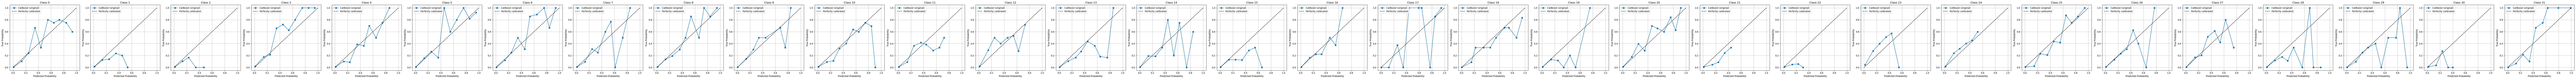


--- PLATT ---
  String labels encoded: {'C81.1': 0, 'C83.3': 1, 'C85.7': 2, 'C90.0': 3, 'C91.0': 4, 'C91.1': 5, 'C91.4': 6, 'C92.0': 7, 'C92.1': 8, 'C92.4': 9, 'D45': 10, 'D46.9': 11, 'D47.1': 12, 'D47.3': 13, 'D47.4': 14, 'D50.8': 15, 'D50.9': 16, 'D56.1': 17, 'D61.3': 18, 'D64.9': 19, 'D66': 20, 'D68.0': 21, 'D68.5': 22, 'D68.8': 23, 'D68.9': 24, 'D69.3': 25, 'D69.5': 26, 'D69.6': 27, 'D72.9': 28, 'D75.1': 29, 'D75.9': 30, 'healthy': 31}
  True labels shape: (2022,), unique: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]
  Prediction shape: (2022, 32)
=== Calibration Metrics for CatBoost (platt) ===
Brier Score: 0.0211
Log Loss: 1.8224
ECE: 0.0382
  String labels encoded: {'C81.1': 0, 'C83.3': 1, 'C85.7': 2, 'C90.0': 3, 'C91.0': 4, 'C91.1': 5, 'C91.4': 6, 'C92.0': 7, 'C92.1': 8, 'C92.4': 9, 'D45': 10, 'D46.9': 11, 'D47.1': 12, 'D47.3': 13, 'D47.4': 14, 'D50.8': 15, 'D50.9': 16, 'D56.1': 17, 'D61.3': 18, 'D64.9': 19, 'D66': 20, 'D68

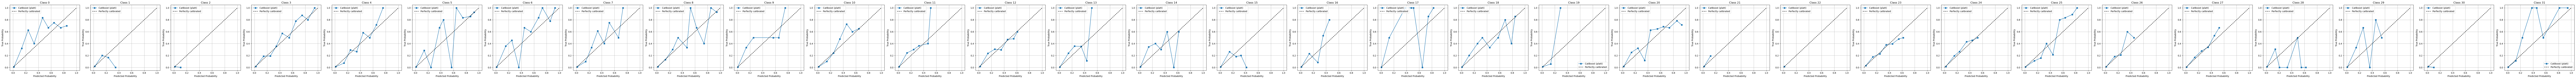


--- TEMPERATURE ---
  String labels encoded: {'C81.1': 0, 'C83.3': 1, 'C85.7': 2, 'C90.0': 3, 'C91.0': 4, 'C91.1': 5, 'C91.4': 6, 'C92.0': 7, 'C92.1': 8, 'C92.4': 9, 'D45': 10, 'D46.9': 11, 'D47.1': 12, 'D47.3': 13, 'D47.4': 14, 'D50.8': 15, 'D50.9': 16, 'D56.1': 17, 'D61.3': 18, 'D64.9': 19, 'D66': 20, 'D68.0': 21, 'D68.5': 22, 'D68.8': 23, 'D68.9': 24, 'D69.3': 25, 'D69.5': 26, 'D69.6': 27, 'D72.9': 28, 'D75.1': 29, 'D75.9': 30, 'healthy': 31}
  True labels shape: (2022,), unique: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]
  Prediction shape: (2022, 32)
=== Calibration Metrics for CatBoost (temperature) ===
Brier Score: 0.0280
Log Loss: 2.7316
ECE: 0.3757
  String labels encoded: {'C81.1': 0, 'C83.3': 1, 'C85.7': 2, 'C90.0': 3, 'C91.0': 4, 'C91.1': 5, 'C91.4': 6, 'C92.0': 7, 'C92.1': 8, 'C92.4': 9, 'D45': 10, 'D46.9': 11, 'D47.1': 12, 'D47.3': 13, 'D47.4': 14, 'D50.8': 15, 'D50.9': 16, 'D56.1': 17, 'D61.3': 18, 'D64.9': 19, 'D6

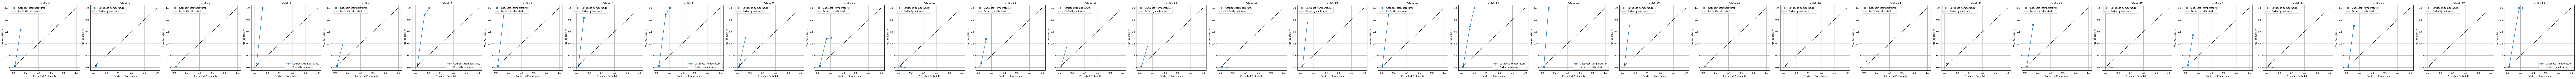

In [48]:
print("\nStep 2: Applying calibration to test data...")
test_calibrated, calibrator = apply_calibration(trained_models, X_test_df_disease, oof_predictions)

print("\nStep 3: Evaluating calibration...")
all_metrics, all_figures = evaluate_all_calibrations(
    test_calibrated, 
    y_test_df_disease,  
    oof_predictions
)

# Tringle 

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from sklearn.preprocessing import LabelEncoder

def plot_triangle_calibration(y_true, methods, model_name="Model", n_bins=10):
    """
    Triangle calibration plot for 3-class classification
    Plots multiple calibration methods in subplots
    
    Parameters:
    -----------
    y_true : array-like
        True labels
    methods : dict
        Dictionary with method_name: y_proba pairs
    model_name : str
        Name of the model for title
    n_bins : int
        Number of bins for calibration
    """
    
    # prepare data
    if hasattr(y_true, "iloc"):
        y_true_values = y_true.iloc[:, 0] if y_true.shape[1] == 1 else y_true 
    else:
        y_true_values = y_true
    
    le = LabelEncoder()
    y_true_encoded = le.fit_transform(y_true_values) 
    class_names = le.classes_

    # Create subplots 
    n_methods = len(methods)
    fig, axes = plt.subplots(1, n_methods, figsize=(5 * n_methods, 5))
    
    if n_methods == 1:
        axes = [axes]

    for idx, (method_name, y_proba) in enumerate(methods.items()):
        ax = axes[idx]
        print(f"--- {method_name.upper()} ---")
        
        # True class distribution in probability space
        plot_ternary_probability_space(ax, y_proba, y_true_encoded, class_names, 
                                     f"{model_name} ({method_name})")
    
    plt.tight_layout()
    return fig

def plot_ternary_probability_space(ax, y_proba, y_true, class_names, title):
    """
    Ternary plot showing true class distribution in probability simplex
    """

    if y_proba.shape[1] != 3:
        raise ValueError(f"Expected 3 classes, got {y_proba.shape[1]}")
    
    # Convert 3D probabilities to 2D coordinates
    x = 0.5 * (2 * y_proba[:, 1] + y_proba[:, 2])
    y = (np.sqrt(3)/2) * y_proba[:, 2]

    #  triangle
    vertices = np.array([[0, 0], [1, 0], [0.5, np.sqrt(3)/2]])
    triangle = Polygon(vertices, closed=True, fill=False, edgecolor="blue", 
                      linewidth=2, alpha=0.7)
    ax.add_patch(triangle)

    # add class labels
    ax.text(0, -0.05, class_names[0], ha='center', va='top', fontsize=12, fontweight='bold')
    ax.text(1, -0.05, class_names[1], ha='center', va='top', fontsize=12, fontweight='bold')
    ax.text(0.5, np.sqrt(3)/2 + 0.05, class_names[2], ha='center', va='bottom', fontsize=12, fontweight='bold')

    # plot points for each class
    colors = ['red', 'blue', 'green'] 
    for class_idx in range(len(colors)):
        mask = (y_true == class_idx)
        if np.sum(mask) > 0:  
            ax.scatter(x[mask], y[mask], c=colors[class_idx], alpha=0.6, 
                      label=f'True {class_names[class_idx]}', s=30, 
                      edgecolors='white', linewidth=0.5)
    
    # Add probability grid
    for i in np.linspace(0, 1, 5):
        # Lines parallel to sides
        ax.plot([i/2, 0.5 + i/2], [i*np.sqrt(3)/2, (1-i)*np.sqrt(3)/2], 
                'gray', alpha=0.3, linewidth=0.5)
        ax.plot([i, 1-i/2], [0, i*np.sqrt(3)/2], 'gray', alpha=0.3, linewidth=0.5)
        ax.plot([i/2, i], [i*np.sqrt(3)/2, 0], 'gray', alpha=0.3, linewidth=0.5)
    
    # Set limits and properties
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 0.95)
    ax.set_aspect('equal')
    ax.legend(loc='upper right')
    ax.set_title(title, fontsize=14)
    ax.grid(True, alpha=0.3)

def evaluate_with_triangle_plots(calibrated_predictions, y_test):
    """
    Comprehensive evaluation with triangle plots for all models and methods
    """
    all_figures = {}
    
    for model_name, methods in calibrated_predictions.items():
        print(f"\n{'='*50}")
        print(f"TRIANGLE CALIBRATION: {model_name}")
        print(f"{'='*50}")

        # with all methods
        fig = plot_triangle_calibration(y_test, methods, model_name)
        all_figures[model_name] = fig
        plt.show()
    
    return all_figures

def plot_all_models_comparison(calibrated_predictions, y_test):
    """
    Plot all models and methods in a grid for easy comparison
    """
    # prepare true labels
    if hasattr(y_test, "iloc"):
        y_true_values = y_test.iloc[:, 0] if y_test.shape[1] == 1 else y_test 
    else:
        y_true_values = y_test
    
    le = LabelEncoder()
    y_true_encoded = le.fit_transform(y_true_values) 
    class_names = le.classes_
    
    # calculate grid size
    n_models = len(calibrated_predictions)
    max_methods = max(len(methods) for methods in calibrated_predictions.values())
    
    fig, axes = plt.subplots(n_models, max_methods, figsize=(5 * max_methods, 5 * n_models))
    
    if n_models == 1:
        axes = axes.reshape(1, -1)
    if max_methods == 1:
        axes = axes.reshape(-1, 1)
    
    # plot each model and method
    for model_idx, (model_name, methods) in enumerate(calibrated_predictions.items()):
        for method_idx, (method_name, y_proba) in enumerate(methods.items()):
            ax = axes[model_idx, method_idx]
            plot_ternary_probability_space(ax, y_proba, y_true_encoded, class_names,
                                         f"{model_name}\n({method_name})")
    
    for model_idx in range(n_models):
        for method_idx in range(len(list(calibrated_predictions.values())[model_idx]), max_methods):
            axes[model_idx, method_idx].set_visible(False)
    
    plt.tight_layout()
    return fig

In [50]:
# print("\nStep 5: Triangle calibration visualization...")
# triangle_figures = evaluate_with_triangle_plots(test_calibrated, y_test_df_disease)

## Cross validation + calibration

- Кросс-Валидация + Калибратор + Ансамблирование

Перейдем на русский 

## Итоговая Валидация

### Обучение калибратора:
1. **Собираем все OOF предсказания** от всех моделей и всех фолдов
2. **Обучаем единый калибратор** на этих предсказаниях
3. **Проверка тесте?** (`data_test`) - финальные метрики модели

- Калибратор обучается на OOF, проверяется на test - нет data leakage

### Метрики на test set:
- Log Loss - оценка качества вероятностей
- ECE (Expected Calibration Error) - оценка калибровки
- Brier Score - оценка качества вероятностей


## Optuna for XGBoost

In [51]:
# from sklearn.preprocessing import LabelEncoder

# def optimize_xgboost(
#     X: pd.DataFrame,
#     y: pd.Series,
#     folds_indices: Dict,
#     n_trials: int = 10,
#     bias: int = 800,
#     noise: bool = False,
#     is_balanced: bool = True
# ) -> Tuple[Dict, pd.DataFrame]:
    
#     def objective(trial):
#         xgb_params = {
#             "n_estimators": trial.suggest_int("n_estimators", 50, 200),
#             "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
#             "max_depth": trial.suggest_int("max_depth", 3, 8),
#             "subsample": trial.suggest_float("subsample", 0.6, 1.0),
#             "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
#             "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
#             "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
#             "random_state": 42
#         }
        
#         cv_scores = []
#         log_loss_scores = []
        
#         for fold_idx in range(len(folds_indices)):
#             fold_key = f"fold_{fold_idx}"
#             if fold_key not in folds_indices:
#                 continue
                
#             fold_data = folds_indices[fold_key]
#             train_idx = fold_data[0]
#             val_idx = fold_data[1]
            
#             train_idx_list = train_idx.tolist() if hasattr(train_idx, 'tolist') else train_idx
#             val_idx_list = val_idx.tolist() if hasattr(val_idx, 'tolist') else val_idx

#             X_train, y_train = X.iloc[train_idx_list], y.iloc[train_idx_list]
#             X_val, y_val = X.iloc[val_idx_list], y.iloc[val_idx_list]

#             common_le = LabelEncoder()
#             y_combined = pd.concat([y_train, y_val])
#             common_le.fit(y_combined)
            
#             y_train_encoded = common_le.transform(y_train)
#             y_val_encoded = common_le.transform(y_val)
            
#             X_train_processed, y_train_processed, X_val_processed, y_val_processed, label_encoder = preprocessing_data_for_training(
#                 X_train, y_train_encoded,  
#                 X_val, y_val_encoded,    
#                 use_onehot=True, bias=bias, noise=noise, is_balanced=is_balanced
#             )


#             if hasattr(y_train_processed, 'values'):
#                 y_train_values = y_train_processed.values.ravel()
#             else:
#                 y_train_values = y_train_processed.ravel() if hasattr(y_train_processed, 'ravel') else y_train_processed
            
#             if hasattr(y_val_processed, 'values'):
#                 y_val_values = y_val_processed.values.ravel()
#             else:
#                 y_val_values = y_val_processed.ravel() if hasattr(y_val_processed, 'ravel') else y_val_processed

#             unique_classes_train = np.unique(y_train_values)
#             unique_classes_val = np.unique(y_val_values)
            
#             if len(unique_classes_train) < 2:
#                 continue
            
#             missing_classes = set(unique_classes_val) - set(unique_classes_train)
#             if missing_classes:
#                 continue

#             model = xgb.XGBClassifier(**xgb_params)
#             model.fit(X_train_processed, y_train_values)  
            
        
#             val_proba = model.predict_proba(X_val_processed)
#             val_pred = np.argmax(val_proba, axis=1)
            
#             log_loss_score = log_loss(y_val_encoded, val_proba)
#             log_loss_scores.append(log_loss_score)
            
#             f1_score_val = f1_score(y_val_encoded, val_pred, average='macro')
#             cv_scores.append(f1_score_val)
            
#             print(f"Fold {fold_idx}: LogLoss = {log_loss_score:.4f}, F1 = {f1_score_val:.4f}")
        
#         if not log_loss_scores:
#             return 10.0
            
#         mean_log_loss = np.mean(log_loss_scores)
#         mean_f1 = np.mean(cv_scores)
        
#         trial.set_user_attr('mean_f1', mean_f1)
#         trial.set_user_attr('std_f1', np.std(cv_scores))
#         trial.set_user_attr('mean_log_loss', mean_log_loss)
#         trial.set_user_attr('successful_folds', len(log_loss_scores))
        
#         print(f"Trial {trial.number}: Mean LogLoss = {mean_log_loss:.4f}, Mean F1 = {mean_f1:.4f}")
        
#         return mean_log_loss

#     study = optuna.create_study(
#         direction='minimize',
#         sampler=optuna.samplers.TPESampler(seed=42)
#     )
    
#     study.optimize(objective, n_trials=n_trials, show_progress_bar=False)
    
#     if study.best_trial:
#         best_xgb_params = study.best_params
#         best_log_loss = study.best_value
        
#         print(f"\n🎯 XGBoost optimization completed")
#         print(f"Best XGBoost parameters: {best_xgb_params}")
#         print(f"Best log loss: {best_log_loss:.4f}")
#         print(f"Best F1 score: {study.best_trial.user_attrs['mean_f1']:.4f}")
        
#         compatible_params = {
#             "params": best_xgb_params,
#             "needs_cat_features": False,
#             "use_onehot": True,
#             "needs_imputation": False,
#             "use_eval_set": False,
#             "shap": False,
#             "use_native_api": False,
#         }
        
#         results_df = pd.DataFrame([{
#             'model': "XGBoost_optimized",
#             'xgb_params': str(best_xgb_params),
#             'n_trials': len(study.trials),
#             'successful_folds': study.best_trial.user_attrs['successful_folds'],
#             'mean_log_loss': best_log_loss,
#             'mean_f1': study.best_trial.user_attrs['mean_f1'],
#             'calibration_method': 'none'
#         }])
        
#         return compatible_params, results_df
#     else:
#         print("❌ No successful trials completed")
#         return {}, pd.DataFrame()

## Optunas CatBOOST

In [52]:
import optuna
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, log_loss
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier, Pool
import warnings
warnings.filterwarnings('ignore')

def optimize_catboost(
    X: pd.DataFrame,
    y: pd.Series,
    folds_indices: dict,
    cat_features: list = None,
    n_trials: int = 10,
    bias: int = 600,
    noise: bool = False,
    is_balanced: bool = True,
    use_gpu: bool = False
) -> tuple[dict, pd.DataFrame]:
    """
    ОCatBoost Hyperparameter Optimization with Optuna

    Parameters:
    -----------
    X : pd.DataFrame
    Features
    y : pd.Series
    Target variable
    folds_indices : dict
    Indices for cross-validation
    cat_features : list, optional
    List of categorical features
    n_trials : int
    Number of trials for Optuna
    bias : int
    Bias for handling imbalanced data
    noise : bool
    Whether to add noise to the data
    is_balanced : bool
    Whether to balance the data
    use_gpu : bool
    Whether to use a GPU for training

    Returns:
    --------
    compatible_params : dict
    Optimized parameters in the format for your pipeline
    results_df : pd.DataFrame
    Optimization results
    """
    
    if cat_features is None:
        cat_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
    
    def objective(trial: optuna.Trial) -> float:
        """Objective функция для оптимизации CatBoost"""
        
        catboost_params = {
            "iterations": trial.suggest_int("iterations", 100, 1000),
            "learning_rate": trial.suggest_float("learning_rate", 0.005, 0.3, log=True),
            "depth": trial.suggest_int("depth", 4, 10),
            
            "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 10),
            "random_strength": trial.suggest_float("random_strength", 0.1, 2.0),
            "bagging_temperature": trial.suggest_float("bagging_temperature", 0.0, 1.0),
     
            "border_count": trial.suggest_int("border_count", 32, 255),
            "random_seed": 42,
            "verbose": False,
            "allow_writing_files": False,
        }
    
        
        cv_scores = []
        log_loss_scores = []
        successful_folds = 0
        
        for fold_idx in range(len(folds_indices)):
            fold_key = f"fold_{fold_idx}"
            if fold_key not in folds_indices:
                continue
                
            fold_data = folds_indices[fold_key]
            train_idx = fold_data[0]
            val_idx = fold_data[1]
            
            train_idx_list = train_idx.tolist() if hasattr(train_idx, 'tolist') else list(train_idx)
            val_idx_list = val_idx.tolist() if hasattr(val_idx, 'tolist') else list(val_idx)
            
            X_train, y_train = X.iloc[train_idx_list], y.iloc[train_idx_list]
            X_val, y_val = X.iloc[val_idx_list], y.iloc[val_idx_list]
            
            common_le = LabelEncoder()
            y_combined = pd.concat([y_train, y_val])
            common_le.fit(y_combined)
            
            y_train_encoded = common_le.transform(y_train)
            y_val_encoded = common_le.transform(y_val)
            
            X_train_processed, y_train_processed, X_val_processed, y_val_processed, label_encoder = preprocessing_data_for_training(
                X_train, y_train_encoded,
                X_val, y_val_encoded,
                use_onehot=False,  #  не нужен one-hot
                bias=bias,
                noise=noise,
                is_balanced=is_balanced
            )
  
            if cat_features:
                for col in cat_features:
                    if col in X_train_processed.columns:
                        X_train_processed[col] = X_train_processed[col].astype('category')
                        X_val_processed[col] = X_val_processed[col].astype('category')
            
            unique_classes_train = np.unique(y_train_processed)
            unique_classes_val = np.unique(y_val_processed)
            
            if len(unique_classes_train) < 2:
                continue
            
            missing_classes = set(unique_classes_val) - set(unique_classes_train)
            if missing_classes:
                continue
            
            cat_features_idx = []
            if cat_features:
                for col in cat_features:
                    if col in X_train_processed.columns:
                        idx = X_train_processed.columns.get_loc(col)
                        cat_features_idx.append(idx)
            
            train_pool = Pool(
                data=X_train_processed,
                label=y_train_processed,
                cat_features=cat_features_idx if cat_features_idx else None
            )
            
            val_pool = Pool(
                data=X_val_processed,
                label=y_val_processed,
                cat_features=cat_features_idx if cat_features_idx else None
            )
            
            try:
                model = CatBoostClassifier(**catboost_params)
                
                model.fit(
                    train_pool,
                    eval_set=val_pool,
                    early_stopping_rounds=20,
                    verbose=False,
                    plot=False
                )
                
                # 
                val_proba = model.predict_proba(val_pool)
                val_pred = model.predict(val_pool)
                
                fold_log_loss = log_loss(y_val_encoded, val_proba)
                fold_f1 = f1_score(y_val_encoded, val_pred, average='macro')
                
                log_loss_scores.append(fold_log_loss)
                cv_scores.append(fold_f1)
                successful_folds += 1
                
                print(f"  Fold {fold_idx}: LogLoss = {fold_log_loss:.4f}, F1 = {fold_f1:.4f}")
                
            except Exception as e:
                print(f"  Fold {fold_idx} failed: {e}")
                continue
        
        if not log_loss_scores:
            return 10.0  
        
        mean_log_loss = np.mean(log_loss_scores)
        mean_f1 = np.mean(cv_scores)
        
        trial.set_user_attr('mean_f1', mean_f1)
        trial.set_user_attr('std_f1', np.std(cv_scores))
        trial.set_user_attr('mean_log_loss', mean_log_loss)
        trial.set_user_attr('successful_folds', successful_folds)
        
        print(f"Trial {trial.number}: Mean LogLoss = {mean_log_loss:.4f}, Mean F1 = {mean_f1:.4f}, Folds = {successful_folds}")
        
        return mean_log_loss
    
    study = optuna.create_study(
        direction='minimize',
        sampler=optuna.samplers.TPESampler(seed=42),
        study_name="catboost_optimization"
    )
    
    print(f"BestBestBest CatBoost ({n_trials} trials)...")
    study.optimize(objective, n_trials=n_trials, show_progress_bar=True)
    
    if study.best_trial:
        best_params = study.best_params
        best_log_loss = study.best_value
        
        print(f"\n🎯 Оптимизация CatBoost завершена!")
        print(f" best : {best_params}")
        print(f" best ий LogLoss: {best_log_loss:.4f}")
        print(f" best F1 score: {study.best_trial.user_attrs['mean_f1']:.4f}")
        print(f" best folds: {study.best_trial.user_attrs['successful_folds']}")

        compatible_params = {
            "params": best_params,
            "needs_cat_features": False,
            "use_onehot": True,
            "needs_imputation": False,
            "use_eval_set": False,
            "shap": False,
            "use_native_api": False,
            }
                
        results_df = pd.DataFrame([{
            'model': "Catboost_optimized",
                    'xgb_params': str(best_params),
                    'n_trials': len(study.trials),
                    'successful_folds': study.best_trial.user_attrs['successful_folds'],
                    'mean_log_loss': best_log_loss,
                    'mean_f1': study.best_trial.user_attrs['mean_f1'],
                    'calibration_method': 'none'
                }])
                
        return compatible_params, results_df
    else:
        print("❌ No successful trials completed")
        return {}, pd.DataFrame()
                

In [53]:
# best_params, optimization_results = optimize_xgboost(
#     X=X_train_disease_df, 
#     y=y_train_disease_df, 
#     folds_indices=folds_indices,
#     n_trials=30
# )

best_params, optimization_results = optimize_catboost(
    X=X_train_disease_df, 
    y=y_train_disease_df, 
    folds_indices=folds_indices,
    n_trials=20
)

[I 2025-12-10 04:51:02,013] A new study created in memory with name: catboost_optimization


BestBestBest CatBoost (20 trials)...


  0%|          | 0/20 [00:00<?, ?it/s]

  Fold 0: LogLoss = 1.8589, F1 = 0.3804
  Fold 1: LogLoss = 1.8963, F1 = 0.3786
  Fold 2: LogLoss = 1.8248, F1 = 0.3879
  Fold 3: LogLoss = 1.8925, F1 = 0.3792


Best trial: 0. Best value: 1.86268:   5%|▌         | 1/20 [02:44<52:02, 164.35s/it]

  Fold 4: LogLoss = 1.8409, F1 = 0.3723
Trial 0: Mean LogLoss = 1.8627, Mean F1 = 0.3797, Folds = 5
[I 2025-12-10 04:53:46,359] Trial 0 finished with value: 1.8626752190831481 and parameters: {'iterations': 437, 'learning_rate': 0.24517932047070642, 'depth': 9, 'l2_leaf_reg': 6.387926357773329, 'random_strength': 0.39643541684062933, 'bagging_temperature': 0.15599452033620265, 'border_count': 45}. Best is trial 0 with value: 1.8626752190831481.
  Fold 0: LogLoss = 1.7786, F1 = 0.3890
  Fold 1: LogLoss = 1.8311, F1 = 0.3798
  Fold 2: LogLoss = 1.7976, F1 = 0.3853
  Fold 3: LogLoss = 1.8386, F1 = 0.3818


Best trial: 1. Best value: 1.81021:  10%|█         | 2/20 [07:34<1:11:26, 238.16s/it]

  Fold 4: LogLoss = 1.8052, F1 = 0.3857
Trial 1: Mean LogLoss = 1.8102, Mean F1 = 0.3843, Folds = 5
[I 2025-12-10 04:58:36,180] Trial 1 finished with value: 1.8102093261376815 and parameters: {'iterations': 880, 'learning_rate': 0.05859268690985102, 'depth': 8, 'l2_leaf_reg': 1.185260448662222, 'random_strength': 1.9428287191077893, 'bagging_temperature': 0.8324426408004217, 'border_count': 79}. Best is trial 1 with value: 1.8102093261376815.
  Fold 0: LogLoss = 2.3726, F1 = 0.3317
  Fold 1: LogLoss = 2.3992, F1 = 0.3168
  Fold 2: LogLoss = 2.3766, F1 = 0.3345
  Fold 3: LogLoss = 2.4129, F1 = 0.3026


Best trial: 1. Best value: 1.81021:  15%|█▌        | 3/20 [09:11<49:12, 173.69s/it]  

  Fold 4: LogLoss = 2.3835, F1 = 0.3243
Trial 2: Mean LogLoss = 2.3889, Mean F1 = 0.3220, Folds = 5
[I 2025-12-10 05:00:13,150] Trial 2 finished with value: 2.3889472480639937 and parameters: {'iterations': 263, 'learning_rate': 0.010594756088100142, 'depth': 6, 'l2_leaf_reg': 5.72280788469014, 'random_strength': 0.9206955354200199, 'bagging_temperature': 0.2912291401980419, 'border_count': 169}. Best is trial 1 with value: 1.8102093261376815.
  Fold 0: LogLoss = 2.2855, F1 = 0.3453
  Fold 1: LogLoss = 2.3001, F1 = 0.3323
  Fold 2: LogLoss = 2.2825, F1 = 0.3431
  Fold 3: LogLoss = 2.3275, F1 = 0.3181


Best trial: 1. Best value: 1.81021:  20%|██        | 4/20 [10:30<36:25, 136.59s/it]

  Fold 4: LogLoss = 2.2931, F1 = 0.3373
Trial 3: Mean LogLoss = 2.2977, Mean F1 = 0.3352, Folds = 5
[I 2025-12-10 05:01:32,869] Trial 3 finished with value: 2.2977328348744566 and parameters: {'iterations': 225, 'learning_rate': 0.016536643976750174, 'depth': 6, 'l2_leaf_reg': 5.104629857953324, 'random_strength': 1.5918343266467259, 'bagging_temperature': 0.19967378215835974, 'border_count': 147}. Best is trial 1 with value: 1.8102093261376815.
  Fold 0: LogLoss = 2.1348, F1 = 0.3742
  Fold 1: LogLoss = 2.1686, F1 = 0.3424
  Fold 2: LogLoss = 2.1433, F1 = 0.3554
  Fold 3: LogLoss = 2.1888, F1 = 0.3351


Best trial: 1. Best value: 1.81021:  25%|██▌       | 5/20 [20:50<1:17:39, 310.64s/it]

  Fold 4: LogLoss = 2.1475, F1 = 0.3633
Trial 4: Mean LogLoss = 2.1566, Mean F1 = 0.3541, Folds = 5
[I 2025-12-10 05:11:52,121] Trial 4 finished with value: 2.156609257407257 and parameters: {'iterations': 633, 'learning_rate': 0.006047360568422396, 'depth': 8, 'l2_leaf_reg': 2.5347171131856236, 'random_strength': 0.22359802667203107, 'bagging_temperature': 0.9488855372533332, 'border_count': 248}. Best is trial 1 with value: 1.8102093261376815.
  Fold 0: LogLoss = 2.0113, F1 = 0.3857
  Fold 1: LogLoss = 2.0443, F1 = 0.3668
  Fold 2: LogLoss = 2.0126, F1 = 0.3792
  Fold 3: LogLoss = 2.0682, F1 = 0.3593


Best trial: 1. Best value: 1.81021:  30%|███       | 6/20 [22:36<56:15, 241.11s/it]  

  Fold 4: LogLoss = 2.0236, F1 = 0.3796
Trial 5: Mean LogLoss = 2.0320, Mean F1 = 0.3741, Folds = 5
[I 2025-12-10 05:13:38,257] Trial 5 finished with value: 2.032026306041677 and parameters: {'iterations': 828, 'learning_rate': 0.017402809206301453, 'depth': 4, 'l2_leaf_reg': 7.158097238609412, 'random_strength': 0.9362897381052424, 'bagging_temperature': 0.12203823484477883, 'border_count': 142}. Best is trial 1 with value: 1.8102093261376815.
  Fold 0: LogLoss = 1.9112, F1 = 0.3905
  Fold 1: LogLoss = 1.9566, F1 = 0.3647
  Fold 2: LogLoss = 1.9077, F1 = 0.3883
  Fold 3: LogLoss = 1.9698, F1 = 0.3667


Best trial: 1. Best value: 1.81021:  35%|███▌      | 7/20 [23:11<37:40, 173.87s/it]

  Fold 4: LogLoss = 1.9224, F1 = 0.3783
Trial 6: Mean LogLoss = 1.9335, Mean F1 = 0.3777, Folds = 5
[I 2025-12-10 05:14:13,698] Trial 6 finished with value: 1.9335415432755614 and parameters: {'iterations': 130, 'learning_rate': 0.20695656824364442, 'depth': 5, 'l2_leaf_reg': 6.962700559185838, 'random_strength': 0.6922510445698807, 'bagging_temperature': 0.5200680211778108, 'border_count': 154}. Best is trial 1 with value: 1.8102093261376815.
  Fold 0: LogLoss = 1.8647, F1 = 0.3778
  Fold 1: LogLoss = 1.8820, F1 = 0.3733
  Fold 2: LogLoss = 1.8363, F1 = 0.3872
  Fold 3: LogLoss = 1.9028, F1 = 0.3833


Best trial: 1. Best value: 1.81021:  40%|████      | 8/20 [31:14<54:26, 272.22s/it]

  Fold 4: LogLoss = 1.8577, F1 = 0.3791
Trial 7: Mean LogLoss = 1.8687, Mean F1 = 0.3801, Folds = 5
[I 2025-12-10 05:22:16,506] Trial 7 finished with value: 1.868701130246312 and parameters: {'iterations': 266, 'learning_rate': 0.26487326352428686, 'depth': 9, 'l2_leaf_reg': 9.455490474077703, 'random_strength': 1.8001719658125328, 'bagging_temperature': 0.5978999788110851, 'border_count': 238}. Best is trial 1 with value: 1.8102093261376815.
  Fold 0: LogLoss = 2.6453, F1 = 0.2858
  Fold 1: LogLoss = 2.6656, F1 = 0.2780
  Fold 2: LogLoss = 2.6380, F1 = 0.2882
  Fold 3: LogLoss = 2.6769, F1 = 0.2737


Best trial: 1. Best value: 1.81021:  45%|████▌     | 9/20 [31:40<35:47, 195.21s/it]

  Fold 4: LogLoss = 2.6455, F1 = 0.2891
Trial 8: Mean LogLoss = 2.6542, Mean F1 = 0.2829, Folds = 5
[I 2025-12-10 05:22:42,394] Trial 8 finished with value: 2.6542493310627044 and parameters: {'iterations': 179, 'learning_rate': 0.011154681546966926, 'depth': 4, 'l2_leaf_reg': 3.927972976869379, 'random_strength': 0.8384868504100158, 'bagging_temperature': 0.2713490317738959, 'border_count': 217}. Best is trial 1 with value: 1.8102093261376815.
  Fold 0: LogLoss = 2.0475, F1 = 0.3721
  Fold 1: LogLoss = 2.0631, F1 = 0.3594
  Fold 2: LogLoss = 2.0360, F1 = 0.3703
  Fold 3: LogLoss = 2.0920, F1 = 0.3507


Best trial: 1. Best value: 1.81021:  50%|█████     | 10/20 [36:05<36:08, 216.90s/it]

  Fold 4: LogLoss = 2.0525, F1 = 0.3749
Trial 9: Mean LogLoss = 2.0582, Mean F1 = 0.3655, Folds = 5
[I 2025-12-10 05:27:07,843] Trial 9 finished with value: 2.058200198482248 and parameters: {'iterations': 421, 'learning_rate': 0.015794797197594638, 'depth': 7, 'l2_leaf_reg': 2.2683180247728636, 'random_strength': 1.6241742634326755, 'bagging_temperature': 0.07455064367977082, 'border_count': 253}. Best is trial 1 with value: 1.8102093261376815.
  Fold 0: LogLoss = 1.8469, F1 = 0.3691
  Fold 1: LogLoss = 1.8698, F1 = 0.3720
  Fold 2: LogLoss = 1.8478, F1 = 0.3757
  Fold 3: LogLoss = 1.9002, F1 = 0.3611


Best trial: 1. Best value: 1.81021:  55%|█████▌    | 11/20 [42:05<39:05, 260.65s/it]

  Fold 4: LogLoss = 1.8504, F1 = 0.3798
Trial 10: Mean LogLoss = 1.8630, Mean F1 = 0.3715, Folds = 5
[I 2025-12-10 05:33:07,698] Trial 10 finished with value: 1.863019363326082 and parameters: {'iterations': 981, 'learning_rate': 0.07315646774100579, 'depth': 10, 'l2_leaf_reg': 1.1616568805333767, 'random_strength': 1.3385464464785393, 'bagging_temperature': 0.9076647952825176, 'border_count': 50}. Best is trial 1 with value: 1.8102093261376815.
  Fold 0: LogLoss = 1.7832, F1 = 0.3906
  Fold 1: LogLoss = 1.8155, F1 = 0.3905
  Fold 2: LogLoss = 1.7801, F1 = 0.4023
  Fold 3: LogLoss = 1.8494, F1 = 0.3788


Best trial: 11. Best value: 1.80531:  60%|██████    | 12/20 [49:06<41:15, 309.38s/it]

  Fold 4: LogLoss = 1.7984, F1 = 0.3846
Trial 11: Mean LogLoss = 1.8053, Mean F1 = 0.3894, Folds = 5
[I 2025-12-10 05:40:08,528] Trial 11 finished with value: 1.8053083158293213 and parameters: {'iterations': 587, 'learning_rate': 0.08456542604206785, 'depth': 9, 'l2_leaf_reg': 8.73033907373799, 'random_strength': 0.11753257118445692, 'bagging_temperature': 0.7060085698856389, 'border_count': 40}. Best is trial 11 with value: 1.8053083158293213.
  Fold 0: LogLoss = 1.7813, F1 = 0.4086
  Fold 1: LogLoss = 1.8184, F1 = 0.3918
  Fold 2: LogLoss = 1.7952, F1 = 0.4023
  Fold 3: LogLoss = 1.8442, F1 = 0.3935


Best trial: 11. Best value: 1.80531:  65%|██████▌   | 13/20 [56:30<40:50, 350.11s/it]

  Fold 4: LogLoss = 1.8044, F1 = 0.3943
Trial 12: Mean LogLoss = 1.8087, Mean F1 = 0.3981, Folds = 5
[I 2025-12-10 05:47:32,370] Trial 12 finished with value: 1.8087007159880948 and parameters: {'iterations': 704, 'learning_rate': 0.0631822459778009, 'depth': 8, 'l2_leaf_reg': 9.98239653032408, 'random_strength': 1.291244520002966, 'bagging_temperature': 0.7604259435508065, 'border_count': 91}. Best is trial 11 with value: 1.8053083158293213.
  Fold 0: LogLoss = 1.7993, F1 = 0.3808
  Fold 1: LogLoss = 1.8402, F1 = 0.3801
  Fold 2: LogLoss = 1.8006, F1 = 0.3830
  Fold 3: LogLoss = 1.8623, F1 = 0.3823


Best trial: 11. Best value: 1.80531:  70%|███████   | 14/20 [1:16:44<1:01:05, 610.94s/it]

  Fold 4: LogLoss = 1.8134, F1 = 0.3739
Trial 13: Mean LogLoss = 1.8231, Mean F1 = 0.3800, Folds = 5
[I 2025-12-10 06:07:46,018] Trial 13 finished with value: 1.8231460860961064 and parameters: {'iterations': 650, 'learning_rate': 0.10410611003413699, 'depth': 10, 'l2_leaf_reg': 9.924771772725215, 'random_strength': 1.32784134945582, 'bagging_temperature': 0.7068705085349584, 'border_count': 97}. Best is trial 11 with value: 1.8053083158293213.
  Fold 0: LogLoss = 1.8209, F1 = 0.4026
  Fold 1: LogLoss = 1.8565, F1 = 0.3864
  Fold 2: LogLoss = 1.8363, F1 = 0.4020
  Fold 3: LogLoss = 1.8763, F1 = 0.3843


Best trial: 11. Best value: 1.80531:  75%|███████▌  | 15/20 [1:24:00<46:32, 558.41s/it]  

  Fold 4: LogLoss = 1.8301, F1 = 0.3980
Trial 14: Mean LogLoss = 1.8440, Mean F1 = 0.3946, Folds = 5
[I 2025-12-10 06:15:02,692] Trial 14 finished with value: 1.8440307459243297 and parameters: {'iterations': 686, 'learning_rate': 0.03698538920292981, 'depth': 8, 'l2_leaf_reg': 8.425400451555237, 'random_strength': 0.5268791872895967, 'bagging_temperature': 0.7263825119568269, 'border_count': 101}. Best is trial 11 with value: 1.8053083158293213.
  Fold 0: LogLoss = 1.8006, F1 = 0.3920
  Fold 1: LogLoss = 1.8337, F1 = 0.3843
  Fold 2: LogLoss = 1.8124, F1 = 0.3848
  Fold 3: LogLoss = 1.8667, F1 = 0.3763


Best trial: 11. Best value: 1.80531:  80%|████████  | 16/20 [1:30:19<33:37, 504.36s/it]

  Fold 4: LogLoss = 1.8162, F1 = 0.3876
Trial 15: Mean LogLoss = 1.8259, Mean F1 = 0.3850, Folds = 5
[I 2025-12-10 06:21:21,530] Trial 15 finished with value: 1.8259467167848054 and parameters: {'iterations': 515, 'learning_rate': 0.12664204142098412, 'depth': 9, 'l2_leaf_reg': 8.509567532646301, 'random_strength': 1.3142783959029163, 'bagging_temperature': 0.4134140996927128, 'border_count': 71}. Best is trial 11 with value: 1.8053083158293213.
  Fold 0: LogLoss = 1.8387, F1 = 0.4024
  Fold 1: LogLoss = 1.8591, F1 = 0.3856
  Fold 2: LogLoss = 1.8387, F1 = 0.4003
  Fold 3: LogLoss = 1.8859, F1 = 0.3816


Best trial: 11. Best value: 1.80531:  85%|████████▌ | 17/20 [1:34:50<21:42, 434.28s/it]

  Fold 4: LogLoss = 1.8571, F1 = 0.3989
Trial 16: Mean LogLoss = 1.8559, Mean F1 = 0.3938, Folds = 5
[I 2025-12-10 06:25:52,826] Trial 16 finished with value: 1.8558977821535194 and parameters: {'iterations': 765, 'learning_rate': 0.03365626797813227, 'depth': 7, 'l2_leaf_reg': 8.610665411735214, 'random_strength': 0.13936625244208084, 'bagging_temperature': 0.7162450970844753, 'border_count': 34}. Best is trial 11 with value: 1.8053083158293213.
  Fold 0: LogLoss = 1.7944, F1 = 0.4039
  Fold 1: LogLoss = 1.8344, F1 = 0.3760
  Fold 2: LogLoss = 1.8077, F1 = 0.4039
  Fold 3: LogLoss = 1.8586, F1 = 0.3823


Best trial: 11. Best value: 1.80531:  90%|█████████ | 18/20 [1:45:16<16:23, 491.81s/it]

  Fold 4: LogLoss = 1.8153, F1 = 0.3892
Trial 17: Mean LogLoss = 1.8221, Mean F1 = 0.3911, Folds = 5
[I 2025-12-10 06:36:18,555] Trial 17 finished with value: 1.8220949599785186 and parameters: {'iterations': 545, 'learning_rate': 0.056870774428315105, 'depth': 9, 'l2_leaf_reg': 7.84954827097963, 'random_strength': 1.1980320778110733, 'bagging_temperature': 0.5720442411000838, 'border_count': 120}. Best is trial 11 with value: 1.8053083158293213.
  Fold 0: LogLoss = 1.8003, F1 = 0.3956
  Fold 1: LogLoss = 1.8318, F1 = 0.3810
  Fold 2: LogLoss = 1.7970, F1 = 0.3960
  Fold 3: LogLoss = 1.8692, F1 = 0.3872


Best trial: 11. Best value: 1.80531:  95%|█████████▌| 19/20 [1:48:46<06:47, 407.17s/it]

  Fold 4: LogLoss = 1.8098, F1 = 0.3988
Trial 18: Mean LogLoss = 1.8216, Mean F1 = 0.3917, Folds = 5
[I 2025-12-10 06:39:48,572] Trial 18 finished with value: 1.821637035029243 and parameters: {'iterations': 379, 'learning_rate': 0.13175941171949965, 'depth': 8, 'l2_leaf_reg': 9.369311456575359, 'random_strength': 0.6006022214772782, 'bagging_temperature': 0.8128540920768879, 'border_count': 67}. Best is trial 11 with value: 1.8053083158293213.
  Fold 0: LogLoss = 1.8543, F1 = 0.4001
  Fold 1: LogLoss = 1.8867, F1 = 0.3748
  Fold 2: LogLoss = 1.8623, F1 = 0.3981
  Fold 3: LogLoss = 1.9143, F1 = 0.3728


Best trial: 11. Best value: 1.80531: 100%|██████████| 20/20 [2:15:40<00:00, 407.01s/it]

  Fold 4: LogLoss = 1.8641, F1 = 0.3824
Trial 19: Mean LogLoss = 1.8764, Mean F1 = 0.3856, Folds = 5
[I 2025-12-10 07:06:42,119] Trial 19 finished with value: 1.8763518032853768 and parameters: {'iterations': 742, 'learning_rate': 0.02589868699948058, 'depth': 10, 'l2_leaf_reg': 7.785314815257409, 'random_strength': 1.1246182799378004, 'bagging_temperature': 0.4360998335722801, 'border_count': 103}. Best is trial 11 with value: 1.8053083158293213.

🎯 Оптимизация CatBoost завершена!
 best : {'iterations': 587, 'learning_rate': 0.08456542604206785, 'depth': 9, 'l2_leaf_reg': 8.73033907373799, 'random_strength': 0.11753257118445692, 'bagging_temperature': 0.7060085698856389, 'border_count': 40}
 best ий LogLoss: 1.8053
 best F1 score: 0.3894
 best folds: 5


CatBoost Cross-Validation:   0%|          | 0/5 [00:00<?, ?it/s]

0:	learn: 3.3248462	total: 179ms	remaining: 1m 44s
1:	learn: 3.2032452	total: 327ms	remaining: 1m 35s
2:	learn: 3.0916795	total: 477ms	remaining: 1m 32s
3:	learn: 3.0000360	total: 625ms	remaining: 1m 31s
4:	learn: 2.9327103	total: 774ms	remaining: 1m 30s
5:	learn: 2.8635844	total: 919ms	remaining: 1m 29s
6:	learn: 2.7944734	total: 1.06s	remaining: 1m 27s
7:	learn: 2.7384784	total: 1.2s	remaining: 1m 26s
8:	learn: 2.6882710	total: 1.34s	remaining: 1m 26s
9:	learn: 2.6380646	total: 1.48s	remaining: 1m 25s
10:	learn: 2.5928779	total: 1.62s	remaining: 1m 25s
11:	learn: 2.5519050	total: 1.77s	remaining: 1m 24s
12:	learn: 2.5103090	total: 1.91s	remaining: 1m 24s
13:	learn: 2.4742550	total: 2.05s	remaining: 1m 23s
14:	learn: 2.4408990	total: 2.19s	remaining: 1m 23s
15:	learn: 2.4067853	total: 2.33s	remaining: 1m 23s
16:	learn: 2.3781608	total: 2.47s	remaining: 1m 22s
17:	learn: 2.3513561	total: 2.61s	remaining: 1m 22s
18:	learn: 2.3231808	total: 2.75s	remaining: 1m 22s
19:	learn: 2.2986440	to

CatBoost Cross-Validation:  20%|██        | 1/5 [01:24<05:38, 84.52s/it]

0:	learn: 3.3569530	total: 169ms	remaining: 1m 39s
1:	learn: 3.2524079	total: 324ms	remaining: 1m 34s
2:	learn: 3.1362090	total: 475ms	remaining: 1m 32s
3:	learn: 3.0373266	total: 624ms	remaining: 1m 30s
4:	learn: 2.9479816	total: 766ms	remaining: 1m 29s
5:	learn: 2.8627909	total: 910ms	remaining: 1m 28s
6:	learn: 2.7948495	total: 1.05s	remaining: 1m 26s
7:	learn: 2.7373330	total: 1.19s	remaining: 1m 26s
8:	learn: 2.6804710	total: 1.33s	remaining: 1m 25s
9:	learn: 2.6320930	total: 1.48s	remaining: 1m 25s
10:	learn: 2.5844655	total: 1.62s	remaining: 1m 24s
11:	learn: 2.5458259	total: 1.76s	remaining: 1m 24s
12:	learn: 2.5086560	total: 1.91s	remaining: 1m 24s
13:	learn: 2.4702935	total: 2.05s	remaining: 1m 24s
14:	learn: 2.4380564	total: 2.19s	remaining: 1m 23s
15:	learn: 2.4022901	total: 2.34s	remaining: 1m 23s
16:	learn: 2.3664270	total: 2.48s	remaining: 1m 23s
17:	learn: 2.3351883	total: 2.62s	remaining: 1m 22s
18:	learn: 2.3067187	total: 2.76s	remaining: 1m 22s
19:	learn: 2.2763538	t

CatBoost Cross-Validation:  40%|████      | 2/5 [02:48<04:13, 84.45s/it]

0:	learn: 3.3362449	total: 180ms	remaining: 1m 45s
1:	learn: 3.2377788	total: 333ms	remaining: 1m 37s
2:	learn: 3.1481886	total: 484ms	remaining: 1m 34s
3:	learn: 3.0357323	total: 636ms	remaining: 1m 32s
4:	learn: 2.9660447	total: 788ms	remaining: 1m 31s
5:	learn: 2.8743448	total: 932ms	remaining: 1m 30s
6:	learn: 2.8008447	total: 1.07s	remaining: 1m 29s
7:	learn: 2.7406593	total: 1.23s	remaining: 1m 28s
8:	learn: 2.6846712	total: 1.37s	remaining: 1m 27s
9:	learn: 2.6386128	total: 1.51s	remaining: 1m 27s
10:	learn: 2.5863262	total: 1.65s	remaining: 1m 26s
11:	learn: 2.5414497	total: 1.79s	remaining: 1m 25s
12:	learn: 2.5067815	total: 1.93s	remaining: 1m 25s
13:	learn: 2.4712076	total: 2.07s	remaining: 1m 24s
14:	learn: 2.4397854	total: 2.21s	remaining: 1m 24s
15:	learn: 2.4055522	total: 2.35s	remaining: 1m 23s
16:	learn: 2.3780221	total: 2.49s	remaining: 1m 23s
17:	learn: 2.3490017	total: 2.63s	remaining: 1m 23s
18:	learn: 2.3227512	total: 2.77s	remaining: 1m 22s
19:	learn: 2.2994005	t

CatBoost Cross-Validation:  60%|██████    | 3/5 [04:13<02:48, 84.42s/it]

0:	learn: 3.3352703	total: 151ms	remaining: 1m 28s
1:	learn: 3.2019413	total: 294ms	remaining: 1m 26s
2:	learn: 3.0949024	total: 454ms	remaining: 1m 28s
3:	learn: 2.9979110	total: 594ms	remaining: 1m 26s
4:	learn: 2.9132044	total: 732ms	remaining: 1m 25s
5:	learn: 2.8451473	total: 876ms	remaining: 1m 24s
6:	learn: 2.7858794	total: 1.02s	remaining: 1m 24s
7:	learn: 2.7278756	total: 1.16s	remaining: 1m 23s
8:	learn: 2.6795960	total: 1.3s	remaining: 1m 23s
9:	learn: 2.6342029	total: 1.44s	remaining: 1m 22s
10:	learn: 2.5883744	total: 1.57s	remaining: 1m 22s
11:	learn: 2.5467896	total: 1.71s	remaining: 1m 22s
12:	learn: 2.5092720	total: 1.85s	remaining: 1m 21s
13:	learn: 2.4717897	total: 1.98s	remaining: 1m 21s
14:	learn: 2.4337662	total: 2.12s	remaining: 1m 20s
15:	learn: 2.3984863	total: 2.26s	remaining: 1m 20s
16:	learn: 2.3680642	total: 2.4s	remaining: 1m 20s
17:	learn: 2.3370897	total: 2.54s	remaining: 1m 20s
18:	learn: 2.3121949	total: 2.68s	remaining: 1m 20s
19:	learn: 2.2879662	tot

CatBoost Cross-Validation:  80%|████████  | 4/5 [05:36<01:23, 83.91s/it]

0:	learn: 3.3409474	total: 174ms	remaining: 1m 42s
1:	learn: 3.2400819	total: 326ms	remaining: 1m 35s
2:	learn: 3.1365334	total: 472ms	remaining: 1m 31s
3:	learn: 3.0252357	total: 619ms	remaining: 1m 30s
4:	learn: 2.9557777	total: 768ms	remaining: 1m 29s
5:	learn: 2.8648851	total: 911ms	remaining: 1m 28s
6:	learn: 2.7918492	total: 1.05s	remaining: 1m 27s
7:	learn: 2.7241507	total: 1.19s	remaining: 1m 25s
8:	learn: 2.6672279	total: 1.32s	remaining: 1m 24s
9:	learn: 2.6183500	total: 1.46s	remaining: 1m 24s
10:	learn: 2.5742106	total: 1.6s	remaining: 1m 23s
11:	learn: 2.5304400	total: 1.74s	remaining: 1m 23s
12:	learn: 2.4878506	total: 1.88s	remaining: 1m 23s
13:	learn: 2.4494811	total: 2.02s	remaining: 1m 22s
14:	learn: 2.4129016	total: 2.16s	remaining: 1m 22s
15:	learn: 2.3800751	total: 2.3s	remaining: 1m 22s
16:	learn: 2.3445998	total: 2.44s	remaining: 1m 21s
17:	learn: 2.3154067	total: 2.58s	remaining: 1m 21s
18:	learn: 2.2862715	total: 2.72s	remaining: 1m 21s
19:	learn: 2.2593604	tot

CatBoost Cross-Validation: 100%|██████████| 5/5 [07:00<00:00, 84.18s/it]


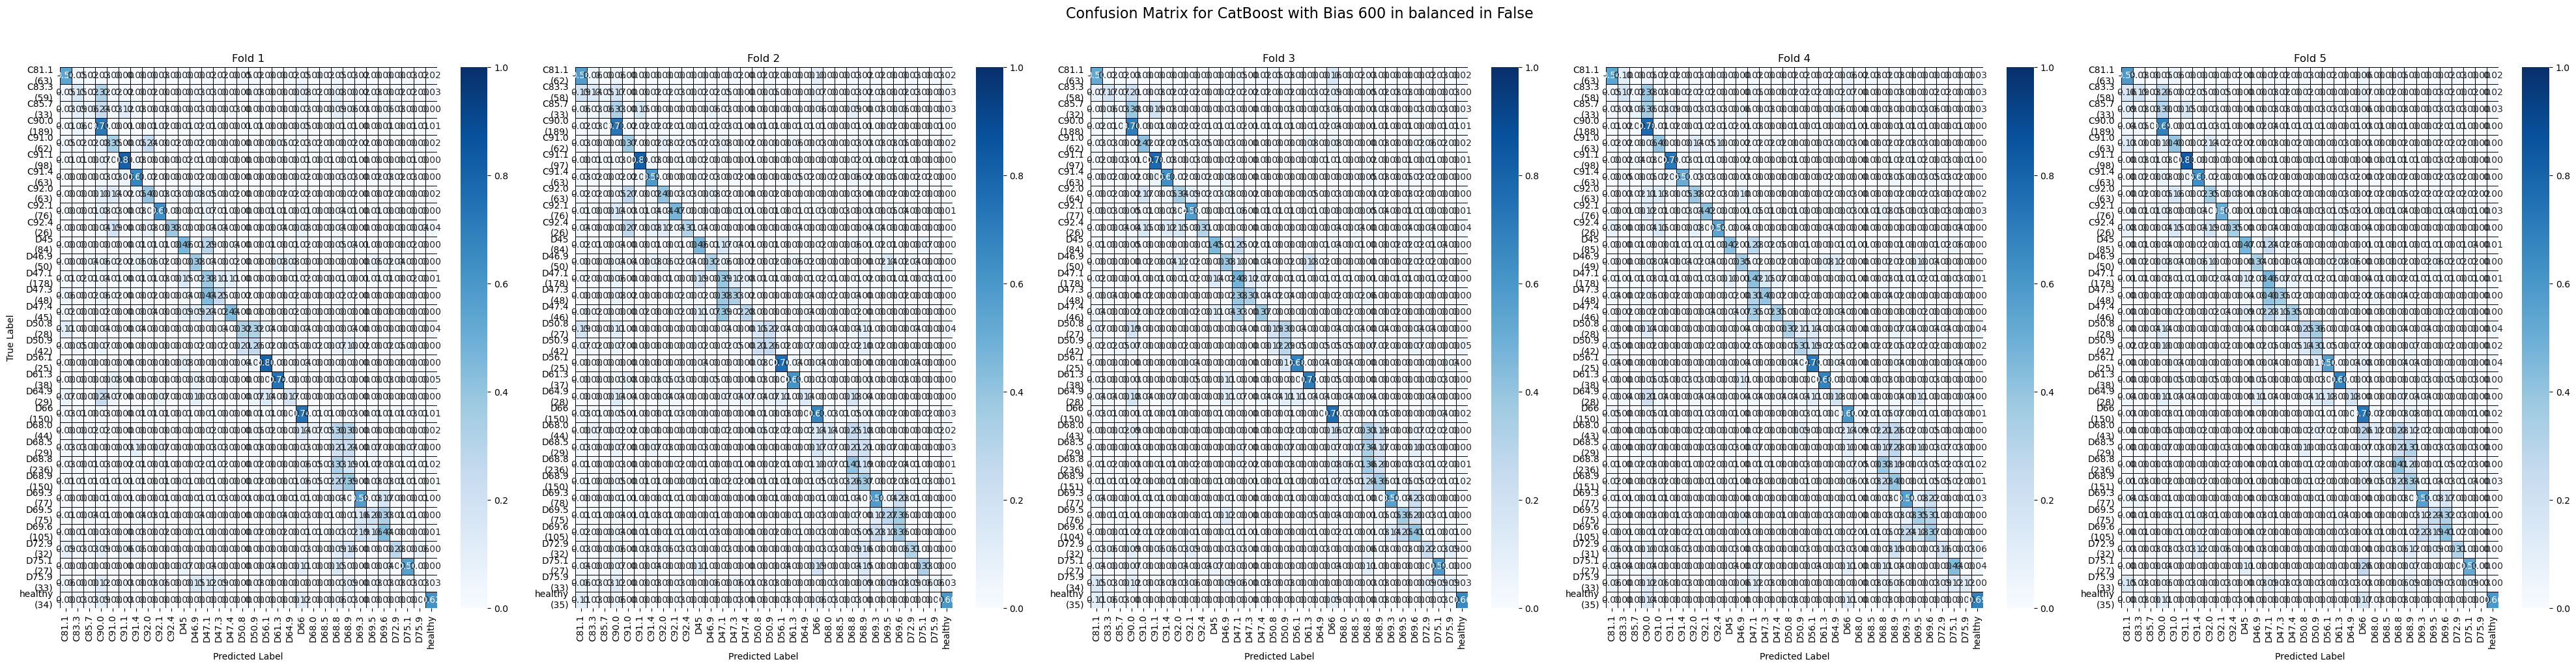

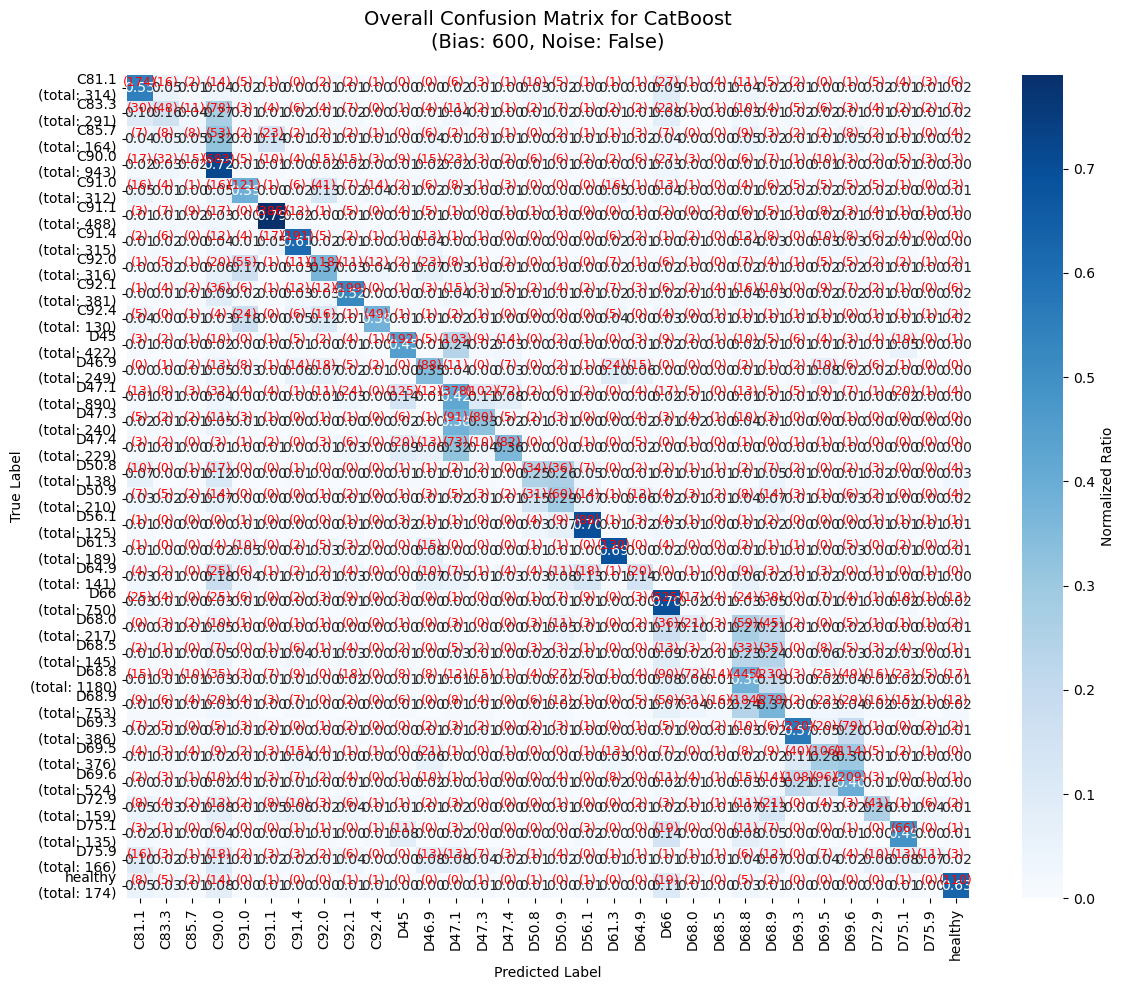

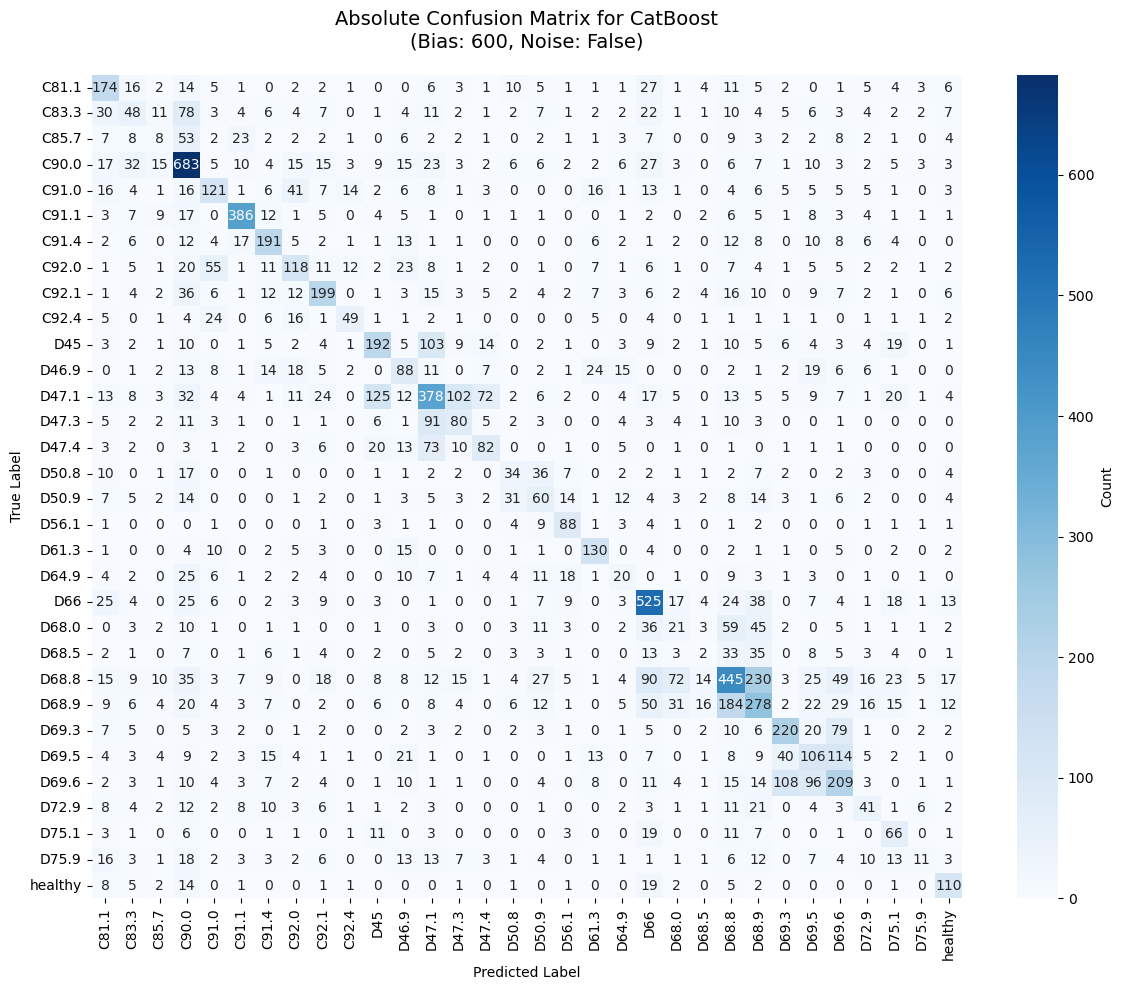


=== OVERALL METRICS for CatBoost ===
Total samples: 11452
Overall Accuracy: 0.4508

Detailed Classification Report:
              precision    recall  f1-score   support

       C81.1       0.43      0.55      0.49       314
       C83.3       0.24      0.16      0.20       291
       C85.7       0.09      0.05      0.06       164
       C90.0       0.55      0.72      0.63       943
       C91.0       0.42      0.39      0.41       312
       C91.1       0.80      0.79      0.79       488
       C91.4       0.57      0.61      0.59       315
       C92.0       0.43      0.37      0.40       316
       C92.1       0.56      0.52      0.54       381
       C92.4       0.56      0.38      0.45       130
         D45       0.48      0.45      0.47       422
       D46.9       0.31      0.35      0.33       249
       D47.1       0.47      0.42      0.45       890
       D47.3       0.31      0.33      0.32       240
       D47.4       0.40      0.36      0.38       229
       D50.8      

In [54]:
trained_models_best, results_best, cv_dict_best, shap_data_list_best = models_cross_validation(
    X=X_train_disease_df, 
    y=y_train_disease_df, 
    models={"CatBoost": CatBoostClassifier}, 
    params=best_params,  
    folds_indices=folds_indices, 
    n_splits=5, 
    bias=600, 
    noise=False, 
    draw_matrix=True
)

In [55]:
for model_name in results_best["model"].unique():
    df_model = pd.DataFrame(results_best[results_best["model"] == model_name])

    print(f"\n{'='*60}")
    print(f"📊 МОДЕЛЬ: {model_name}")
    print(f"Mean Accuracy = {round(df_model['Accuracy'].mean(), 2)}")
    print(f"Mean F1-macro = {round(df_model['F1-macro'].mean(), 2)}")
    print(f"Mean F1-micro = {round(df_model['F1-micro'].mean(), 2)}")
    print(f"Top_2_accuracy = {round(df_model['top_2_accuracy'].mean(), 2)}")
    print(f"Top_3_accuracy = {round(df_model['top_3_accuracy'].mean(), 2)}")
    print(f"Top_5_accuracy = {round(df_model['top_5_accuracy'].mean(), 2)}")
    print(f"{'='*60}")


📊 МОДЕЛЬ: CatBoost
Mean Accuracy = 0.45
Mean F1-macro = 0.39
Mean F1-micro = 0.45
Top_2_accuracy = 0.64
Top_3_accuracy = 0.74
Top_5_accuracy = 0.83


- Calibration

In [56]:
print("Collecting OOF predictions...")
oof_predictions_best = collect_oof_predictions(
    trained_models=trained_models_best,
    X=X_train_disease_df, 
    y=y_train_disease_df,
    cv_splits_dict=cv_dict_best,
    models_config=MODEL_CONFIGS
)

  ✅ Fold 0: 2291 samples collected
  ✅ Fold 1: 2288 samples collected
  ✅ Fold 2: 2290 samples collected
  ✅ Fold 3: 2290 samples collected
  ✅ Fold 4: 2293 samples collected
  ✅ Total: 11452 OOF predictions collected for CatBoost


In [57]:
print("Applying calibration to test data...")
test_calibrated_best, calibrator_best = apply_calibration(trained_models_best, X_test_df_disease, oof_predictions_best, all_calibration=False)



Applying calibration to test data...
Applying calibration for CatBoost...
  Fold 0: success
  Fold 1: success
  Fold 2: success
  Fold 3: success
  Fold 4: success


In [58]:
print("Evaluating calibration...")
all_metrics, all_figures = evaluate_all_calibrations(
    test_calibrated_best, 
    y_test_df_disease,  
    oof_predictions_best
)

Evaluating calibration...


In [59]:
test_calibrated_best

{}

In [60]:
for model_name, results in test_calibrated_best.items():
    print(f"\n=== {model_name} ===")
    
    for method, proba in results.items():
        print(f"\n{method}:")
        print(f"  Shape: {proba.shape}")  # (n_samples, n_classes)
        print(f"  Data type: {proba.dtype}")
        
        print(f"  First 3 predictions:")
        for i in range(min(3, len(proba))):
            print(f"    Sample {i}: {proba[i]} → class {np.argmax(proba[i])}")
        
        print(f"  Min probability: {proba.min():.4f}")
        print(f"  Max probability: {proba.max():.4f}")
        print(f"  Mean probability: {proba.mean():.4f}")

============